# Project 2-3

Jianying Zhu


May 10, 2021

## 3. World Happiness Report Data & Analytics

### Problems Statement:

3. **World Happiness Report** - Triage:
   What makes people happy among all the countries?

In [1]:
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
from plotly.offline import iplot, plot
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import plotly.graph_objs as go

from prettytable import PrettyTable
from tabulate import tabulate

from time import perf_counter

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ShuffleSplit
from sklearn.decomposition import PCA

from dmba import classificationSummary, gainsChart
from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score, BIC_score

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, r2_score, classification_report

In [2]:
for dirname, _, filenames in os.walk('C:\\Users\\14830\\Downloads\\whr'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\14830\Downloads\whr\2015.csv
C:\Users\14830\Downloads\whr\2016.csv
C:\Users\14830\Downloads\whr\2017.csv
C:\Users\14830\Downloads\whr\2018.csv
C:\Users\14830\Downloads\whr\2019.csv


In [3]:
df_2015 = pd.read_csv('.\\whr\\2015.csv')
display(df_2015)

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 12 columns]

In [4]:
df_2016 = pd.read_csv('.\\whr\\2016.csv')
display(df_2016)

Country                           Region  Happiness Rank  \
0        Denmark                   Western Europe               1   
1    Switzerland                   Western Europe               2   
2        Iceland                   Western Europe               3   
3         Norway                   Western Europe               4   
4        Finland                   Western Europe               5   
..           ...                              ...             ...   
152        Benin               Sub-Saharan Africa             153   
153  Afghanistan                    Southern Asia             154   
154         Togo               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   

     Happiness Score  Lower Confidence Interval  Upper Confidence Interval  \
0              7.526                      7.460                      7.592   
1              7.509                      7.428                      7.590   
2              7.501                      7.333                      7.669   
3              7.498                      7.421                      7.575   
4              7.413                      7.351                      7.475   
..               ...                        ...                        ...   
152            3.484                      3.404                      3.564   
153            3.360                      3.288                      3.432   
154            3.303                      3.192                      3.414   
155            3.069                      2.936                      3.202   
156            2.905                      2.732                      3.078   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.44178  1.16374                   0.79504  0.57941   
1                     1.52733  1.14524                   0.86303  0.58557   
2                     1.42666  1.18326                   0.86733  0.56624   
3                     1.57744  1.12690                   0.79579  0.59609   
4                     1.40598  1.13464                   0.81091  0.57104   
..                        ...      ...                       ...      ...   
152                   0.39499  0.10419                   0.21028  0.39747   
153                   0.38227  0.11037                   0.17344  0.16430   
154                   0.28123  0.00000                   0.24811  0.34678   
155                   0.74719  0.14866                   0.62994  0.06912   
156                   0.06831  0.23442                   0.15747  0.04320   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
0                          0.44453     0.36171            2.73939  
1                          0.41203     0.28083            2.69463  
2                          0.14975     0.47678            2.83137  
3                          0.35776     0.37895            2.66465  
4                          0.41004     0.25492            2.82596  
..                             ...         ...                ...  
152                        0.06681     0.20180            2.10812  
153                        0.07112     0.31268            2.14558  
154                        0.11587     0.17517            2.13540  
155                        0.17233     0.48397            0.81789  
156                        0.09419     0.20290            2.10404  

[157 rows x 13 columns]

In [5]:
df_2017 = pd.read_csv('.\\whr\\2017.csv')
display(df_2017)

Country  Happiness.Rank  Happiness.Score  Whisker.high  \
0                      Norway               1            7.537      7.594445   
1                     Denmark               2            7.522      7.581728   
2                     Iceland               3            7.504      7.622030   
3                 Switzerland               4            7.494      7.561772   
4                     Finland               5            7.469      7.527542   
..                        ...             ...              ...           ...   
150                    Rwanda             151            3.471      3.543030   
151                     Syria             152            3.462      3.663669   
152                  Tanzania             153            3.349      3.461430   
153                   Burundi             154            2.905      3.074690   
154  Central African Republic             155            2.693      2.864884   

     Whisker.low  Economy..GDP.per.Capita.    Family  \
0       7.479556                  1.616463  1.533524   
1       7.462272                  1.482383  1.551122   
2       7.385970                  1.480633  1.610574   
3       7.426227                  1.564980  1.516912   
4       7.410458                  1.443572  1.540247   
..           ...                       ...       ...   
150     3.398970                  0.368746  0.945707   
151     3.260331                  0.777153  0.396103   
152     3.236570                  0.511136  1.041990   
153     2.735310                  0.091623  0.629794   
154     2.521116                  0.000000  0.000000   

     Health..Life.Expectancy.   Freedom  Generosity  \
0                    0.796667  0.635423    0.362012   
1                    0.792566  0.626007    0.355280   
2                    0.833552  0.627163    0.475540   
3                    0.858131  0.620071    0.290549   
4                    0.809158  0.617951    0.245483   
..                        ...       ...         ...   
150                  0.326425  0.581844    0.252756   
151                  0.500533  0.081539    0.493664   
152                  0.364509  0.390018    0.354256   
153                  0.151611  0.059901    0.204435   
154                  0.018773  0.270842    0.280876   

     Trust..Government.Corruption.  Dystopia.Residual  
0                         0.315964           2.277027  
1                         0.400770           2.313707  
2                         0.153527           2.322715  
3                         0.367007           2.276716  
4                         0.382612           2.430182  
..                             ...                ...  
150                       0.455220           0.540061  
151                       0.151347           1.061574  
152                       0.066035           0.621130  
153                       0.084148           1.683024  
154                       0.056565           2.066005  

[155 rows x 12 columns]

In [6]:
df_2018 = pd.read_csv('.\\whr\\2018.csv')
display(df_2018)

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.632           1.305   
1               2                    Norway  7.594           1.456   
2               3                   Denmark  7.555           1.351   
3               4                   Iceland  7.495           1.343   
4               5               Switzerland  7.487           1.420   
..            ...                       ...    ...             ...   
151           152                     Yemen  3.355           0.442   
152           153                  Tanzania  3.303           0.455   
153           154               South Sudan  3.254           0.337   
154           155  Central African Republic  3.083           0.024   
155           156                   Burundi  2.905           0.091   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.592                    0.874                         0.681   
1             1.582                    0.861                         0.686   
2             1.590                    0.868                         0.683   
3             1.644                    0.914                         0.677   
4             1.549                    0.927                         0.660   
..              ...                      ...                           ...   
151           1.073                    0.343                         0.244   
152           0.991                    0.381                         0.481   
153           0.608                    0.177                         0.112   
154           0.000                    0.010                         0.305   
155           0.627                    0.145                         0.065   

     Generosity  Perceptions of corruption  
0         0.202                      0.393  
1         0.286                      0.340  
2         0.284                      0.408  
3         0.353                      0.138  
4         0.256                      0.357  
..          ...                        ...  
151       0.083                      0.064  
152       0.270                      0.097  
153       0.224                      0.106  
154       0.218                      0.038  
155       0.149                      0.076  

[156 rows x 9 columns]

In [7]:
df_2019 = pd.read_csv('.\\whr\\2019.csv')
display(df_2019)

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1             1.573                    0.996                         0.592   
2             1.582                    1.028                         0.603   
3             1.624                    1.026                         0.591   
4             1.522                    0.999                         0.557   
..              ...                      ...                           ...   
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  
0         0.153                      0.393  
1         0.252                      0.410  
2         0.271                      0.341  
3         0.354                      0.118  
4         0.322                      0.298  
..          ...                        ...  
151       0.217                      0.411  
152       0.276                      0.147  
153       0.158                      0.025  
154       0.235                      0.035  
155       0.202                      0.091  

[156 rows x 9 columns]

### Data Preparation

In [8]:
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019

In [9]:
df_2017.rename(columns={'Happiness.Rank':'Happiness Rank', 
                        'Economy..GDP.per.Capita.':'Economy (GDP per Capita)',
                        'Health..Life.Expectancy.':'Health (Life Expectancy)',
                        'Trust..Government.Corruption.':'Trust (Government Corruption)',
                      'Happiness.Score':'Happiness Score',
                        'Dystopia.Residual':'Dystopia Residual'}, inplace=True)
df_2018.rename(columns={'Country or region':'Country',
                        'Overall rank':'Happiness Rank',
                        'Score':'Happiness Score', 
                      'GDP per capita': 'Economy (GDP per Capita)', 
                        'Social support':'Family',
                      'Healthy life expectancy':'Health (Life Expectancy)', 
                        'Freedom to make life choices':'Freedom',
                      'Perceptions of corruption':'Trust (Government Corruption)'}, inplace=True)
df_2019.rename(columns={'Country or region':'Country',
                        'Overall rank':'Happiness Rank', 
                        'Score':'Happiness Score', 
                      'GDP per capita': 'Economy (GDP per Capita)', 
                        'Social support':'Family',
                      'Healthy life expectancy':'Health (Life Expectancy)', 
                      'Freedom to make life choices':'Freedom',
                      'Perceptions of corruption':'Trust (Government Corruption)'}, inplace=True)

In [10]:
#Mapping regions not available in other years
Country_Region=df_2015.set_index('Country')['Region']

df_2017['Region']=df_2017['Country'].map(Country_Region)
df_2018['Region']=df_2018['Country'].map(Country_Region)
df_2019['Region']=df_2019['Country'].map(Country_Region)

df_time=[df_2015, df_2016, df_2017, df_2018, df_2019]
display(df_time)

[         Country                           Region  Happiness Rank  \
 0    Switzerland                   Western Europe               1   
 1        Iceland                   Western Europe               2   
 2        Denmark                   Western Europe               3   
 3         Norway                   Western Europe               4   
 4         Canada                    North America               5   
 ..           ...                              ...             ...   
 153       Rwanda               Sub-Saharan Africa             154   
 154        Benin               Sub-Saharan Africa             155   
 155        Syria  Middle East and Northern Africa             156   
 156      Burundi               Sub-Saharan Africa             157   
 157         Togo               Sub-Saharan Africa             158   
 
      Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
 0              7.587         0.03411                   1.39651  1.34951   
 1    

In [11]:
#check missing value
print('2015')
print(df_2015.isnull().sum())
print('')

print('2016')
print(df_2016.isnull().sum())
print('')

print('2017')
print(df_2017.isnull().sum())
print('')

print('2018')
print(df_2018.isnull().sum())
print('')

print('2019')
print(df_2019.isnull().sum())
print('')

2015
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

2016
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

2017
Country     

In [12]:
#Countries without Regions, countries that were not at df_2015
print('Countries without Region 2017:',df_2017[df_2017['Region'].isnull()]['Country'].index,
list(df_2017[df_2017['Region'].isnull()]['Country']))
print('')

print('Countries without Region 2018:',df_2018[df_2018['Region'].isnull()]['Country'].index,
list(df_2018[df_2018['Region'].isnull()]['Country']))
print('')

print('Countries without Region 2019:',df_2019[df_2019['Region'].isnull()]['Country'].index,
list(df_2019[df_2019['Region'].isnull()]['Country']))

Countries without Region 2017: Int64Index([32, 49, 70, 92, 110, 146], dtype='int64') ['Taiwan Province of China', 'Belize', 'Hong Kong S.A.R., China', 'Somalia', 'Namibia', 'South Sudan']

Countries without Region 2018: Int64Index([37, 48, 57, 97, 118, 153], dtype='int64') ['Trinidad & Tobago', 'Belize', 'Northern Cyprus', 'Somalia', 'Namibia', 'South Sudan']

Countries without Region 2019: Int64Index([38, 63, 83, 111, 112, 119, 155], dtype='int64') ['Trinidad & Tobago', 'Northern Cyprus', 'North Macedonia', 'Somalia', 'Namibia', 'Gambia', 'South Sudan']


In [13]:
#Adding Regions to these Countries
df_2017.loc[list(df_2017[df_2017['Region'].isnull()]['Country'].index),'Region']=['Eastern Asia','Latin America and Caribbean','Eastern Asia',\
                                                                                  'Sub-Saharan Africa','Sub-Saharan Africa','Sub-Saharan Africa']

df_2018.loc[list(df_2018[df_2018['Region'].isnull()]['Country'].index),'Region']=['Latin America and Caribbean','Latin America and Caribbean',\
                                                                                  'Middle East and Northern Africa','Sub-Saharan Africa','Sub-Saharan Africa','Sub-Saharan Africa']

df_2019.loc[list(df_2019[df_2019['Region'].isnull()]['Country'].index),'Region']=['Latin America and Caribbean','Middle East and Northern Africa','Central and Eastern Europe', \
                                                                                  'Sub-Saharan Africa','Sub-Saharan Africa','Sub-Saharan Africa','Sub-Saharan Africa']

In [14]:
#Verifying null value in 2018
df_2018[df_2018['Trust (Government Corruption)'].isnull()]

Happiness Rank               Country  Happiness Score  \
19              20  United Arab Emirates            6.774   

    Economy (GDP per Capita)  Family  Health (Life Expectancy)  Freedom  \
19                     2.096   0.776                      0.67    0.284   

    Generosity  Trust (Government Corruption)  Year  \
19       0.186                            NaN  2018   

                             Region  
19  Middle East and Northern Africa

In [15]:
#Government confidence values for other years
for i in range(len(df_time)):
    print('Year:', i+2015, df_time[i][df_time[i]['Country']=='United Arab Emirates']['Trust (Government Corruption)'])

Year: 2015 19    0.38583
Name: Trust (Government Corruption), dtype: float64
Year: 2016 27    0.35561
Name: Trust (Government Corruption), dtype: float64
Year: 2017 20    0.32449
Name: Trust (Government Corruption), dtype: float64
Year: 2018 19   NaN
Name: Trust (Government Corruption), dtype: float64
Year: 2019 20    0.182
Name: Trust (Government Corruption), dtype: float64


In [16]:
#Setting value in 2018 as the average between 2017 and 2019
df_2018.loc[list(df_2018[df_2018['Trust (Government Corruption)'].isnull()].index), \
            'Trust (Government Corruption)']=list((df_2017[df_2017['Country']=='United Arab Emirates']['Trust (Government Corruption)']\
                                                   +df_2019[df_2019['Country']=='United Arab Emirates']['Trust (Government Corruption)'])/2)

In [17]:
#check missing value
print('2015')
print(df_2015.isnull().sum())
print('')

print('2016')
print(df_2016.isnull().sum())
print('')

print('2017')
print(df_2017.isnull().sum())
print('')

print('2018')
print(df_2018.isnull().sum())
print('')

print('2019')
print(df_2019.isnull().sum())
print('')

2015
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

2016
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

2017
Country     

In [18]:
#whr_concat=pd.concat(df_time, axis=0, ignore_index=True)
whr_concat=pd.concat(df_time)
display(whr_concat)

Country              Region  Happiness Rank  \
0                 Switzerland      Western Europe               1   
1                     Iceland      Western Europe               2   
2                     Denmark      Western Europe               3   
3                      Norway      Western Europe               4   
4                      Canada       North America               5   
..                        ...                 ...             ...   
151                    Rwanda  Sub-Saharan Africa             152   
152                  Tanzania  Sub-Saharan Africa             153   
153               Afghanistan       Southern Asia             154   
154  Central African Republic  Sub-Saharan Africa             155   
155               South Sudan  Sub-Saharan Africa             156   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
151            3.334             NaN                   0.35900  0.71100   
152            3.231             NaN                   0.47600  0.88500   
153            3.203             NaN                   0.35000  0.51700   
154            3.083             NaN                   0.02600  0.00000   
155            2.853             NaN                   0.30600  0.57500   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
151                   0.61400  0.55500                        0.41100   
152                   0.49900  0.41700                        0.14700   
153                   0.36100  0.00000                        0.02500   
154                   0.10500  0.22500                        0.03500   
155                   0.29500  0.01000                        0.09100   

     Generosity  Dystopia Residual  Year  Lower Confidence Interval  \
0       0.29678            2.51738  2015                        NaN   
1       0.43630            2.70201  2015                        NaN   
2       0.34139            2.49204  2015                        NaN   
3       0.34699            2.46531  2015                        NaN   
4       0.45811            2.45176  2015                        NaN   
..          ...                ...   ...                        ...   
151     0.21700                NaN  2019                        NaN   
152     0.27600                NaN  2019                        NaN   
153     0.15800                NaN  2019                        NaN   
154     0.23500                NaN  2019                        NaN   
155     0.20200                NaN  2019                        NaN   

     Upper Confidence Interval  Whisker.high  Whisker.low  
0                          NaN           NaN          NaN  
1                          NaN           NaN          NaN  
2                          NaN           NaN          NaN  
3                          NaN           NaN          NaN  
4                          NaN           NaN          NaN  
..                         ...           ...          ...  
151                        NaN           NaN          NaN  
152                        NaN           NaN          NaN  
153                   

In [19]:
whr_concat.Country.tolist()

['Switzerland',
 'Iceland',
 'Denmark',
 'Norway',
 'Canada',
 'Finland',
 'Netherlands',
 'Sweden',
 'New Zealand',
 'Australia',
 'Israel',
 'Costa Rica',
 'Austria',
 'Mexico',
 'United States',
 'Brazil',
 'Luxembourg',
 'Ireland',
 'Belgium',
 'United Arab Emirates',
 'United Kingdom',
 'Oman',
 'Venezuela',
 'Singapore',
 'Panama',
 'Germany',
 'Chile',
 'Qatar',
 'France',
 'Argentina',
 'Czech Republic',
 'Uruguay',
 'Colombia',
 'Thailand',
 'Saudi Arabia',
 'Spain',
 'Malta',
 'Taiwan',
 'Kuwait',
 'Suriname',
 'Trinidad and Tobago',
 'El Salvador',
 'Guatemala',
 'Uzbekistan',
 'Slovakia',
 'Japan',
 'South Korea',
 'Ecuador',
 'Bahrain',
 'Italy',
 'Bolivia',
 'Moldova',
 'Paraguay',
 'Kazakhstan',
 'Slovenia',
 'Lithuania',
 'Nicaragua',
 'Peru',
 'Belarus',
 'Poland',
 'Malaysia',
 'Croatia',
 'Libya',
 'Russia',
 'Jamaica',
 'North Cyprus',
 'Cyprus',
 'Algeria',
 'Kosovo',
 'Turkmenistan',
 'Mauritius',
 'Hong Kong',
 'Estonia',
 'Indonesia',
 'Vietnam',
 'Turkey',
 'Ky

In [20]:
#Renaming some countries, necessary for future analysis in Geopandas and Pycountry
whr_concat.replace(['Congo (Brazzaville)', 'Congo (Kinshasa)','Swaziland','South Korea','Laos','Ivory Coast','Trinidad & Tobago','Hong Kong S.A.R., China','Taiwan Province of China','Niger'], 
           ['Congo, The Democratic Republic of the','Congo','Eswatini','Korea, Republic of','Lao',"Côte d'Ivoire",'Trinidad and Tobago','Hong Kong Special Administrative Region of China','Taiwan, Province of China','Republic of the Niger'],inplace=True)

#Removing unrecognized countries
remove = ['North Cyprus','Somaliland region','Swaziland','Palestinian Territories','Somaliland Region','Northern Cyprus']
for r in remove:
    whr_concat.drop(list(whr_concat[whr_concat["Country"]==r].index), inplace=True) 

In [21]:
#Mapping missing regions
Country_Region1 = whr_concat.drop_duplicates('Country',keep='first')[['Country','Region']].set_index('Country')

In [22]:
#change object to category
type_object = whr_concat.select_dtypes(include=['object']).columns
for i in type_object:
    whr_concat[i]=pd.Categorical(whr_concat[i])

In [23]:
whr_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727 entries, 0 to 155
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Country                        727 non-null    category
 1   Region                         727 non-null    category
 2   Happiness Rank                 727 non-null    int64   
 3   Happiness Score                727 non-null    float64 
 4   Standard Error                 147 non-null    float64 
 5   Economy (GDP per Capita)       727 non-null    float64 
 6   Family                         727 non-null    float64 
 7   Health (Life Expectancy)       727 non-null    float64 
 8   Freedom                        727 non-null    float64 
 9   Trust (Government Corruption)  727 non-null    float64 
 10  Generosity                     727 non-null    float64 
 11  Dystopia Residual              437 non-null    float64 
 12  Year                           727 n


Happiness Rank --> Sort by happiness
Happiness Score --> happiness scores of countries

Economy(GDp per Capita) --> per capita economic distribution
Family --> Number of families in the country
Health(Life Expectancy) --> Health rates in countries
Freedom --> Freedom rates in countries
Trust(Government Corruption) --> The proportion of people's trust in their country
Generosity --> Country sizes
Dystopia Residual --> Score of a hypothetical country with a lower rank than a country with a lower ranking in the report

In [24]:
dataframe = [('Country', 'Category', 'Name of the Countries ranked by values of happiness'),
              ('Region', 'Category', 'Regions of the listed countries'),
             ('Year', 'Integer', '2015-2019'),
             ('Happiness Rank',  'Integer', 'Rank of the country based on the Happiness Score'),
             ('Happiness Score', 'Numeric', 'A metric measured by rate the happiness on a scale of 0 to 10 where 10 is the happiest'),
             ('Standard Error', 'Numeric', 'A measure of margins of error in distributions'),
             ('Economy (GDP per Capita)', 'Numeric', 'The extent to which GDP contributes to the calculation of the Happiness Score'),
             ('Family', 'Numeric', 'The extent to which Family contributes to the calculation of the Happiness Score'),
             ('Health (Life Expectancy)',  'Numeric', 'The extent to which Life expectancy contributed to the calculation of the Happiness Score'),
             ('Freedom', 'Numeric', 'The extent to which Freedom contributed to the calculation of the Happiness Score'),
             ('Trust (Government Corruption)','Numeric', 'The extent to which Perception of Corruption contributes to Happiness Score'),
            ('Generosity', 'Numeric', 'The extent to which Generosity contributed to the calculation of the Happiness Score'),
            ('Dystopia Residual', 'Numeric', 'The extent to which Dystopia Residual contributed to the calculation of the Happiness Score'),
            ('Upper Confidence Interval(Whisker High)', 'Numeric', 'Lower Confidence Interval of the Happiness Score'),
            ('Lower Confidence Interval(Whisker Low)', 'Numeric', 'Upper Confidence Interval of the Happiness Score')]

table3 = pd.DataFrame(dataframe, columns=['Variable Name', 'Variable Type', 'Variable Description'])
table3.index += 1
#display the full text of rows
pd.set_option("display.max_colwidth", None)
#pd.set_option('display.max_rows', 100)
#pd.set_option('display.width', None) 
display(table3)

Variable Name Variable Type  \
1                                   Country      Category   
2                                    Region      Category   
3                                      Year       Integer   
4                            Happiness Rank       Integer   
5                           Happiness Score       Numeric   
6                            Standard Error       Numeric   
7                  Economy (GDP per Capita)       Numeric   
8                                    Family       Numeric   
9                  Health (Life Expectancy)       Numeric   
10                                  Freedom       Numeric   
11            Trust (Government Corruption)       Numeric   
12                               Generosity       Numeric   
13                        Dystopia Residual       Numeric   
14  Upper Confidence Interval(Whisker High)       Numeric   
15   Lower Confidence Interval(Whisker Low)       Numeric   

                                                                           Variable Description  
1                                           Name of the Countries ranked by values of happiness  
2                                                               Regions of the listed countries  
3                                                                                     2015-2019  
4                                              Rank of the country based on the Happiness Score  
5        A metric measured by rate the happiness on a scale of 0 to 10 where 10 is the happiest  
6                                                A measure of margins of error in distributions  
7                 The extent to which GDP contributes to the calculation of the Happiness Score  
8              The extent to which Family contributes to the calculation of the Happiness Score  
9     The extent to which Life expectancy contributed to the calculation of the Happiness Score  
10            The extent to which Freedom contributed to the calculation of the Happiness Score  
11                  The extent to which Perception of Corruption contributes to Happiness Score  
12         The extent to which Generosity contributed to the calculation of the Happiness Score  
13  The extent to which Dystopia Residual contributed to the calculation of the Happiness Score  
14                                             Lower Confidence Interval of the Happiness Score  
15                                             Upper Confidence Interval of the Happiness Score

In [25]:
#check missing value
whr_concat.isnull().sum()

Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Standard Error                   580
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                290
Year                               0
Lower Confidence Interval        581
Upper Confidence Interval        581
Whisker.high                     583
Whisker.low                      583
dtype: int64

In [26]:
display(whr_concat)

Country              Region  Happiness Rank  \
0                 Switzerland      Western Europe               1   
1                     Iceland      Western Europe               2   
2                     Denmark      Western Europe               3   
3                      Norway      Western Europe               4   
4                      Canada       North America               5   
..                        ...                 ...             ...   
151                    Rwanda  Sub-Saharan Africa             152   
152                  Tanzania  Sub-Saharan Africa             153   
153               Afghanistan       Southern Asia             154   
154  Central African Republic  Sub-Saharan Africa             155   
155               South Sudan  Sub-Saharan Africa             156   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
151            3.334             NaN                   0.35900  0.71100   
152            3.231             NaN                   0.47600  0.88500   
153            3.203             NaN                   0.35000  0.51700   
154            3.083             NaN                   0.02600  0.00000   
155            2.853             NaN                   0.30600  0.57500   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
151                   0.61400  0.55500                        0.41100   
152                   0.49900  0.41700                        0.14700   
153                   0.36100  0.00000                        0.02500   
154                   0.10500  0.22500                        0.03500   
155                   0.29500  0.01000                        0.09100   

     Generosity  Dystopia Residual  Year  Lower Confidence Interval  \
0       0.29678            2.51738  2015                        NaN   
1       0.43630            2.70201  2015                        NaN   
2       0.34139            2.49204  2015                        NaN   
3       0.34699            2.46531  2015                        NaN   
4       0.45811            2.45176  2015                        NaN   
..          ...                ...   ...                        ...   
151     0.21700                NaN  2019                        NaN   
152     0.27600                NaN  2019                        NaN   
153     0.15800                NaN  2019                        NaN   
154     0.23500                NaN  2019                        NaN   
155     0.20200                NaN  2019                        NaN   

     Upper Confidence Interval  Whisker.high  Whisker.low  
0                          NaN           NaN          NaN  
1                          NaN           NaN          NaN  
2                          NaN           NaN          NaN  
3                          NaN           NaN          NaN  
4                          NaN           NaN          NaN  
..                         ...           ...          ...  
151                        NaN           NaN          NaN  
152                        NaN           NaN          NaN  
153                   

### Data Distribution

In [27]:
pie1 = whr_concat.Country.value_counts()
labels = whr_concat.Region
# figure
fig = {
  "data": [
    {"values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "",
      "hoverinfo":"label+percent+name",
      "hole": .2,
      "type": "pie"},],
  "layout": {
        "title":"Distribution of Countries by Regions",
        "annotations": [
            { "font": { "size": 25},
              "showarrow": True,
              "text": "Regions",
                "x": 1,
                "y": 1,
            },
        ]
    }
}
iplot(fig)

In [28]:
#treemap Charts - 2015
df_2015["world"] = "world" # in order to have a single root node
fig = px.treemap(df_2015, path=['world','Region', 'Country'], values='Happiness Score',
                 color=df_2015['Happiness Score'], hover_data=['Happiness Rank'],
                 color_continuous_scale='RdBu',
                 color_continuous_midpoint=np.average(df_2015['Happiness Score'], weights=df_2015['Happiness Score']))
plt.figure(figsize=(20,15))
fig.show()

<Figure size 1440x1080 with 0 Axes>

In [29]:
#treemap Charts - 2016
df_2016["world"] = "world" # in order to have a single root node
fig = px.treemap(df_2016, path=['world', 'Region', 'Country'], values='Happiness Score',
                 color=df_2016['Happiness Score'], hover_data=['Happiness Rank'],
                 color_continuous_scale='RdBu',
                 color_continuous_midpoint=np.average(df_2016['Happiness Score'], weights=df_2016['Happiness Score']))
plt.figure(figsize=(20,15))
fig.show()

<Figure size 1440x1080 with 0 Axes>

In [30]:
##treemap Charts - 2017
df_2017["world"] = "world" # in order to have a single root node
fig = px.treemap(df_2017, path=['world', 'Region', 'Country'], values='Happiness Score',
                 color=df_2017['Happiness Score'], hover_data=['Happiness Rank'],
                 color_continuous_scale='RdBu',
                 color_continuous_midpoint=np.average(df_2017['Happiness Score'], weights=df_2017['Happiness Score']))
plt.figure(figsize=(20,15))
fig.show()

<Figure size 1440x1080 with 0 Axes>

In [31]:
##treemap Charts - 2018
df_2018["world"] = "world" # in order to have a single root node
fig = px.treemap(df_2018, path=['world', 'Region', 'Country'], values='Happiness Score',
                 color=df_2018['Happiness Score'], hover_data=['Happiness Rank'],
                 color_continuous_scale='RdBu',
                 color_continuous_midpoint=np.average(df_2018['Happiness Score'], weights=df_2018['Happiness Score']))
plt.figure(figsize=(20,15))
fig.show()

<Figure size 1440x1080 with 0 Axes>

In [32]:
##treemap Charts - 2019
df_2019["world"] = "world" # in order to have a single root node
fig = px.treemap(df_2019, path=['world', 'Region', 'Country'], values='Happiness Score',
                 color=df_2019['Happiness Score'], hover_data=['Happiness Rank'],
                 color_continuous_scale='RdBu',
                 color_continuous_midpoint=np.average(df_2019['Happiness Score'], weights=df_2019['Happiness Score']))
plt.figure(figsize=(20,15))
fig.show()

<Figure size 1440x1080 with 0 Axes>

In [33]:
##treemap Charts - 2015-2019
whr_concat["world"] = "world" # in order to have a single root node
fig = px.treemap(whr_concat, path=['world', 'Region', 'Country'], values='Happiness Score',
                 color=whr_concat['Happiness Score'], hover_data=['Happiness Rank'],
                 color_continuous_scale='RdBu',
                 color_continuous_midpoint=np.average(whr_concat['Happiness Score'], weights=whr_concat['Happiness Score']),
                title = 'Happiness Score Ranking in Global Countries and Regions from 2015-2019')
plt.figure(figsize=(20,15))
fig.show()

<Figure size 1440x1080 with 0 Axes>

In [34]:
happiness_ranking = dict(type = 'choropleth', 
                         locations = whr_concat['Country'], 
                         locationmode = 'country names',
                         z = whr_concat['Happiness Rank'], 
                         colorbar = {'title':'Happiness Scale'})
layout = dict(title = 'Global Happiness Ranking', 
             geo = dict(showframe = False,  
            projection = {'type': 'natural earth'}))
choromap = go.Figure(data = [happiness_ranking], layout = layout)
iplot(choromap)

In [35]:
top50_2015 = whr_concat[whr_concat.Year==2015].iloc[:50]
top50_2016 = whr_concat[whr_concat.Year==2016].iloc[:50]
top50_2017 = whr_concat[whr_concat.Year==2017].iloc[:50]
top50_2018 = whr_concat[whr_concat.Year==2018].iloc[:50]
top50_2019 = whr_concat[whr_concat.Year==2019].iloc[:50]

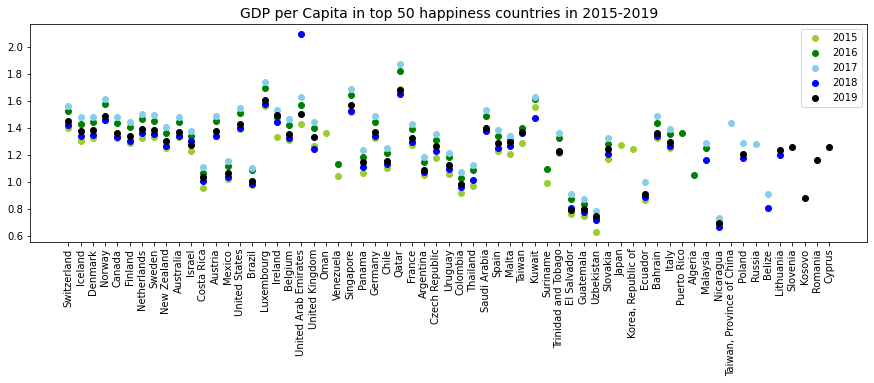

In [36]:
plt.figure(figsize=(15,4))
plt.scatter('Country','Economy (GDP per Capita)', data=top50_2015,marker = "o", color='yellowgreen')
plt.scatter('Country','Economy (GDP per Capita)', data=top50_2016,marker = "o", color='green')
plt.scatter('Country','Economy (GDP per Capita)', data=top50_2017,marker = "o", color='skyblue')
plt.scatter('Country','Economy (GDP per Capita)', data=top50_2018,marker = "o", color='blue')
plt.scatter('Country','Economy (GDP per Capita)', data=top50_2019,marker = "o", color='black')
plt.xticks(rotation = 'vertical')
plt.legend(['2015','2016','2017','2018','2019'])
plt.title('GDP per Capita in top 50 happiness countries in 2015-2019', fontsize=14)         
plt.show()

In [37]:
trace1 = go.Scatter(x = top50_2015.Country,
                    y = top50_2015.Freedom,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(0, 0, 102, 0.8)'),
                    text = df_2015['Happiness Rank'] )

trace2 = go.Scatter(x = top50_2016.Country,
                    y = top50_2016.Freedom,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(10, 180, 80, 0.8)'),
                    text = df_2016['Happiness Rank'] )

trace3 = go.Scatter(x = top50_2017.Country,
                    y = top50_2017.Freedom,
                    mode = "markers",
                    name = "2017",
                    marker = dict(color = 'rgba(255, 80, 2, 0.8)'),
                    text = df_2017['Happiness Rank'])

trace4 = go.Scatter(x = top50_2018.Country,
                    y = top50_2018.Freedom,
                    mode = "markers",
                    name = "2018",
                    marker = dict(color = 'rgba(153, 204, 255)'),
                    text = df_2018['Happiness Rank'])

trace5 = go.Scatter(x = top50_2019.Country,
                    y = top50_2019.Freedom,
                    mode = "markers",
                    name = "2019",
                    marker = dict(color = 'rgba(200, 135, 50, 0.8)'),
                    text = df_2019['Happiness Rank'])


freedom = [trace1, trace2, trace3, trace4, trace5]
layout = dict(title = 'Freedom in Top 50 Happiness Countries in 2015-2019 Years',
             xaxis = dict(tickangle = 315, ticklen = 5, zeroline = False),
             yaxis = dict(title = 'Freedom', ticklen = 5, zeroline = False))
fig = dict(data = freedom, layout = layout)
iplot(fig)

In [38]:
trace1 = go.Scatter(x = top50_2015.Country,
                    y = top50_2015.Family,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(0, 0, 102, 0.8)'),
                    text = df_2015['Happiness Rank'] )

trace2 = go.Scatter(x = top50_2016.Country,
                    y = top50_2016.Family,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(10, 180, 80, 0.8)'),
                    text = df_2016['Happiness Rank'] )

trace3 = go.Scatter(x = top50_2017.Country,
                    y = top50_2017.Family,
                    mode = "markers",
                    name = "2017",
                    marker = dict(color = 'rgba(255, 80, 2, 0.8)'),
                    text = df_2017['Happiness Rank'])

trace4 = go.Scatter(x = top50_2018.Country,
                    y = top50_2018.Family,
                    mode = "markers",
                    name = "2018",
                    marker = dict(color = 'rgba(153, 204, 255)'),
                    text = df_2018['Happiness Rank'])

trace5 = go.Scatter(x = top50_2019.Country,
                    y = top50_2019.Family,
                    mode = "markers",
                    name = "2019",
                    marker = dict(color = 'rgba(200, 135, 50, 0.8)'),
                    text = df_2019['Happiness Rank'])


freedom = [trace1, trace2, trace3, trace4, trace5]
layout = dict(title = 'Family support in Top 50 Happiness Countries in 2015-2019 Years',
             xaxis = dict(tickangle = 315, ticklen = 5, zeroline = False),
             yaxis = dict(title = 'Family', ticklen = 5, zeroline = False))
fig = dict(data = freedom, layout = layout)
iplot(fig)

In [39]:
trace1 = go.Scatter(x = top50_2015.Country,
                    y = top50_2015['Health (Life Expectancy)'],
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(0, 0, 102, 0.8)'),
                    text = df_2015['Happiness Rank'] )

trace2 = go.Scatter(x = top50_2016.Country,
                    y = top50_2016['Health (Life Expectancy)'],
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(10, 180, 80, 0.8)'),
                    text = df_2016['Happiness Rank'] )

trace3 = go.Scatter(x = top50_2017.Country,
                    y = top50_2017['Health (Life Expectancy)'],
                    mode = "markers",
                    name = "2017",
                    marker = dict(color = 'rgba(255, 80, 2, 0.8)'),
                    text = df_2017['Happiness Rank'])

trace4 = go.Scatter(x = top50_2018.Country,
                    y = top50_2018['Health (Life Expectancy)'],
                    mode = "markers",
                    name = "2018",
                    marker = dict(color = 'rgba(153, 204, 255)'),
                    text = df_2018['Happiness Rank'])

trace5 = go.Scatter(x = top50_2019.Country,
                    y = top50_2019['Health (Life Expectancy)'],
                    mode = "markers",
                    name = "2019",
                    marker = dict(color = 'rgba(200, 135, 50, 0.8)'),
                    text = df_2019['Happiness Rank'])


freedom = [trace1, trace2, trace3, trace4, trace5]
layout = dict(title = 'Life Expectancy in Top 50 Happiness Countries in 2015-2019 Years',
             xaxis = dict(tickangle = 315, ticklen = 5, zeroline = False),
             yaxis = dict(title = 'Life Expectancy', ticklen = 5, zeroline = False))
fig = dict(data = freedom, layout = layout)
iplot(fig)

In [40]:
trace1 = go.Scatter(x = top50_2015.Country,
                    y = top50_2015.Generosity,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(0, 0, 102, 0.8)'),
                    text = df_2015['Happiness Rank'] )

trace2 = go.Scatter(x = top50_2016.Country,
                    y = top50_2016.Generosity,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(10, 180, 80, 0.8)'),
                    text = df_2016['Happiness Rank'] )

trace3 = go.Scatter(x = top50_2017.Country,
                    y = top50_2017.Generosity,
                    mode = "markers",
                    name = "2017",
                    marker = dict(color = 'rgba(255, 80, 2, 0.8)'),
                    text = df_2017['Happiness Rank'])

trace4 = go.Scatter(x = top50_2018.Country,
                    y = top50_2018.Generosity,
                    mode = "markers",
                    name = "2018",
                    marker = dict(color = 'rgba(153, 204, 255)'),
                    text = df_2018['Happiness Rank'])

trace5 = go.Scatter(x = top50_2019.Country,
                    y = top50_2019.Generosity,
                    mode = "markers",
                    name = "2019",
                    marker = dict(color = 'rgba(200, 135, 50, 0.8)'),
                    text = df_2019['Happiness Rank'])


freedom = [trace1, trace2, trace3, trace4, trace5]
layout = dict(title = 'Generosity in Top 50 Happiness Countries in 2015-2019 Years',
             xaxis = dict(tickangle = 315, ticklen = 5, zeroline = False),
             yaxis = dict(title = 'Generosity', ticklen = 5, zeroline = False))
fig = dict(data = freedom, layout = layout)
iplot(fig)

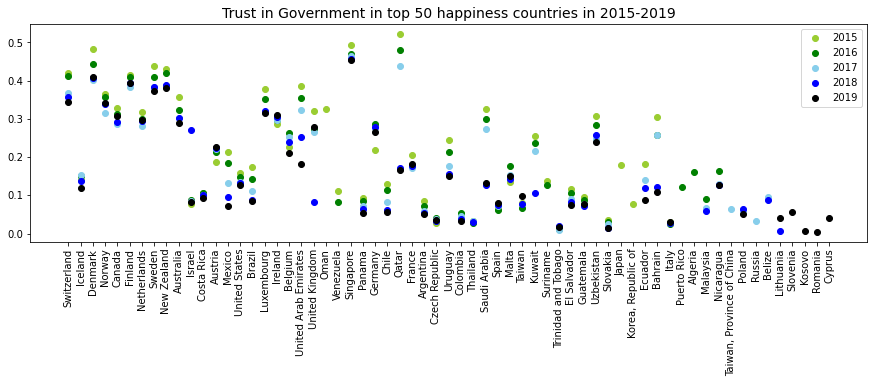

In [41]:
plt.figure(figsize=(15,4))
plt.scatter('Country','Trust (Government Corruption)', data=top50_2015,marker = "o", color='yellowgreen')
plt.scatter('Country','Trust (Government Corruption)', data=top50_2016,marker = "o", color='green')
plt.scatter('Country','Trust (Government Corruption)', data=top50_2017,marker = "o", color='skyblue')
plt.scatter('Country','Trust (Government Corruption)', data=top50_2018,marker = "o", color='blue')
plt.scatter('Country','Trust (Government Corruption)', data=top50_2019,marker = "o", color='black')
plt.xticks(rotation = 'vertical')
plt.legend(['2015','2016','2017','2018','2019'])
plt.title('Trust in Government in top 50 happiness countries in 2015-2019', fontsize=14)
             
plt.show()

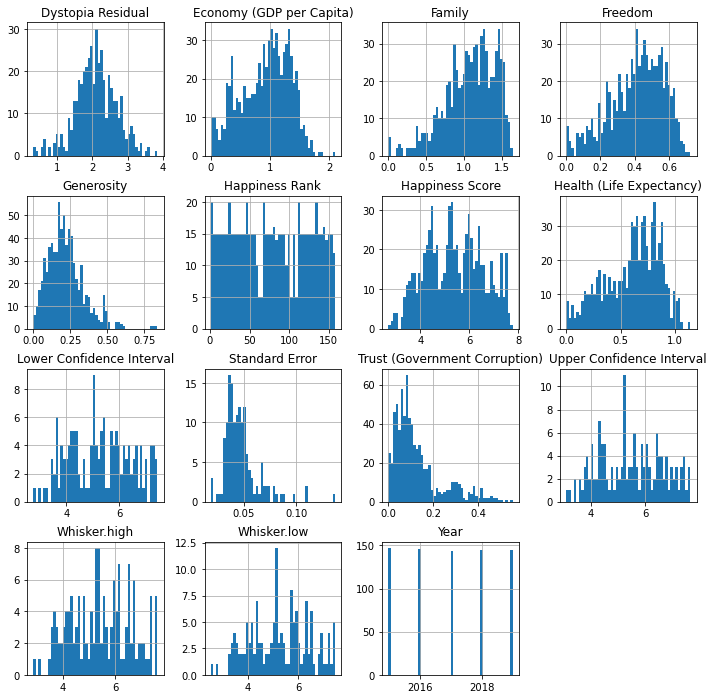

In [42]:
whr_concat.hist(bins=50,figsize=(12,12))
plt.show()

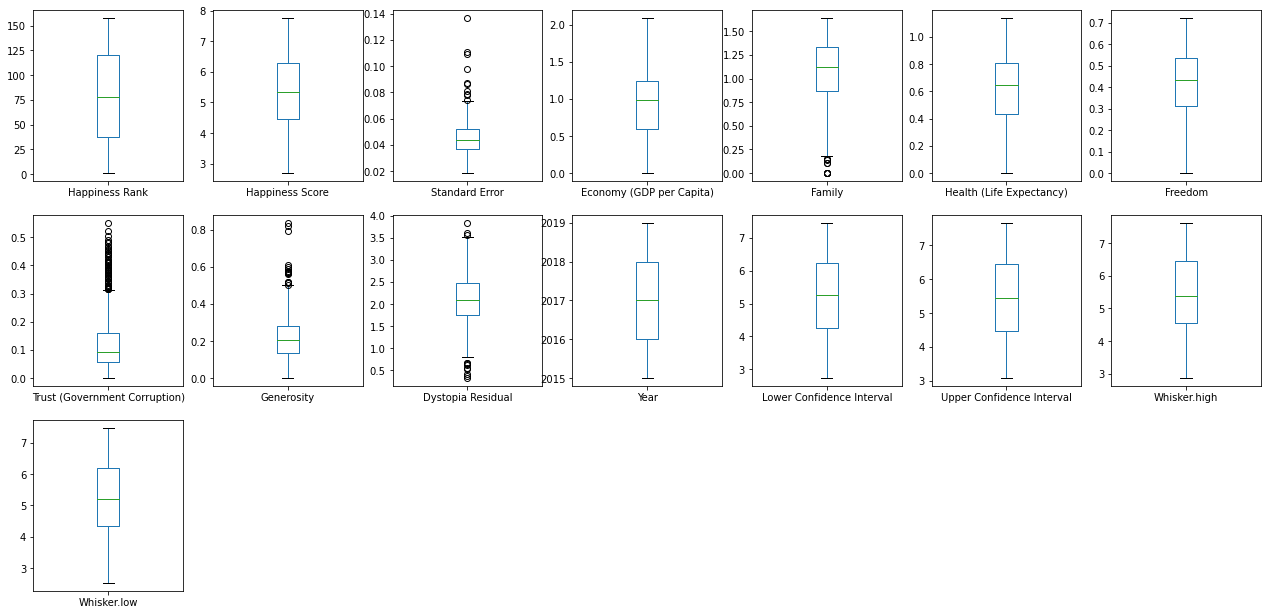

In [43]:
#boxplot
whr_concat.plot(kind = 'box', subplots = True, layout = (6, 7), sharex = False, sharey = False, figsize = (22, 22));
plt.show()

In [44]:
#Pair plot
#plt.figure(figsize=(4,4));
#sns.pairplot(whr_concat.iloc[:,0:12],diag_kind='kde',kind='reg',plot_kws={'line_kws':{'color':'red'}})

### Correlation Matrix

In [45]:
df_2015.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

count         mean        std         min  \
Happiness Rank                 158.0    79.493671  45.754363     1.00000   
Happiness Score                158.0     5.375734   1.145010     2.83900   
Standard Error                 158.0     0.047885   0.017146     0.01848   
Economy (GDP per Capita)       158.0     0.846137   0.403121     0.00000   
Family                         158.0     0.991046   0.272369     0.00000   
Health (Life Expectancy)       158.0     0.630259   0.247078     0.00000   
Freedom                        158.0     0.428615   0.150693     0.00000   
Trust (Government Corruption)  158.0     0.143422   0.120034     0.00000   
Generosity                     158.0     0.237296   0.126685     0.00000   
Dystopia Residual              158.0     2.098977   0.553550     0.32858   
Year                           158.0  2015.000000   0.000000  2015.00000   

                                        5%          25%          50%  \
Happiness Rank                    8.850000    40.250000    79.500000   
Happiness Score                   3.655850     4.526000     5.232500   
Standard Error                    0.031036     0.037268     0.043940   
Economy (GDP per Capita)          0.186325     0.545808     0.910245   
Family                            0.415606     0.856823     1.029510   
Health (Life Expectancy)          0.151588     0.439185     0.696705   
Freedom                           0.170474     0.328330     0.435515   
Trust (Government Corruption)     0.015823     0.061675     0.107220   
Generosity                        0.071195     0.150553     0.216130   
Dystopia Residual                 1.236587     1.759410     2.095415   
Year                           2015.000000  2015.000000  2015.000000   

                                       75%          90%          95%  \
Happiness Rank                  118.750000   142.300000   150.150000   
Happiness Score                   6.243750     6.957100     7.297700   
Standard Error                    0.052300     0.067919     0.079260   
Economy (GDP per Capita)          1.158448     1.328376     1.394645   
Family                            1.214405     1.291461     1.318472   
Health (Life Expectancy)          0.811013     0.908688     0.942084   
Freedom                           0.549092     0.624666     0.641588   
Trust (Government Corruption)     0.180255     0.326539     0.401446   
Generosity                        0.309883     0.412372     0.475174   
Dystopia Residual                 2.462415     2.801197     3.037456   
Year                           2015.000000  2015.000000  2015.000000   

                                       99%         max  
Happiness Rank                  156.430000   158.00000  
Happiness Score                   7.541620     7.58700  
Standard Error                    0.109694     0.13693  
Economy (GDP per Capita)          1.558387     1.69042  
Family                            1.364407     1.40223  
Health (Life Expectancy)          1.000643     1.02525  
Freedom                           0.663797     0.66973  
Trust (Government Corruption)     0.504991     0.55191  
Generosity                        0.543707     0.79588  
Dystopia Residual                 3.220851     3.60214  
Year                           2015.000000  2015.00000

In [46]:
df_2016.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

count         mean        std         min  \
Happiness Rank                 157.0    78.980892  45.466030     1.00000   
Happiness Score                157.0     5.382185   1.141674     2.90500   
Lower Confidence Interval      157.0     5.282395   1.148043     2.73200   
Upper Confidence Interval      157.0     5.481975   1.136493     3.07800   
Economy (GDP per Capita)       157.0     0.953880   0.412595     0.00000   
Family                         157.0     0.793621   0.266706     0.00000   
Health (Life Expectancy)       157.0     0.557619   0.229349     0.00000   
Freedom                        157.0     0.370994   0.145507     0.00000   
Trust (Government Corruption)  157.0     0.137624   0.111038     0.00000   
Generosity                     157.0     0.242635   0.133756     0.00000   
Dystopia Residual              157.0     2.325807   0.542220     0.81789   
Year                           157.0  2016.000000   0.000000  2016.00000   

                                        5%         25%         50%  \
Happiness Rank                    8.800000    40.00000    79.00000   
Happiness Score                   3.657200     4.40400     5.31400   
Lower Confidence Interval         3.555400     4.32700     5.23700   
Upper Confidence Interval         3.770600     4.46500     5.41900   
Economy (GDP per Capita)          0.271188     0.67024     1.02780   
Family                            0.244876     0.64184     0.84142   
Health (Life Expectancy)          0.157742     0.38291     0.59659   
Freedom                           0.127816     0.25748     0.39747   
Trust (Government Corruption)     0.018882     0.06126     0.10547   
Generosity                        0.055038     0.15457     0.22245   
Dystopia Residual                 1.438194     2.03171     2.29074   
Year                           2016.000000  2016.00000  2016.00000   

                                      75%          90%          95%  \
Happiness Rank                  118.00000   141.400000   149.200000   
Happiness Score                   6.26900     6.968800     7.317200   
Lower Confidence Interval         6.15400     6.866600     7.245600   
Upper Confidence Interval         6.43400     7.040600     7.386800   
Economy (GDP per Capita)          1.27964     1.442840     1.508508   
Family                            1.02152     1.087088     1.127410   
Health (Life Expectancy)          0.72993     0.828944     0.851056   
Freedom                           0.48453     0.552166     0.571572   
Trust (Government Corruption)     0.17554     0.312396     0.376086   
Generosity                        0.31185     0.437810     0.484268   
Dystopia Residual                 2.66465     3.006394     3.203172   
Year                           2016.00000  2016.000000  2016.000000   

                                       99%         max  
Happiness Rank                  155.440000   157.00000  
Happiness Score                   7.504520     7.52600  
Lower Confidence Interval         7.424080     7.46000  
Upper Confidence Interval         7.590880     7.66900  
Economy (GDP per Capita)          1.668417     1.82427  
Family                            1.170159     1.18326  
Health (Life Expectancy)          0.929113     0.95277  
Freedom                           0.591851     0.60848  
Trust (Government Corruption)     0.474543     0.50521  
Generosity                        0.574780     0.81971  
Dystopia Residual                 3.530091     3.83772  
Year                           2016.000000  2016.00000

In [47]:
df_2017.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

count         mean        std          min  \
Happiness Rank                 155.0    78.000000  44.888751     1.000000   
Happiness Score                155.0     5.354019   1.131230     2.693000   
Whisker.high                   155.0     5.452326   1.118542     2.864884   
Whisker.low                    155.0     5.255713   1.145030     2.521116   
Economy (GDP per Capita)       155.0     0.984718   0.420793     0.000000   
Family                         155.0     1.188898   0.287263     0.000000   
Health (Life Expectancy)       155.0     0.551341   0.237073     0.000000   
Freedom                        155.0     0.408786   0.149997     0.000000   
Generosity                     155.0     0.246883   0.134780     0.000000   
Trust (Government Corruption)  155.0     0.123120   0.101661     0.000000   
Dystopia Residual              155.0     1.850238   0.500028     0.377914   
Year                           155.0  2017.000000   0.000000  2017.000000   

                                        5%          25%          50%  \
Happiness Rank                    8.700000    39.500000    78.000000   
Happiness Score                   3.573600     4.505500     5.279000   
Whisker.high                      3.684026     4.608172     5.370032   
Whisker.low                       3.448395     4.374955     5.193152   
Economy (GDP per Capita)          0.241477     0.663371     1.064578   
Family                            0.621252     1.042635     1.253918   
Health (Life Expectancy)          0.111789     0.369866     0.606042   
Freedom                           0.117936     0.303677     0.437454   
Generosity                        0.051493     0.154106     0.231538   
Trust (Government Corruption)     0.020717     0.057271     0.089848   
Dystopia Residual                 1.055984     1.591291     1.832910   
Year                           2017.000000  2017.000000  2017.000000   

                                       75%          90%          95%  \
Happiness Rank                  116.500000   139.600000   147.300000   
Happiness Score                   6.101500     6.927000     7.293000   
Whisker.high                      6.194600     6.985557     7.363509   
Whisker.low                       6.006527     6.868443     7.231013   
Economy (GDP per Capita)          1.318027     1.486024     1.547884   
Family                            1.414316     1.485587     1.521465   
Health (Life Expectancy)          0.723008     0.827303     0.844827   
Freedom                           0.516561     0.587414     0.613266   
Generosity                        0.323762     0.428292     0.489702   
Trust (Government Corruption)     0.153296     0.282561     0.337245   
Dystopia Residual                 2.144654     2.488227     2.730996   
Year                           2017.000000  2017.000000  2017.000000   

                                       99%          max  
Happiness Rank                  153.460000   155.000000  
Happiness Score                   7.512280     7.537000  
Whisker.high                      7.587578     7.622030  
Whisker.low                       7.442808     7.479556  
Economy (GDP per Capita)          1.715124     1.870766  
Family                            1.554392     1.610574  
Health (Life Expectancy)          0.927086     0.949492  
Freedom                           0.634317     0.658249  
Generosity                        0.591739     0.838075  
Trust (Government Corruption)     0.446623     0.464308  
Dystopia Residual                 2.896075     3.117485  
Year                           2017.000000  2017.000000

In [48]:
df_2018.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

count         mean        std       min  \
Happiness Rank                 156.0    78.500000  45.177428     1.000   
Happiness Score                156.0     5.375917   1.119506     2.905   
Economy (GDP per Capita)       156.0     0.891449   0.391921     0.000   
Family                         156.0     1.213237   0.302372     0.000   
Health (Life Expectancy)       156.0     0.597346   0.247579     0.000   
Freedom                        156.0     0.454506   0.162424     0.000   
Generosity                     156.0     0.181006   0.098471     0.000   
Trust (Government Corruption)  156.0     0.112905   0.096843     0.000   
Year                           156.0  2018.000000   0.000000  2018.000   

                                       5%         25%        50%         75%  \
Happiness Rank                    8.75000    39.75000    78.5000   117.25000   
Happiness Score                   3.56025     4.45375     5.3780     6.16850   
Economy (GDP per Capita)          0.24150     0.61625     0.9495     1.19775   
Family                            0.62225     1.06675     1.2550     1.46300   
Health (Life Expectancy)          0.15025     0.42225     0.6440     0.77725   
Freedom                           0.12475     0.35600     0.4870     0.57850   
Generosity                        0.04150     0.10950     0.1740     0.23900   
Trust (Government Corruption)     0.01775     0.05100     0.0820     0.13900   
Year                           2018.00000  2018.00000  2018.0000  2018.00000   

                                     90%         95%         99%       max  
Happiness Rank                  140.5000   148.25000   154.45000   156.000  
Happiness Score                   6.9185     7.31650     7.57255     7.632  
Economy (GDP per Capita)          1.3420     1.40875     1.60885     2.096  
Family                            1.5260     1.56250     1.59605     1.644  
Health (Life Expectancy)          0.8925     0.91325     0.99700     1.030  
Freedom                           0.6375     0.66225     0.69050     0.724  
Generosity                        0.3090     0.36175     0.43340     0.598  
Trust (Government Corruption)     0.2760     0.32575     0.42420     0.457  
Year                           2018.0000  2018.00000  2018.00000  2018.000

In [49]:
df_2019.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

count         mean        std       min  \
Happiness Rank                 156.0    78.500000  45.177428     1.000   
Happiness Score                156.0     5.407096   1.113120     2.853   
Economy (GDP per Capita)       156.0     0.905147   0.398389     0.000   
Family                         156.0     1.208814   0.299191     0.000   
Health (Life Expectancy)       156.0     0.725244   0.242124     0.000   
Freedom                        156.0     0.392571   0.143289     0.000   
Generosity                     156.0     0.184846   0.095254     0.000   
Trust (Government Corruption)  156.0     0.110603   0.094538     0.000   
Year                           156.0  2019.000000   0.000000  2019.000   

                                       5%         25%        50%         75%  \
Happiness Rank                    8.75000    39.75000    78.5000   117.25000   
Happiness Score                   3.48150     4.54450     5.3795     6.18450   
Economy (GDP per Capita)          0.25200     0.60275     0.9600     1.23250   
Family                            0.64325     1.05575     1.2715     1.45250   
Health (Life Expectancy)          0.28825     0.54775     0.7890     0.88175   
Freedom                           0.14275     0.30800     0.4170     0.50725   
Generosity                        0.04675     0.10875     0.1775     0.24825   
Trust (Government Corruption)     0.01900     0.04700     0.0855     0.14125   
Year                           2019.00000  2019.00000  2019.0000  2019.00000   

                                     90%         95%         99%       max  
Happiness Rank                  140.5000   148.25000   154.45000   156.000  
Happiness Score                   7.0030     7.28525     7.57470     7.769  
Economy (GDP per Capita)          1.3745     1.44150     1.58865     1.684  
Family                            1.5175     1.53800     1.58425     1.624  
Health (Life Expectancy)          1.0210     1.03975     1.10330     1.141  
Freedom                           0.5575     0.58425     0.60570     0.631  
Generosity                        0.2915     0.34950     0.45455     0.566  
Trust (Government Corruption)     0.2675     0.32225     0.41045     0.453  
Year                           2019.0000  2019.00000  2019.00000  2019.000

In [50]:
whr_concat.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

count         mean        std          min  \
Happiness Rank                 727.0    78.298487  46.494856     1.000000   
Happiness Score                727.0     5.388019   1.161780     2.693000   
Standard Error                 147.0     0.047591   0.017199     0.018480   
Economy (GDP per Capita)       727.0     0.914437   0.415043     0.000000   
Family                         727.0     1.079134   0.333476     0.000000   
Health (Life Expectancy)       727.0     0.610337   0.250348     0.000000   
Freedom                        727.0     0.413060   0.154905     0.000000   
Trust (Government Corruption)  727.0     0.128085   0.107386     0.000000   
Generosity                     727.0     0.220474   0.122455     0.000000   
Dystopia Residual              437.0     2.096558   0.571674     0.328580   
Year                           727.0  2016.993122   1.417602  2015.000000   
Lower Confidence Interval      146.0     5.290021   1.183780     2.732000   
Upper Confidence Interval      146.0     5.488870   1.172010     3.078000   
Whisker.high                   144.0     5.461618   1.152940     2.864884   
Whisker.low                    144.0     5.263938   1.180501     2.521116   

                                        5%          25%          50%  \
Happiness Rank                    8.000000    37.000000    78.000000   
Happiness Score                   3.577100     4.451500     5.332000   
Standard Error                    0.030909     0.036780     0.043610   
Economy (GDP per Capita)          0.205272     0.593865     0.981240   
Family                            0.440000     0.870456     1.123236   
Health (Life Expectancy)          0.158317     0.431392     0.647380   
Freedom                           0.121606     0.312000     0.434000   
Trust (Government Corruption)     0.016405     0.056000     0.093000   
Generosity                        0.055000     0.134000     0.204435   
Dystopia Residual                 1.110570     1.749222     2.097538   
Year                           2015.000000  2016.000000  2017.000000   
Lower Confidence Interval         3.540000     4.260750     5.266000   
Upper Confidence Interval         3.769500     4.454750     5.451000   
Whisker.high                      3.668031     4.550768     5.380905   
Whisker.low                       3.433605     4.326389     5.193687   

                                       75%          90%          95%  \
Happiness Rank                  120.500000   142.000000   149.700000   
Happiness Score                   6.296500     6.993400     7.321600   
Standard Error                    0.051825     0.068092     0.078768   
Economy (GDP per Capita)          1.247430     1.405282     1.489195   
Family                            1.331000     1.479940     1.525700   
Health (Life Expectancy)          0.808579     0.893400     0.954838   
Freedom                           0.534660     0.596593     0.632000   
Trust (Government Corruption)     0.159775     0.299594     0.376486   
Generosity                        0.280853     0.378044     0.470277   
Dystopia Residual                 2.465700     2.823716     3.054800   
Year                           2018.000000  2019.000000  2019.000000   
Lower Confidence Interval         6.223500     6.902500     7.258250   
Upper Confidence Interval         6.462000     7.116500     7.391750   
Whisker.high                      6.446130     7.031961     7.376082   
Whisker.low                       6.197101     6.906440     7.244043   

                                       99%          max  
Happiness Rank                  155.000000   158.000000  
Happiness Score                   7.549580     7.769000  
Standard Error                    0.109884     0.136930  
Economy (GDP per Capita)          1.674900     2.096000  
Family                            1.583740     1.644000  
Health (Life Expectancy)          1.038220     1.141000  
Freedom                           0.669540     0.724000  
Trust (Government Corruption

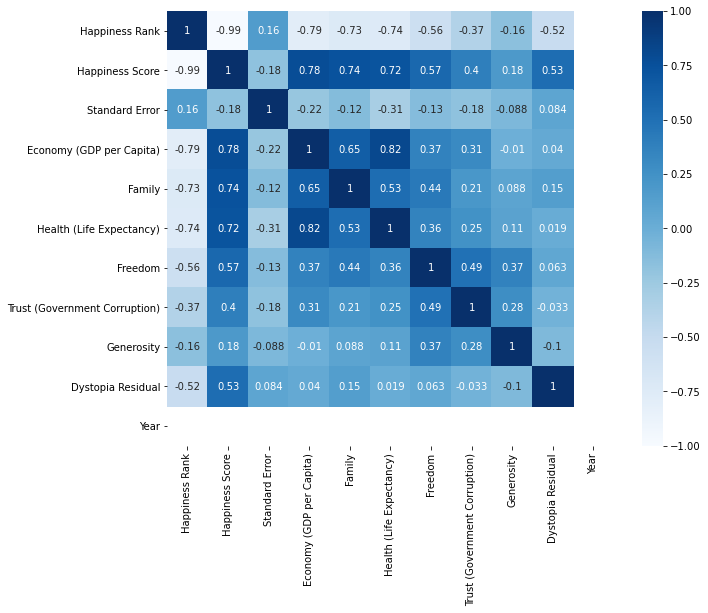

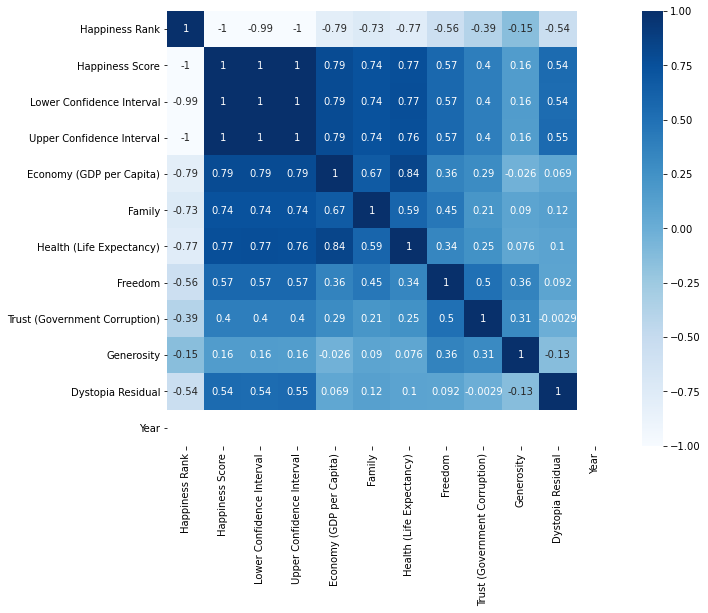

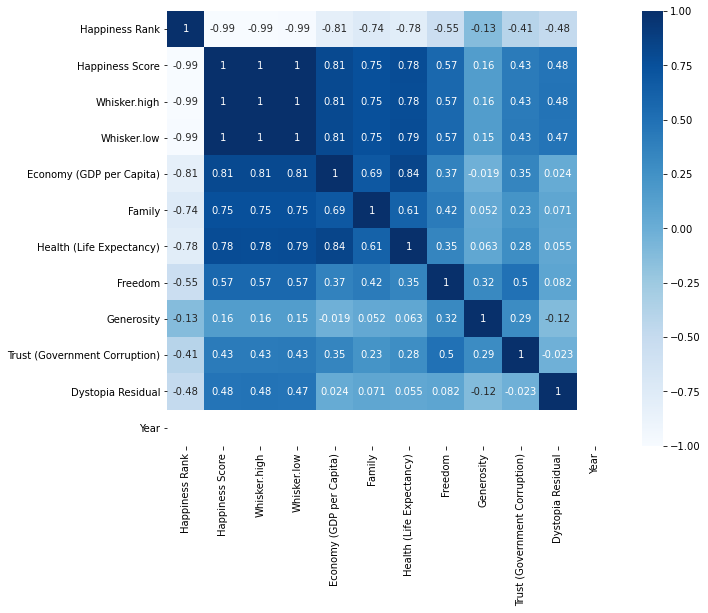

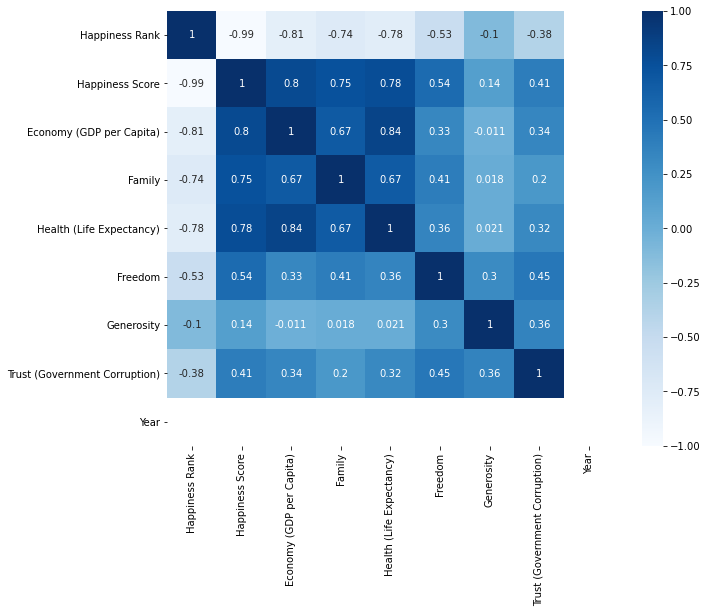

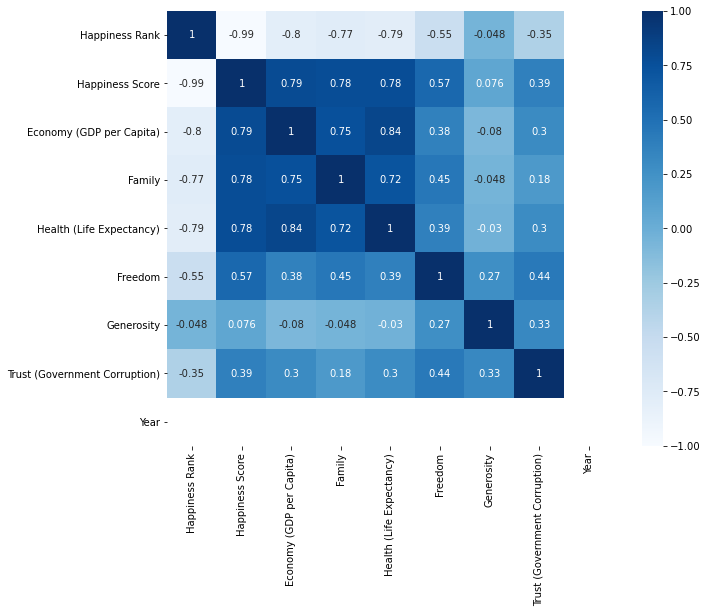

In [51]:
corr_2015 = df_2015.corr()
corr_2016 = df_2016.corr()
corr_2017 = df_2017.corr()
corr_2018 = df_2018.corr()
corr_2019 = df_2019.corr()
corr_lsts = [corr_2015, corr_2016, corr_2017, corr_2018, corr_2019]

for i in corr_lsts:
    figure = plt.figure(figsize=(10,8))
    sns.heatmap(i,cmap='Blues',vmax=1,vmin=-1,center=0,annot=True)
    plt.show()

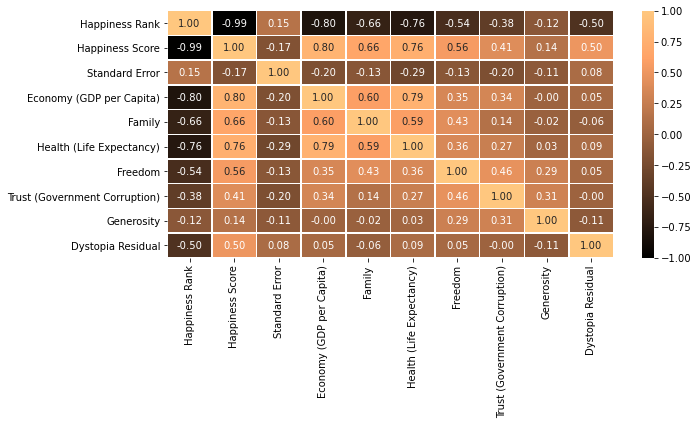

In [52]:
#Correlation map
fig= plt.figure(figsize=(10,10))
ax1=plt.subplot(2,1,1)
sns.heatmap(whr_concat.iloc[:,0:12].corr(), annot=True, fmt=".2f", cmap = 'copper', linewidths=.5,vmin=-1, vmax=1, center= 0,ax=ax1)  

### Data Reduction: PCA

In [53]:
whr_concat1 = whr_concat.copy()
x = whr_concat1[['Economy (GDP per Capita)','Family','Health (Life Expectancy)',
               'Freedom','Trust (Government Corruption)','Generosity']]
y = whr_concat1['Happiness Score']

In [54]:
#train test split after pca
X = StandardScaler().fit_transform(x)
pca1 = PCA()
pca1.fit_transform(X)

#principalcomponents.fit(X.iloc[:, :].dropna(axis=0))

num_components1 = len(pca1.explained_variance_ratio_)
ind = np.arange(num_components1)
vals = pca1.explained_variance_ratio_
cumvals = np.cumsum(vals)

pcaSummary = pd.DataFrame({'Standard deviation': np.sqrt(pca1.explained_variance_),
                           'Proportion of variance': pca1.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pca1.explained_variance_ratio_)})

pcaSummary = pcaSummary.transpose()
pcaSummary.columns = ['pca{}'.format(i) for i in range(1, len(pcaSummary.columns) + 1)]
pcaSummary.round(4)

pca1    pca2    pca3    pca4    pca5    pca6
Standard deviation      1.6777  1.1663  0.8142  0.7859  0.5908  0.4512
Proportion of variance  0.4685  0.2264  0.1103  0.1028  0.0581  0.0339
Cumulative proportion   0.4685  0.6949  0.8052  0.9080  0.9661  1.0000

C:\Users\14830\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\14830\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'World Happiness Report: Explained Variance per Principal Component')

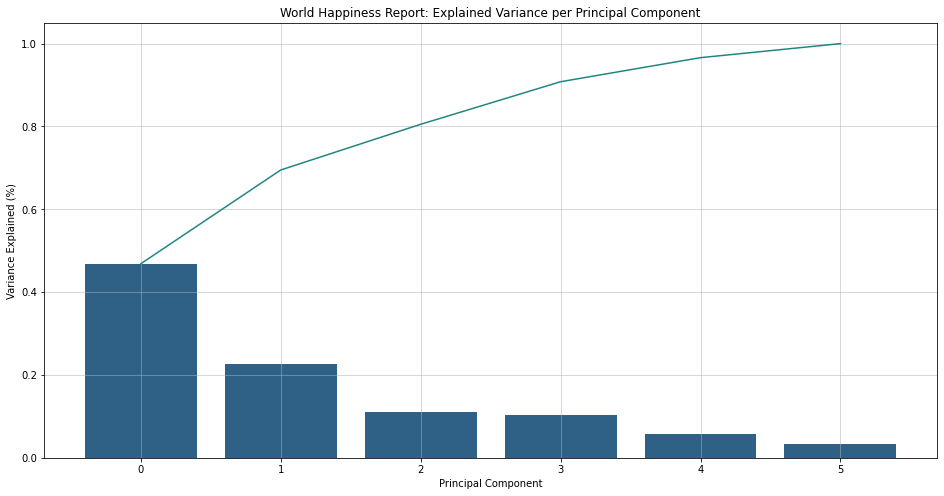

In [55]:
# Scree plot (variance explained by each principal component)
import matplotlib.ticker as ticker

color_use = ['#206394','#208582','#42c4c7','#8786a7','#f6cd61','#fe8a71','#ED4534','#BC342C']
plt.figure(figsize=(16,8))
ax = sns.barplot(ind, vals, palette=color_use[:1], ci=None)
ax2 = sns.lineplot(ind, cumvals, color=color_use[1], ci=None)
ax.grid(b=True, which='major', linewidth=0.5)

#ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel("Principal Component")
ax.set_ylabel("Variance Explained (%)")
plt.title('World Happiness Report: Explained Variance per Principal Component')

In [56]:
#reduce deminsion to X only
num_components2 = len(cumvals[cumvals <= 0.80])
print(num_components2)

# return PCA with components that explain 80% of the variance
pca2 = PCA(n_components = num_components2, whiten=True)
principalcomponents = pca2.fit_transform(X)
#principalcomponents = pca1.fit(X)
#principalcomponents = pca1.transform(X)
#principalcomponents = pca2.fit_transform(X_train_pca)
np.cumsum(pca2.explained_variance_ratio_)

2


array([0.46845899, 0.69487447])

In [58]:
#whrPCA_des = pd.DataFrame(pca1.components_.transpose(), columns=pcaSummary.columns, index=x.columns)
#whrPCA_des.iloc[:, :2]
#whrPCA_des = whrPCA_des.iloc[:,:2]
#display(whrPCA_des)

In [59]:
pcaDF = pd.DataFrame(data = principalcomponents[:, 0:2], columns = pcaSummary.columns.tolist()[0:2])

In [60]:
y.to_frame()

Happiness Score
0              7.587
1              7.561
2              7.527
3              7.522
4              7.427
..               ...
151            3.334
152            3.231
153            3.203
154            3.083
155            2.853

[727 rows x 1 columns]

In [61]:
y.reset_index(drop=True, inplace=True)
pcaDF.reset_index(drop=True, inplace=True)

In [62]:
#new dataset using PCA
whrPCA = pd.concat([pcaDF, y], axis = 1)
whrPCA.index += 1
display(whrPCA)

pca1      pca2  Happiness Score
1   -1.938449  1.225627            7.587
2   -1.436071  0.752206            7.561
3   -1.932981  1.737262            7.527
4   -1.838212  1.290335            7.522
5   -1.701686  1.668422            7.427
..        ...       ...              ...
723 -0.040672  1.877183            3.334
724  0.535367  0.800211            3.231
725  2.036727 -0.546017            3.203
726  2.576366  1.027719            3.083
727  1.938832 -0.029029            2.853

[727 rows x 3 columns]

In [63]:
print(whrPCA.dtypes)

pca1               float64
pca2               float64
Happiness Score    float64
dtype: object


In [64]:
def happiness_col(row):
    if row['Happiness Score'] >= 0. and row['Happiness Score'] <= 4.5:
        return 'Low happyiness'
    else:
        return 'High Happiness'

 
whrPCA['New Happiness Score Name'] = whrPCA.apply(happiness_col, axis=1)
#whrPCA['New Happiness Score']= whrPCA.apply(happiness_col, axis=1) 
whrPCA['New Happiness Score'] = whrPCA['New Happiness Score Name'].map({'Low happyiness':0, 'High Happiness':1}) 
whrPCA

pca1      pca2  Happiness Score New Happiness Score Name  \
1   -1.938449  1.225627            7.587           High Happiness   
2   -1.436071  0.752206            7.561           High Happiness   
3   -1.932981  1.737262            7.527           High Happiness   
4   -1.838212  1.290335            7.522           High Happiness   
5   -1.701686  1.668422            7.427           High Happiness   
..        ...       ...              ...                      ...   
723 -0.040672  1.877183            3.334           Low happyiness   
724  0.535367  0.800211            3.231           Low happyiness   
725  2.036727 -0.546017            3.203           Low happyiness   
726  2.576366  1.027719            3.083           Low happyiness   
727  1.938832 -0.029029            2.853           Low happyiness   

     New Happiness Score  
1                      1  
2                      1  
3                      1  
4                      1  
5                      1  
..                   ...  
723                    0  
724                    0  
725                    0  
726                    0  
727                    0  

[727 rows x 5 columns]

In [65]:
#count number for Low happiness and High happiness
for i in set(whrPCA['New Happiness Score Name']):
    print(str(i)+' : '+str(sum([x == i for x in list(whrPCA['New Happiness Score Name'])])))

High Happiness : 534
Low happyiness : 193


Text(0.5, 0.98, '2 components PCA')

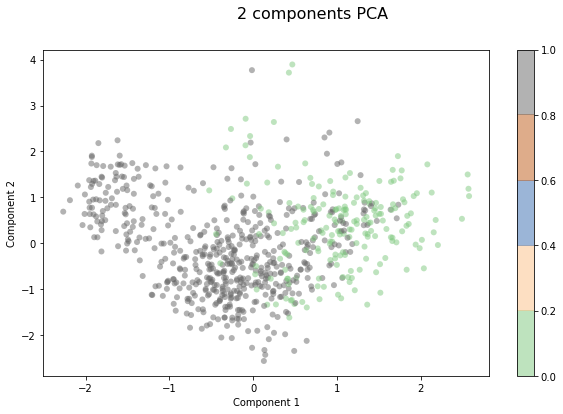

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(principalcomponents[:, 0], principalcomponents[:, 1],
            c=list(whrPCA['New Happiness Score']), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 5))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.suptitle("2 components PCA", fontsize=16)

Text(0.5, 0.98, '2 components PCA')

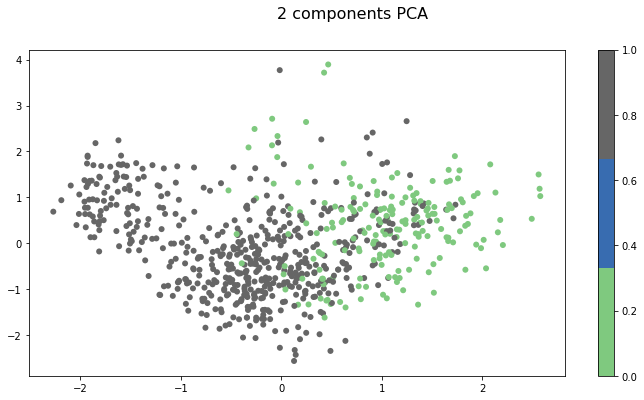

In [67]:
fig = plt.figure(figsize=(12,6))
plt.scatter(*principalcomponents.T,  c=list(whrPCA['New Happiness Score']), edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('Accent', 3))
plt.colorbar()
plt.suptitle("2 components PCA", fontsize=16)

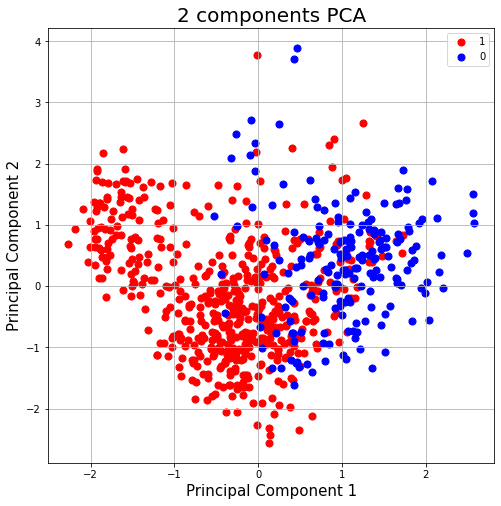

In [68]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 components PCA', fontsize = 20)
#targets = ['pca1', 'pca2', 'pca3']

#split happiness score
#HappinessScore = ['Low Happiness', 'High Happiness']
HappinessScore = [1, 0]

colors = ['r', 'b']
for HS, color in zip(HappinessScore, colors):
    indicesToKeep = whrPCA['New Happiness Score'] == HS
    ax.scatter(whrPCA.loc[indicesToKeep, 'pca1']
               , whrPCA.loc[indicesToKeep, 'pca2']
               , c = color
               , s = 50)
ax.legend(HappinessScore)
ax.grid()

## Modeling by Original Data 

In [69]:
#Split the data into 80% training and 20% testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)

#### 1. Linear Regression model

In [70]:
#start timer
startTime = perf_counter()

lr = LinearRegression()
lr.fit(X_train1, y_train1)

print("-------------------------------")
print("Linear Regression: ")
print("-------------------------------")

fullsmp_lr = lr.score(x, y)
print("Full sample R-squared:", fullsmp_lr)

y_pred_lr_train1 = lr.predict(X_train1)
y_pred_lr_test1 = lr.predict(X_test1)

lr_trainScore1 = lr.score(X_train1, y_train1)
lr_testScore1 = lr.score(X_test1, y_test1)
print("Train Score:", lr_trainScore1)
print("Test Score:", lr_testScore1)

#Using cross validation
cv_lr = cross_val_score(lr, x, y, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2').mean()
#cv_lr = cross_val_score(lr, X_test, y_test, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2').mean()
print("Test Score(Cross Validation):", cv_lr)
print(" ")

print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)
 
mse_lr = mean_squared_error(y_test1, y_pred_lr_test1)
r2_lr = r2_score(y_test1, y_pred_lr_test1)
print('Mean squared error (MSE): %.4f' % mse_lr)
print('Coefficient of determination (R^2): %.4f' % r2_lr)
print(" ")

print('Train Set：')
regressionSummary(y_train1, y_pred_lr_train1)
print(" ")
print('Test Set：')
regressionSummary(y_test1, y_pred_lr_test1)

me_lr = round(np.mean(y_test1 - y_pred_lr_test1), 4)
rmse_lr = round(np.sqrt(metrics.mean_squared_error(y_test1, y_pred_lr_test1)), 4)
mae_lr = round(metrics.mean_absolute_error(y_test1, y_pred_lr_test1), 4)

#end timer
endTime = perf_counter()
time1 = endTime-startTime
print("Total time:", time1)

-------------------------------
Linear Regression: 
-------------------------------
Full sample R-squared: 0.7722335227215111
Train Score: 0.7788286463047309
Test Score: 0.7443027694936553
Test Score(Cross Validation): 0.760822194252752
 
Coefficients: [1.09875845 0.63358019 1.06446687 1.56433727 0.92783245 0.54166871]
Intercept: 2.1689176764852793
Mean squared error (MSE): 0.3282
Coefficient of determination (R^2): 0.7443
 
Train Set：

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.5492
            Mean Absolute Error (MAE) : 0.4247
          Mean Percentage Error (MPE) : -1.1302
Mean Absolute Percentage Error (MAPE) : 8.3668
 
Test Set：

Regression statistics

                      Mean Error (ME) : -0.0173
       Root Mean Squared Error (RMSE) : 0.5729
            Mean Absolute Error (MAE) : 0.4395
          Mean Percentage Error (MPE) : -1.8700
Mean Absolute Percentage Error (MAPE) : 9.1076
Total time: 0.958173999999

In [71]:
#with cross-validation
lr2 = LinearRegression()
lr2.fit(X_train1, y_train1)

cv_lr2 = cross_validate(lr2, x, y, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2', return_train_score=True)
lr2_train = np.mean(cv_lr2['train_score'])
lr2_test = np.mean(cv_lr2['test_score'])

print('Train Score',"{:.4%}".format(lr2_train))
print('Test Score',"{:.4%}".format(lr2_test))

Train Score 77.4361%
Test Score 76.0054%


#### 2. Ridge Regression model

In [72]:
#start timer
startTime = perf_counter()

#ridge = Ridge(alpha=alpha_ridge)
alpha_ridge = np.arange(start=0.05,stop=10.0,step=0.1)
length_ridge1 = len(alpha_ridge)
ridge_trainScore1 = []
ridge_testScore1 = []
#training_score1 = []
#test_score1 = []
#coef1 = []

for i in range(length_ridge1):
    ridge = Ridge(alpha=alpha_ridge[i])
    ridge.fit(X_train1, y_train1)
    y_pred_ridge_train1 = ridge.predict(X_train1)
    y_pred_ridge_test1 = ridge.predict(X_test1)
    #Using cross validation
    cv_ridge = cross_val_score(ridge, x, y, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
    #cv_ridge = cross_val_score(ridge, X_test1, y_test1, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
    #ridge_trainScore1 = ridge.score(X_train1, y_train1)
    #ridge_testScore1 = ridge.score(X_test1, y_test1)
    
    #store train accuracy
    ridge_trainScore1.append(ridge.score(X_train1, y_train1))
    #training_score1.append(np.mean(ridge_trainScore1))
    #store test accuracy
    ridge_testScore1.append(ridge.score(X_test1, y_test1))
    #test_score1.append(np.mean(ridge_testScore1))
    #coef1.append(ridge.coef_)


print("-------------------------------")
print("Ridge Regression: ")
print("-------------------------------")

fullsmp_ridge = ridge.score(x, y)
print("Full sample R-squared:", fullsmp_ridge)
print(" ")

dataframe_ridge = {'Alpha': alpha_ridge,
             'Train Set Score': ridge_trainScore1,
             'Test Set Score': ridge_testScore1,
             "Test Score(Cross Validation)" : cv_ridge}
 
table_ridge = pd.DataFrame(dataframe_ridge)
table_ridge.index += 1
table_ridge = table_ridge.sort_values(["Test Score(Cross Validation)","Test Set Score"], ascending=[False,False])
#table_ridge = table_ridge.sort_values("Test Set Score", ascending=False)
#table_ridge = table_ridge.sort_values(["Test Score(Cross Validation)"], ascending=False)
display(table_ridge)

#ridge_trainScore1 = ridge_trainScore1.mean()
#ridge_testScore1 = ridge_testScore1.mean()

#print("Train Score:", ridge_trainScore1)
#print("Test Score:", ridge_testScore1)
print(" ")
print('Coefficients:', ridge.coef_)
print('Intercept:', ridge.intercept_)

mse_ridge = mean_squared_error(y_test1, y_pred_ridge_test1)
r2_ridge = r2_score(y_test1, y_pred_ridge_test1)
print('Mean squared error (MSE): %.4f' % mse_ridge)
print('Coefficient of determination (R^2): %.4f' % r2_ridge)
print(" ")

print('Train Set：')
regressionSummary(y_train1, y_pred_ridge_train1)
print(" ")
print('Test Set：')
regressionSummary(y_test1, y_pred_ridge_test1)

me_ridge = round(np.mean(y_test1 - y_pred_ridge_test1), 4)
rmse_ridge = round(np.sqrt(metrics.mean_squared_error(y_test1, y_pred_ridge_test1)), 4)
mae_ridge = round(metrics.mean_absolute_error(y_test1, y_pred_ridge_test1), 4)

#end timer
endTime = perf_counter()
time2 = endTime-startTime
print("Total time:", time2)

-------------------------------
Ridge Regression: 
-------------------------------
Full sample R-squared: 0.7631595715122454
 


Alpha  Train Set Score  Test Set Score  Test Score(Cross Validation)
23   2.25         0.777730        0.747247                      0.813876
90   8.95         0.769265        0.744509                      0.803527
97   9.65         0.768241        0.743807                      0.801871
94   9.35         0.768681        0.744113                      0.801449
95   9.45         0.768535        0.744012                      0.800942
..    ...              ...             ...                           ...
40   3.95         0.776001        0.747602                      0.704723
87   8.65         0.769701        0.744796                      0.704677
81   8.05         0.770566        0.745343                      0.702405
46   4.55         0.775288        0.747492                      0.693596
67   6.65         0.772537        0.746448                      0.677212

[100 rows x 4 columns]

 
Coefficients: [1.15067058 0.69647135 0.8836515  1.01014744 0.5502247  0.40788009]
Intercept: 2.4705001580822192
Mean squared error (MSE): 0.3292
Coefficient of determination (R^2): 0.7435
 
Train Set：

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.5628
            Mean Absolute Error (MAE) : 0.4466
          Mean Percentage Error (MPE) : -1.4292
Mean Absolute Percentage Error (MAPE) : 8.7456
 
Test Set：

Regression statistics

                      Mean Error (ME) : -0.0162
       Root Mean Squared Error (RMSE) : 0.5738
            Mean Absolute Error (MAE) : 0.4532
          Mean Percentage Error (MPE) : -2.0627
Mean Absolute Percentage Error (MAPE) : 9.3289
Total time: 82.7125367


In [73]:
# choose the best parameter with cross-validation
ridge2 = Ridge(alpha = 2.25)
ridge2.fit(X_train1, y_train1)

cv_ridge2 = cross_validate(ridge2, x, y, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2', return_train_score=True)
ridge2_train = np.mean(cv_ridge2['train_score'])
ridge2_test = np.mean(cv_ridge2['test_score'])

print('Train Score',"{:.4%}".format(ridge2_train))
print('Test Score',"{:.4%}".format(ridge2_test))

Train Score 77.2967%
Test Score 76.2101%


#### 3. Lasso Regression model

In [74]:
##this is for train test split before pca 

#start timer
startTime = perf_counter()

#lasso = Lasso(alpha=alpha_lasso)

alpha_lasso = np.arange(start=0.0001, stop=0.0101, step=0.0001)
#alpha_lasso = np.arange(start=0.0001, stop=0.01, step=0.0002)
length_lasso1 = len(alpha_lasso)
lasso_trainScore1 = []
lasso_testScore1 = []
#training_score1 = []
#test_score1 = []
#coef1 = []

for i in range(length_lasso1):
    lasso = Lasso(alpha=alpha_lasso[i])
    lasso.fit(X_train1, y_train1)
    y_pred_lasso_train1 = lasso.predict(X_train1)
    y_pred_lasso_test1 = lasso.predict(X_test1)
    #Using cross validation
    cv_lasso = cross_val_score(lasso, x, y, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
    #cv_lasso = cross_val_score(lasso, X_test1, y_test1, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
    
    #lasso_trainScore1 = lasso.score(X_train1, y_train1)
    #lasso_testScore1 = lasso.score(X_test1, y_test1)
    
    #store train accuracy
    lasso_trainScore1.append(lasso.score(X_train1, y_train1))
    #training_score1.append(np.mean(ridge_trainScore1))
    #store test accuracy
    lasso_testScore1.append(lasso.score(X_test1, y_test1))
    #test_score1.append(np.mean(ridge_testScore1))
    #coef1.append(ridge.coef_)

print("-------------------------------")
print("Lasso Regression: ")
print("-------------------------------")

fullsmp_lasso = lasso.score(x, y)
print("Full sample R-squared:", fullsmp_lasso)
print(" ")

dataframe_lasso = {'Alpha': alpha_lasso,
             'Train Set Score': lasso_trainScore1,
             'Test Set Score': lasso_testScore1,
             "Test Score(Cross Validation)" : cv_lasso}
 
table_lasso = pd.DataFrame(dataframe_lasso)
table_lasso.index += 1
table_lasso = table_lasso.sort_values(["Test Score(Cross Validation)","Test Set Score"], ascending=[False,False])
#table_lasso = table_lasso.sort_values("Test Set Score", ascending=False)
#table_lasso = table_lasso.sort_values(["Test Score(Cross Validation)"], ascending=False)
display(table_lasso)

#lasso_trainScore1 = lasso_trainScore1.mean()
#lasso_testScore1 = lasso_testScore1.mean()
#print("Train Score:", lasso_trainScore1)
#print("Test Score:", lasso_testScore1)
print(" ")

print('Coefficients:', lasso.coef_)
print('Intercept:', lasso.intercept_)

mse_lasso = mean_squared_error(y_test1, y_pred_lasso_test1)
r2_lasso = r2_score(y_test1, y_pred_lasso_test1)
print('Mean squared error (MSE): %.4f' % mse_lasso)
print('Coefficient of determination (R^2): %.4f' % r2_lasso)
print(" ")

print('Train Set：')
regressionSummary(y_train1, y_pred_lasso_train1)
print(" ")
print('Test Set：')
regressionSummary(y_test1, y_pred_lasso_test1)

me_lasso = round(np.mean(y_test1 - y_pred_lasso_test1), 4)
rmse_lasso = round(np.sqrt(metrics.mean_squared_error(y_test1, y_pred_lasso_test1)), 4)
mae_lasso = round(metrics.mean_absolute_error(y_test1, y_pred_lasso_test1), 4)

#end timer
endTime = perf_counter()
time3 = endTime-startTime
print("Total time:", time3)

-------------------------------
Lasso Regression: 
-------------------------------
Full sample R-squared: 0.7638711192645156
 


Alpha  Train Set Score  Test Set Score  Test Score(Cross Validation)
92  0.0092         0.770641        0.742471                      0.818233
91  0.0091         0.770818        0.742586                      0.813463
95  0.0095         0.770099        0.742116                      0.806869
87  0.0087         0.771507        0.743022                      0.802483
62  0.0062         0.775111        0.744998                      0.799614
..     ...              ...             ...                           ...
96  0.0096         0.769914        0.741993                      0.692716
75  0.0075         0.773388        0.744132                      0.686445
9   0.0009         0.778750        0.744897                      0.678763
24  0.0024         0.778272        0.745516                      0.663301
43  0.0043         0.777040        0.745632                      0.645506

[100 rows x 4 columns]

 
Coefficients: [1.22322139 0.55839298 0.90573304 1.53954139 0.20538939 0.07882343]
Intercept: 2.438840343112514
Mean squared error (MSE): 0.3318
Coefficient of determination (R^2): 0.7415
 
Train Set：

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.5611
            Mean Absolute Error (MAE) : 0.4429
          Mean Percentage Error (MPE) : -1.3131
Mean Absolute Percentage Error (MAPE) : 8.6547
 
Test Set：

Regression statistics

                      Mean Error (ME) : -0.0218
       Root Mean Squared Error (RMSE) : 0.5760
            Mean Absolute Error (MAE) : 0.4458
          Mean Percentage Error (MPE) : -2.0570
Mean Absolute Percentage Error (MAPE) : 9.1564
Total time: 78.0696366


In [75]:
# choose the best parameter with cross-validation
lasso2 = Lasso(alpha = 0.0092)
lasso2.fit(X_train1, y_train1)

cv_lasso2 = cross_validate(lasso2, x, y, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2', return_train_score=True)
lasso2_train = np.mean(cv_lasso2['train_score'])
lasso2_test = np.mean(cv_lasso2['test_score'])

print('Train Score',"{:.4%}".format(lasso2_train))
print('Test Score',"{:.4%}".format(lasso2_test))

Train Score 76.5616%
Test Score 75.5461%


#### KNN

In [76]:
#start timer
startTime = perf_counter()

#knn = KNeighborsRegressor(n_neighbors=10).fit(X_train1, y_train1)
#nmc = 100
#shuffle = ShuffleSplit(n_splits = nmc)

kList = np.arange(start=1, stop=101, step=1)
knn_trainScore1 = []
knn_testScore1 = []
cv_knnlst1 = []
#training_accuracy1 = []
#test_accuracy1 = []

for k in kList:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train1,y_train1)
    y_pred_knn_train1 = knn.predict(X_train1)
    y_pred_knn_test1 = knn.predict(X_test1)
    #Using cross validation
    cv_knn = cross_val_score(knn, x, y, cv=ShuffleSplit(n_splits=100, test_size=0.20), scoring = 'r2')
    #cv_knn = cross_val_score(knn, X_test1, y_test1, cv=ShuffleSplit(n_splits=100, test_size=0.20), scoring = 'r2')
    cv_knnlst1.append(cv_knn)
    #knn_trainScore1 = knn.score(X_train1, y_train1)
    #knn_testScore1 = knn.score(X_test1, y_test1)
    
    # record train accuracy
    knn_trainScore1.append(knn.score(X_train1, y_train1))
    #training_accuracy1.append(knn_trainScore1)
    # record test accuracy
    knn_testScore1.append(knn.score(X_test1, y_test1))
    #test_accuracy1.append(knn_testScore1)

print("-------------------------------")
print("K Nearest Neighbors Regression: ")
print("-------------------------------")

fullsmp_knn = knn.score(x, y)
print("Full sample R-squared:", fullsmp_knn)

#Using cross validation
#print("Test Score(Cross Validation):", cv_knn)
print(" ")

dataframe_knn = {'Neighbor Sizes': kList,
             'Train Set Score': knn_trainScore1,
             'Test Set Score': knn_testScore1,
              "Test Score(Cross Validation)": cv_knn}
 
table_knn = pd.DataFrame(dataframe_knn)
table_knn = table_knn.set_index('Neighbor Sizes')
#table_knn = table_knn.sort_values(["Test Score(Cross Validation)","Test Set Score"], ascending=[False,False])
#table_knn = table_knn.sort_values("Test Set Score", ascending=False)
table_knn = table_knn.sort_values(["Test Score(Cross Validation)"], ascending=False)
display(table_knn)

#knn_trainScore1 = knn_trainScore1.mean()
#knn_testScore1 = knn_testScore1.mean()
#print("Train Score:", knn_trainScore1)
#print("Test Score:", knn_testScore1)
print(" ")

mse_knn = mean_squared_error(y_test1, y_pred_knn_test1)
r2_knn = r2_score(y_test1, y_pred_knn_test1)
print('Mean squared error (MSE): %.4f' % mse_knn)
print('Coefficient of determination (R^2): %.4f' % r2_knn)
print(" ")

print('Train Set：')
regressionSummary(y_train1, y_pred_knn_train1)
print(" ")
print('Test Set：')
regressionSummary(y_test1, y_pred_knn_test1)

me_knn = round(np.mean(y_test1- y_pred_knn_test1), 4)
rmse_knn = round(np.sqrt(metrics.mean_squared_error(y_test1, y_pred_knn_test1)), 4)
mae_knn = round(metrics.mean_absolute_error(y_test1, y_pred_knn_test1), 4)

#regression_report(y_test1, y_pred_knn_test1)

#end timer
endTime = perf_counter()
time4 = endTime-startTime
print("Total time:", time4)

-------------------------------
K Nearest Neighbors Regression: 
-------------------------------
Full sample R-squared: 0.7552458177128081
 


Train Set Score  Test Set Score  Test Score(Cross Validation)
Neighbor Sizes                                                               
40                     0.793708        0.775150                      0.809801
17                     0.816429        0.788719                      0.807413
66                     0.778817        0.763838                      0.807077
90                     0.763732        0.748003                      0.806385
49                     0.789464        0.770763                      0.800383
...                         ...             ...                           ...
78                     0.770665        0.756642                      0.707364
31                     0.800251        0.781297                      0.704168
83                     0.767961        0.755114                      0.702644
45                     0.791500        0.770859                      0.702185
4                      0.888166        0.801041                      0.673552

[100 rows x 3 columns]

 
Mean squared error (MSE): 0.3278
Coefficient of determination (R^2): 0.7446
 
Train Set：

Regression statistics

                      Mean Error (ME) : -0.0655
       Root Mean Squared Error (RMSE) : 0.5748
            Mean Absolute Error (MAE) : 0.4575
          Mean Percentage Error (MPE) : -2.9557
Mean Absolute Percentage Error (MAPE) : 9.2675
 
Test Set：

Regression statistics

                      Mean Error (ME) : -0.0539
       Root Mean Squared Error (RMSE) : 0.5725
            Mean Absolute Error (MAE) : 0.4578
          Mean Percentage Error (MPE) : -2.7751
Mean Absolute Percentage Error (MAPE) : 9.4549
Total time: 136.08867400000003


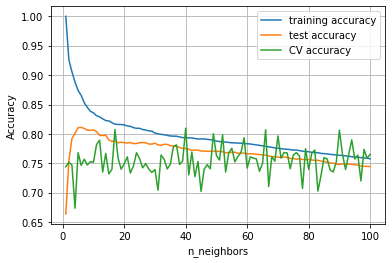

In [77]:
plt.plot(kList, knn_trainScore1, label="training accuracy") 
plt.plot(kList, knn_testScore1, label="test accuracy")
plt.plot(kList, cv_knn, label="CV accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.grid()
plt.legend()
plt.show()

In [78]:
# choose the best parameter with cross-validation
knn2 = KNeighborsRegressor(n_neighbors = 40)
knn2.fit(X_train1, y_train1)

cv_knn2 = cross_validate(knn2, x, y, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2', return_train_score=True)
knn2_train = np.mean(cv_knn2['train_score'])
knn2_test = np.mean(cv_knn2['test_score'])

print('Train Score',"{:.4%}".format(knn2_train))
print('Test Score',"{:.4%}".format(knn2_test))

Train Score 79.2480%
Test Score 77.7354%


#### 5.Decision Tree

In [79]:
#start timer
startTime = perf_counter()

print("-------------------------------")
print("Decision Tree Regression: ")
print("-------------------------------")

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train1, y_train1)

y_pred_tree_train1 = tree.predict(X_train1)
y_pred_tree_test1 = tree.predict(X_test1)
    
fullsmp_tree = tree.score(x, y)
print("Full sample R-squared:", fullsmp_tree)
print(" ")

# set up dictionary for grid search
param_grid_tree1 = {'max_depth':[2,3,4,5,6,8,10,15,20],
                   'max_features':[2,4,6]}
score_used = 'r2' 

# set up cross-validation shuffles
#shuffle_split_tree1 = ShuffleSplit(test_size=0.20, n_splits=25)

#Using cross validation
#cv_tree = cross_val_score(tree, x, y, cv=10, scoring = 'r2')
#cv_tree = cross_val_score(tree, x, y, cv=ShuffleSplit(n_splits=100, test_size=0.20), scoring = 'r2')
#cv_tree = cross_val_score(tree, X_test1, y_test1, cv=ShuffleSplit(n_splits=100, test_size=0.20), scoring = 'r2')
#print("Test Score(Cross Validation):", cv_tree)

# 5 Kold cross-validation & set up search
grid_search_tree1 = GridSearchCV(tree, param_grid_tree1, cv=5, return_train_score=True, scoring=score_used, n_jobs=1)
#grid_search_tree1 = GridSearchCV(tree, param_grid_tree1, cv=cv_tree, scoring=score_used, return_train_score=True, n_jobs=1)

# implement search
grid_search_tree1.fit(x, y)

# move results into DataFrame
table_tree = pd.DataFrame(grid_search_tree1.cv_results_)
display(table_tree)


#end timer
endTime = perf_counter()
time5 = endTime-startTime
print("Total time:", time5)

-------------------------------
Decision Tree Regression: 
-------------------------------
Full sample R-squared: 0.9132752016582542
 


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.003589      0.000488         0.002188    4.029820e-04   
1        0.003790      0.000399         0.001795    3.990657e-04   
2        0.003996      0.000012         0.002188    4.017580e-04   
3        0.003396      0.000491         0.002184    4.103991e-04   
4        0.004376      0.000475         0.002200    4.067959e-04   
5        0.004786      0.001163         0.002993    1.544126e-03   
6        0.004388      0.001018         0.002393    1.016064e-03   
7        0.003992      0.000633         0.001994    4.337908e-06   
8        0.004781      0.000395         0.001995    6.307514e-04   
9        0.004189      0.000746         0.001995    6.310529e-04   
10       0.003392      0.000488         0.001795    3.984240e-04   
11       0.005185      0.000746         0.001796    7.433344e-04   
12       0.005582      0.001619         0.002784    3.951380e-04   
13       0.004984      0.001540         0.002193    7.460863e-04   
14       0.004786      0.000399         0.001796    3.986366e-04   
15       0.004188      0.000748         0.002382    1.006473e-03   
16       0.005783      0.000744         0.002594    4.762164e-04   
17       0.005391      0.001027         0.001996    6.214645e-04   
18       0.004585      0.000797         0.001401    4.855993e-04   
19       0.004985      0.000634         0.001590    4.848070e-04   
20       0.005784      0.000746         0.001994    3.118092e-06   
21       0.004381      0.000493         0.001995    4.623108e-07   
22       0.004786      0.000399         0.001796    7.469522e-04   
23       0.006788      0.000768         0.001799    7.474367e-04   
24       0.004987      0.000631         0.002393    4.891427e-04   
25       0.006383      0.001198         0.002996    1.092780e-03   
26       0.007778      0.001162         0.002800    4.023991e-04   

   param_max_depth param_max_features                                params  \
0                2                  2   {'max_depth': 2, 'max_features': 2}   
1                2                  4   {'max_depth': 2, 'max_features': 4}   
2                2                  6   {'max_depth': 2, 'max_features': 6}   
3                3                  2   {'max_depth': 3, 'max_features': 2}   
4                3                  4   {'max_depth': 3, 'max_features': 4}   
5                3                  6   {'max_depth': 3, 'max_features': 6}   
6                4                  2   {'max_depth': 4, 'max_features': 2}   
7                4                  4   {'max_depth': 4, 'max_features': 4}   
8                4                  6   {'max_depth': 4, 'max_features': 6}   
9                5                  2   {'max_depth': 5, 'max_features': 2}   
10               5                  4   {'max_depth': 5, 'max_features': 4}   
11               5                  6   {'max_depth': 5, 'max_features': 6}   
12               6                  2   {'max_depth': 6, 'max_features': 2}   
13               6                  4   {'max_depth': 6, 'max_features': 4}   
14               6                  6   {'max_depth': 6, 'max_features': 6}   
15               8                  2   {'max_depth': 8, 'max_features': 2}   
16               8                  4   {'max_depth': 8, 'max_features': 4}   
17               8                  6   {'max_depth': 8, 'max_features': 6}   
18              10                  2  {'max_depth': 10, 'max_features': 2}   
19              10                  4  {'max_depth': 10, 'max_features': 4}   
20              10                  6  {'max_depth': 10, 'max_features': 6}   
21              15                  2  {'max_depth': 15, 'max_features': 2}   
22              15                  4  {'max_depth': 15, 'max_features': 4}   
23              15                  6  {'max_depth': 15, 'max_features': 6}   
24              20                  2  {'max_depth': 20, 'max_features': 2}   
25              20                  4  {'max_

Total time: 1.4764928000000737


In [80]:
table_tree1 = table_tree[['param_max_depth', 'param_max_features', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
table_tree1.index += 1
table_tree1 = table_tree1.sort_values(["rank_test_score"], ascending=True)
display(table_tree1)

print('---- optimal parameters ----')
print(grid_search_tree1.best_params_)

print('---- best accuracy ----')
print(grid_search_tree1.best_score_)

param_max_depth param_max_features  mean_train_score  mean_test_score  \
8                4                  4          0.785791         0.695100   
14               6                  4          0.875150         0.693348   
9                4                  6          0.803112         0.692348   
10               5                  2          0.828074         0.691907   
5                3                  4          0.734901         0.677375   
12               5                  6          0.845147         0.673880   
15               6                  6          0.879504         0.666089   
6                3                  6          0.749512         0.665879   
17               8                  4          0.931370         0.659881   
11               5                  4          0.839561         0.636310   
21              10                  6          0.970022         0.633708   
3                2                  6          0.671632         0.631530   
16               8                  2          0.924832         0.629245   
23              15                  4          0.996942         0.617937   
2                2                  4          0.665543         0.615630   
7                4                  2          0.757947         0.612299   
26              20                  4          0.999969         0.610620   
13               6                  2          0.857537         0.607486   
18               8                  6          0.936385         0.604281   
20              10                  4          0.968519         0.599841   
27              20                  6          0.999999         0.599378   
24              15                  6          0.998570         0.586675   
22              15                  2          0.999512         0.584154   
19              10                  2          0.972647         0.583109   
4                3                  2          0.653189         0.582589   
1                2                  2          0.618476         0.547667   
25              20                  2          0.999999         0.530003   

    rank_test_score  
8                 1  
14                2  
9                 3  
10                4  
5                 5  
12                6  
15                7  
6                 8  
17                9  
11               10  
21               11  
3                12  
16               13  
23               14  
2                15  
7                16  
26               17  
13               18  
18               19  
20               20  
27               21  
24               22  
22               23  
19               24  
4                25  
1                26  
25               27

---- optimal parameters ----
{'max_depth': 4, 'max_features': 4}
---- best accuracy ----
0.6951000718718943


In [81]:
mse_tree = mean_squared_error(y_test1, y_pred_tree_test1)
r2_tree = r2_score(y_test1, y_pred_tree_test1)
print('Mean squared error (MSE): %.4f' % mse_tree)
print('Coefficient of determination (R^2): %.4f' % r2_tree)
print(" ")
print('Train Set：')
regressionSummary(y_train1, y_pred_tree_train1)
print(" ")
print('Test Set：')
regressionSummary(y_test1, y_pred_tree_test1)

me_tree = round(np.mean(y_test1 - y_pred_tree_test1), 4)
rmse_tree = round(np.sqrt(metrics.mean_squared_error(y_test1, y_pred_tree_test1)), 4)
mae_tree = round(metrics.mean_absolute_error(y_test1, y_pred_tree_test1), 4)

Mean squared error (MSE): 0.5821
Coefficient of determination (R^2): 0.5465
 
Train Set：

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.0000
            Mean Absolute Error (MAE) : 0.0000
          Mean Percentage Error (MPE) : -0.0000
Mean Absolute Percentage Error (MAPE) : 0.0000
 
Test Set：

Regression statistics

                      Mean Error (ME) : 0.0128
       Root Mean Squared Error (RMSE) : 0.7629
            Mean Absolute Error (MAE) : 0.5819
          Mean Percentage Error (MPE) : -0.9723
Mean Absolute Percentage Error (MAPE) : 11.4864


In [82]:
# choose the best parameter with cross-validation
tree2 = DecisionTreeRegressor(max_depth = 4, max_features = 4, random_state=42)
tree2.fit(X_train1, y_train1)

cv_tree2 = cross_validate(tree2, x, y, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2', return_train_score=True)
tree2_train = np.mean(cv_tree2['train_score'])
tree2_test = np.mean(cv_tree2['test_score'])

print('Train Score',"{:.4%}".format(tree2_train))
print('Test Score',"{:.4%}".format(tree2_test))

Train Score 78.4143%
Test Score 69.9342%


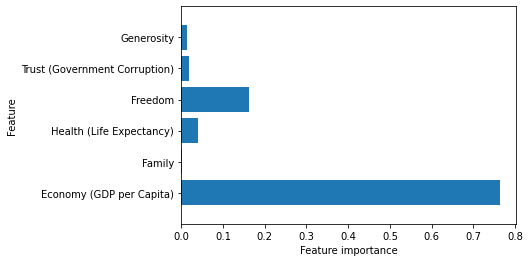

In [83]:
#feature importance
def plot_feature_importances(model):
    n_features = x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree2)

#### 6.Random Forest

In [84]:
#start timer
startTime = perf_counter()

print("-------------------------------")
print("Random Forest Regression: ")
print("-------------------------------")

forest = RandomForestRegressor(random_state=42,verbose=False)
forest.fit(X_train1, y_train1)

y_pred_forest_train1 = forest.predict(X_train1)
y_pred_forest_test1 = forest.predict(X_test1)

fullsmp_forest = forest.score(x, y)
print("Full sample R-squared:", fullsmp_forest)
print(" ")

#forest_pca2 = RandomForestRegressor(random_state=42,verbose=False)

# set up dictionary for grid search
param_grid_forest1 = {'max_depth':[2,3,4,5,6,8,10,15,20], 
                      'max_features':[2,4,6], 
                      'n_estimators':[80,100,150,200,250,300,350]}
score_used = 'r2' 

# set up cross-validation shuffles
#shuffle_split_forest1 = ShuffleSplit(test_size=0.20, n_splits=25)

#Using cross validation
#cv_forest = cross_val_score(forest, x, y, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
#cv_forest = cross_val_score(forest, X_test1, y_test1, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
#print("Test Score(Cross Validation):", cv_forest)

# 5 Kold cross-validation & set up search
grid_search_forest1 = GridSearchCV(forest, param_grid_forest1, cv=5, scoring=score_used, return_train_score=True, n_jobs=1)
#grid_search_forest1 = GridSearchCV(forest, param_grid_forest1, cv=cv_forest, scoring=score_used, return_train_score=True, n_jobs=1)

# implement search
grid_search_forest1.fit(x, y)

# move results into DataFrame
table_forest = pd.DataFrame(grid_search_forest1.cv_results_)
display(table_forest)

#end timer
endTime = perf_counter()
time6 = endTime-startTime
print("Total time:", time6)

-------------------------------
Random Forest Regression: 
-------------------------------
Full sample R-squared: 0.9398700471104194
 


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.193129      0.099252         0.012446        0.004301   
1         0.160622      0.013976         0.011966        0.003155   
2         0.209022      0.010557         0.013777        0.001710   
3         0.372186      0.107451         0.032519        0.022869   
4         0.434834      0.152784         0.022939        0.002096   
..             ...           ...              ...             ...   
184       0.616737      0.140864         0.025732        0.006160   
185       0.838550      0.232009         0.035899        0.017530   
186       1.074912      0.199716         0.049268        0.027915   
187       1.082093      0.175781         0.042306        0.010420   
188       1.287147      0.198686         0.043303        0.004057   

    param_max_depth param_max_features param_n_estimators  \
0                 2                  2                 80   
1                 2                  2                100   
2                 2                  2                150   
3                 2                  2                200   
4                 2                  2                250   
..              ...                ...                ...   
184              20                  6                150   
185              20                  6                200   
186              20                  6                250   
187              20                  6                300   
188              20                  6                350   

                                                        params  \
0      {'max_depth': 2, 'max_features': 2, 'n_estimators': 80}   
1     {'max_depth': 2, 'max_features': 2, 'n_estimators': 100}   
2     {'max_depth': 2, 'max_features': 2, 'n_estimators': 150}   
3     {'max_depth': 2, 'max_features': 2, 'n_estimators': 200}   
4     {'max_depth': 2, 'max_features': 2, 'n_estimators': 250}   
..                                                         ...   
184  {'max_depth': 20, 'max_features': 6, 'n_estimators': 150}   
185  {'max_depth': 20, 'max_features': 6, 'n_estimators': 200}   
186  {'max_depth': 20, 'max_features': 6, 'n_estimators': 250}   
187  {'max_depth': 20, 'max_features': 6, 'n_estimators': 300}   
188  {'max_depth': 20, 'max_features': 6, 'n_estimators': 350}   

     split0_test_score  split1_test_score  ...  mean_test_score  \
0             0.695332           0.608691  ...         0.687836   
1             0.696000           0.615721  ...         0.690210   
2             0.693039           0.612747  ...         0.687709   
3             0.692055           0.602518  ...         0.684619   
4             0.694494           0.591016  ...         0.684022   
..                 ...                ...  ...              ...   
184           0.789105           0.742999  ...         0.783716   
185           0.787439           0.743173  ...         0.782997   
186           0.787322           0.739029  ...         0.782229   
187           0.787276           0.738474  ...         0.782121   
188           0.786876           0.737856  ...         0.781988   

     std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0          0.043769              184            0.737927            0.748184   
1          0.041908              183            0.739116            0.749382   
2          0.042336              185            0.738005            0.748132   
3          0.045457              186            0.737355            0.748863   
4          0.050935              188            0.738451            0.751366   
..              ...              ...                 ...                 ...   
184        0.076771               54            0.975494            0.973725   
185        0.076135               64            0.975635            0.974324   
186        0.075958               75            0.975640            0.974465   
187        0.075493               78         

Total time: 601.3539395


In [85]:
table_forest1 = table_forest[['param_max_depth', 'param_max_features', 'param_n_estimators', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
table_forest1.index += 1
table_forest1 = table_forest1.sort_values(["rank_test_score"], ascending=True)
display(table_forest1)

print('---- optimal parameters ----')
print(grid_search_forest1.best_params_)

print('---- best accuracy ----')
print(grid_search_forest1.best_score_)

param_max_depth param_max_features param_n_estimators  mean_train_score  \
152              15                  2                250          0.974508   
151              15                  2                200          0.974300   
150              15                  2                150          0.973842   
153              15                  2                300          0.974529   
154              15                  2                350          0.974479   
..              ...                ...                ...               ...   
3                 2                  2                150          0.735060   
4                 2                  2                200          0.734595   
6                 2                  2                300          0.736389   
5                 2                  2                250          0.736590   
7                 2                  2                350          0.735397   

     mean_test_score  rank_test_score  
152         0.799087                1  
151         0.798652                2  
150         0.798106                3  
153         0.797803                4  
154         0.797074                5  
..               ...              ...  
3           0.687709              185  
4           0.684619              186  
6           0.684483              187  
5           0.684022              188  
7           0.683290              189  

[189 rows x 6 columns]

---- optimal parameters ----
{'max_depth': 15, 'max_features': 2, 'n_estimators': 250}
---- best accuracy ----
0.7990870071378995


In [86]:
mse_forest = mean_squared_error(y_test1, y_pred_forest_test1)
r2_forest = r2_score(y_test1, y_pred_forest_test1)
print('Mean squared error (MSE): %.4f' % mse_forest)
print('Coefficient of determination (R^2): %.4f' % r2_forest)
print(" ")
print('Train Set：')
regressionSummary(y_train1, y_pred_forest_train1)
print(" ")
print('Test Set：')
regressionSummary(y_test1, y_pred_forest_test1)

me_forest = round(np.mean(y_test1 - y_pred_forest_test1), 4)
rmse_forest = round(np.sqrt(metrics.mean_squared_error(y_test1, y_pred_forest_test1)), 4)
mae_forest = round(metrics.mean_absolute_error(y_test1, y_pred_forest_test1), 4)

Mean squared error (MSE): 0.2677
Coefficient of determination (R^2): 0.7915
 
Train Set：

Regression statistics

                      Mean Error (ME) : 0.0018
       Root Mean Squared Error (RMSE) : 0.1848
            Mean Absolute Error (MAE) : 0.1402
          Mean Percentage Error (MPE) : -0.3323
Mean Absolute Percentage Error (MAPE) : 2.7821
 
Test Set：

Regression statistics

                      Mean Error (ME) : 0.0320
       Root Mean Squared Error (RMSE) : 0.5174
            Mean Absolute Error (MAE) : 0.4118
          Mean Percentage Error (MPE) : -0.6130
Mean Absolute Percentage Error (MAPE) : 8.2682


In [87]:
# choose the best parameter with cross-validation
forest2 = RandomForestRegressor(max_depth = 15, max_features = 2, n_estimators = 250, random_state=42)
forest2.fit(X_train1, y_train1)

cv_forest2 = cross_validate(forest2, x, y, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2', return_train_score=True)
forest2_train = np.mean(cv_forest2['train_score'])
forest2_test = np.mean(cv_forest2['test_score'])

print('Train Score',"{:.4%}".format(forest2_train))
print('Test Score',"{:.4%}".format(forest2_test))

Train Score 97.4697%
Test Score 81.2880%


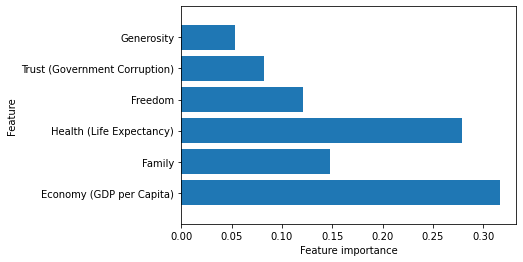

In [88]:
#feature importance
def plot_feature_importances(model):
    n_features = x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(forest2)

#### 7.Gradient Boosting

In [89]:
#start timer
startTime = perf_counter()

print("-------------------------------")
print("Gradient Boosting Regression: ")
print("-------------------------------")

gbc = GradientBoostingRegressor(verbose=False)
gbc.fit(X_train1, y_train1)

y_pred_gbc_train1 = gbc.predict(X_train1)
y_pred_gbc_test1 = gbc.predict(X_test1)

fullsmp_gbc = gbc.score(x, y)
print("Full sample R-squared:", fullsmp_gbc)
print(" ")

#gbc_pca1 = GradientBoostingRegressor(verbose=False)

# set up dictionary for grid search
param_grid_gbc1 = {'max_depth':[2,3,4,5,6,8,10,15,20], 
                   'max_features':[2,4,6], 
                   'n_estimators':[80,100,150,200,250,300,350],
                   'learning_rate': [0.06, 0.08, 0.1, 0.25, 0.6]}
score_used = 'r2' 

# set up cross-validation shuffles
#shuffle_split_gbc1 = ShuffleSplit(n_splits=100, test_size=0.20)

#Using cross validation
#cv_gbc_pca = cross_val_score(gbc_pca, Xpca, yPCA, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
#cv_gbc_pca = cross_val_score(gbc_pca, X_test2, y_test2, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
#print("Test Score(Cross Validation):", cv_gbc_pca)

# 5 Kold cross-validation & set up search
grid_search_gbc1 = GridSearchCV(gbc, param_grid_gbc1, cv=5, scoring=score_used, return_train_score=True, n_jobs=1)
#grid_search_gbc1 = GridSearchCV(gbc, param_grid_gbc1, cv=cv_gbc_pca, scoring=score_used, return_train_score=True, n_jobs=1)

# implement search
grid_search_gbc1.fit(x, y)

# move results into DataFrame
table_gbc = pd.DataFrame(grid_search_gbc1.cv_results_)
display(table_gbc)

#end timer
endTime = perf_counter()
time7 = endTime-startTime
print("Total time:", time7)

-------------------------------
Gradient Boosting Regression: 
-------------------------------
Full sample R-squared: 0.8943717882410424
 


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.128982      0.051748         0.008179        0.005930   
1         0.164043      0.035864         0.011768        0.012107   
2         0.181133      0.046256         0.007579        0.002325   
3         0.224127      0.025357         0.007417        0.003789   
4         0.297109      0.035461         0.006583        0.000489   
..             ...           ...              ...             ...   
940       0.242746      0.086698         0.004785        0.001712   
941       0.203662      0.024172         0.003995        0.001560   
942       0.212851      0.023554         0.004781        0.001819   
943       0.393147      0.155298         0.012167        0.014906   
944       0.288431      0.019681         0.004587        0.001353   

    param_learning_rate param_max_depth param_max_features param_n_estimators  \
0                  0.06               2                  2                 80   
1                  0.06               2                  2                100   
2                  0.06               2                  2                150   
3                  0.06               2                  2                200   
4                  0.06               2                  2                250   
..                  ...             ...                ...                ...   
940                 0.6              20                  6                150   
941                 0.6              20                  6                200   
942                 0.6              20                  6                250   
943                 0.6              20                  6                300   
944                 0.6              20                  6                350   

                                                                              params  \
0     {'learning_rate': 0.06, 'max_depth': 2, 'max_features': 2, 'n_estimators': 80}   
1    {'learning_rate': 0.06, 'max_depth': 2, 'max_features': 2, 'n_estimators': 100}   
2    {'learning_rate': 0.06, 'max_depth': 2, 'max_features': 2, 'n_estimators': 150}   
3    {'learning_rate': 0.06, 'max_depth': 2, 'max_features': 2, 'n_estimators': 200}   
4    {'learning_rate': 0.06, 'max_depth': 2, 'max_features': 2, 'n_estimators': 250}   
..                                                                               ...   
940  {'learning_rate': 0.6, 'max_depth': 20, 'max_features': 6, 'n_estimators': 150}   
941  {'learning_rate': 0.6, 'max_depth': 20, 'max_features': 6, 'n_estimators': 200}   
942  {'learning_rate': 0.6, 'max_depth': 20, 'max_features': 6, 'n_estimators': 250}   
943  {'learning_rate': 0.6, 'max_depth': 20, 'max_features': 6, 'n_estimators': 300}   
944  {'learning_rate': 0.6, 'max_depth': 20, 'max_features': 6, 'n_estimators': 350}   

     split0_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0             0.762945  ...         0.758364        0.058408              320   
1             0.760865  ...         0.749727        0.068097              444   
2             0.773451  ...         0.749930        0.074342              443   
3             0.767416  ...         0.745788        0.079071              493   
4             0.772302  ...         0.744108        0.083583              523   
..                 ...  ...              ...             ...              ...   
940           0.609712  ...         0.595241        0.107978              945   
941           0.617075  ...         0.619278        0.096965              933   
942           0.616418  ...         0.612407        0.099273              938   
943           0.610166  ...         0.606665        0.094014              943   
944           0.596666  ...         0.611923        0.115779              939   

     split0_train_score  split1_train_score  split2_train_score  \
0              0.841919            0.852193            0.830552   
1              0.850936            0.85

Total time: 2046.6967550999998


In [90]:
table_gbc1 = table_gbc[['param_max_depth', 'param_max_features', 'param_n_estimators', 'param_learning_rate', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
table_gbc1.index += 1
table_gbc1 = table_gbc1.sort_values(["rank_test_score"], ascending=True)
display(table_gbc1)

print('---- optimal parameters ----')
print(grid_search_gbc1.best_params_)

print('---- best accuracy ----')
print(grid_search_gbc1.best_score_)

param_max_depth param_max_features param_n_estimators param_learning_rate  \
174              20                  2                300                0.06   
341              15                  2                250                0.08   
362              20                  2                250                0.08   
172              20                  2                200                0.06   
127              10                  2                 80                0.06   
..              ...                ...                ...                 ...   
770               2                  4                350                 0.6   
939              20                  6                 80                 0.6   
944              20                  6                300                 0.6   
940              20                  6                100                 0.6   
941              20                  6                150                 0.6   

     mean_train_score  mean_test_score  rank_test_score  
174          1.000000         0.799647                1  
341          1.000000         0.796540                2  
362          1.000000         0.796411                3  
172          1.000000         0.795196                4  
127          0.999802         0.794439                5  
..                ...              ...              ...  
770          0.996998         0.607480              941  
939          1.000000         0.607340              942  
944          1.000000         0.606665              943  
940          1.000000         0.601114              944  
941          1.000000         0.595241              945  

[945 rows x 7 columns]

---- optimal parameters ----
{'learning_rate': 0.06, 'max_depth': 20, 'max_features': 2, 'n_estimators': 300}
---- best accuracy ----
0.7996465800940988


In [91]:
mse_gbc = mean_squared_error(y_test1, y_pred_gbc_test1)
r2_gbc = r2_score(y_test1, y_pred_gbc_test1)
print('Mean squared error (MSE): %.4f' % mse_gbc)
print('Coefficient of determination (R^2): %.4f' % r2_gbc)
print(" ")

print('Train Set：')
regressionSummary(y_train1, y_pred_gbc_train1)
print(" ")
print('Test Set：')
regressionSummary(y_test1, y_pred_gbc_test1)

me_gbc = round(np.mean(y_test1 - y_pred_gbc_test1), 4)
rmse_gbc = round(np.sqrt(metrics.mean_squared_error(y_test1, y_pred_gbc_test1)), 4)
mae_gbc = round(metrics.mean_absolute_error(y_test1, y_pred_gbc_test1), 4)

Mean squared error (MSE): 0.2931
Coefficient of determination (R^2): 0.7716
 
Train Set：

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.3233
            Mean Absolute Error (MAE) : 0.2509
          Mean Percentage Error (MPE) : -0.6004
Mean Absolute Percentage Error (MAPE) : 4.8738
 
Test Set：

Regression statistics

                      Mean Error (ME) : 0.0394
       Root Mean Squared Error (RMSE) : 0.5414
            Mean Absolute Error (MAE) : 0.4274
          Mean Percentage Error (MPE) : -0.5170
Mean Absolute Percentage Error (MAPE) : 8.6189


In [92]:
# choose the best parameter with cross-validation
gbc2 = GradientBoostingRegressor(max_depth = 20, max_features = 2, n_estimators = 300, learning_rate = 0.06, random_state=42, verbose=False)
gbc2.fit(X_train1, y_train1)

cv_gbc2 = cross_validate(gbc2, x, y, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2', return_train_score=True)
gbc2_train = np.mean(cv_gbc2['train_score'])
gbc2_test = np.mean(cv_gbc2['test_score'])

print('Train Score',"{:.4%}".format(gbc2_train))
print('Test Score',"{:.4%}".format(gbc2_test))

Train Score 100.0000%
Test Score 81.0562%


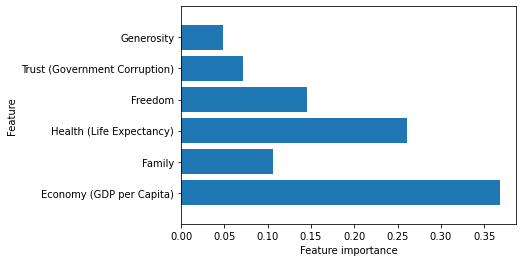

In [93]:
#feature importance
def plot_feature_importances(model):
    n_features = x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(gbc2)

## Modeling by using PCA

In [94]:
#after pca split:
# x and y value using PCA
PCA_features = ['pca1','pca2']
Xpca = whrPCA[PCA_features]
#Xpca = whrPCA[PCA_features].drop(['Happiness Score', 'New Happiness Score'], axis=1)
yPCA = whrPCA["Happiness Score"]

In [95]:
#Split the data into 80% training and 20% testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xpca, yPCA, test_size=0.2, random_state=42)

#### OLS Regression model

In [96]:
# fit OLS Regression model
results = sm.OLS(yPCA, Xpca).fit()
#results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Happiness Score   R-squared (uncentered):                   0.034
Model:                            OLS   Adj. R-squared (uncentered):              0.031
Method:                 Least Squares   F-statistic:                              12.72
Date:                Fri, 07 May 2021   Prob (F-statistic):                    3.72e-06
Time:                        18:02:13   Log-Likelihood:                         -2259.9
No. Observations:                 727   AIC:                                      4524.
Df Residuals:                     725   BIC:                                      4533.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pca1          -1.0115      0.201     -5.024      0.000      -1.407      -0.616
pca2          -0.0908      0.201     -0.451      0.652      -0.486       0.304
==============================================================================
Omnibus:                       20.869   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.604
Skew:                          -0.322   Prob(JB):                     2.76e-06
Kurtosis:                       3.656   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 1. Linear Regression model

In [97]:
##this is for train test split after pca 

#start timer
startTime = perf_counter()

lr_pca = LinearRegression()
lr_pca.fit(X_train2, y_train2)

print("-------------------------------")
print("Linear Regression(PCA): ")
print("-------------------------------")

fullsmp_lr_pca = lr_pca.score(Xpca, yPCA)
print("Full sample R-squared:", fullsmp_lr_pca)

y_pred_lr_train2 = lr_pca.predict(X_train2)
y_pred_lr_test2 = lr_pca.predict(X_test2)

lr_trainScore2 = lr_pca.score(X_train2, y_train2)
lr_testScore2 = lr_pca.score(X_test2, y_test2)
print("Train Score:", lr_trainScore2)
print("Test Score:", lr_testScore2)

#Using cross validation
cv_lr_pca = cross_val_score(lr_pca, Xpca, yPCA, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2').mean()
#cv_lr = cross_val_score(lr_pca, X_test, y_test, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2').mean()
print("Test Score(Cross Validation):", cv_lr_pca)
print(" ")

print('Coefficients:', lr_pca.coef_)
print('Intercept:', lr_pca.intercept_)
 
mse_lr_pca = mean_squared_error(y_test2, y_pred_lr_test2)
r2_lr_pca = r2_score(y_test2, y_pred_lr_test2)
print('Mean squared error (MSE): %.4f' % mse_lr_pca)
print('Coefficient of determination (R^2): %.4f' % r2_lr_pca)
print(" ")

print('Train Set：')
regressionSummary(y_train2, y_pred_lr_train2)
print(" ")
print('Test Set：')
regressionSummary(y_test2, y_pred_lr_test2)

me_lr_pca = round(np.mean(y_test2 - y_pred_lr_test2), 4)
rmse_lr_pca = round(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_lr_test2)), 4)
mae_lr_pca = round(metrics.mean_absolute_error(y_test2, y_pred_lr_test2), 4)

#end timer
endTime = perf_counter()
time8 = endTime-startTime
print("Total time:", time8)

-------------------------------
Linear Regression(PCA): 
-------------------------------
Full sample R-squared: 0.7638284872796559
Train Score: 0.7721526953146008
Test Score: 0.7285843397979896
Test Score(Cross Validation): 0.758623895019698
 
Coefficients: [-1.00511789 -0.0724527 ]
Intercept: 5.388737710272591
Mean squared error (MSE): 0.3484
Coefficient of determination (R^2): 0.7286
 
Train Set：

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.5575
            Mean Absolute Error (MAE) : 0.4293
          Mean Percentage Error (MPE) : -1.1689
Mean Absolute Percentage Error (MAPE) : 8.4748
 
Test Set：

Regression statistics

                      Mean Error (ME) : -0.0036
       Root Mean Squared Error (RMSE) : 0.5902
            Mean Absolute Error (MAE) : 0.4574
          Mean Percentage Error (MPE) : -1.6936
Mean Absolute Percentage Error (MAPE) : 9.4683
Total time: 1.727205099999992


In [98]:
# with cross-validation
lr_pca2 = LinearRegression()
lr_pca2.fit(X_train2, y_train2)

cv_lr_pca2 = cross_validate(lr_pca2, Xpca, yPCA, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2', return_train_score=True)
lr_pca2_train = np.mean(cv_lr_pca2['train_score'])
lr_pca2_test = np.mean(cv_lr_pca2['test_score'])

print('Train Score',"{:.4%}".format(lr_pca2_train))
print('Test Score',"{:.4%}".format(lr_pca2_test))

Train Score 76.4186%
Test Score 75.9289%


#### 2. Ridge Regression model

In [99]:
##this is for train test split after pca 

#start timer
startTime = perf_counter()

#ridge_pca = Ridge(alpha=alpha_ridge)
alpha_ridge = np.arange(start=0.05,stop=10.0,step=0.1)
length_ridge2 = len(alpha_ridge)
ridge_trainScore2 = []
ridge_testScore2 = []
#training_score2 = []
#test_score2 = []
#coef2 = []

for i in range(length_ridge2):
    ridge_pca = Ridge(alpha=alpha_ridge[i])
    ridge_pca.fit(X_train2, y_train2)
    y_pred_ridge_train2 = ridge_pca.predict(X_train2)
    y_pred_ridge_test2 = ridge_pca.predict(X_test2)
    #Using cross validation
    cv_ridge_pca = cross_val_score(ridge_pca, Xpca, yPCA, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
    #cv_ridge_pca = cross_val_score(ridge_pca, X_test2, y_test2, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
    #ridge_trainScore = ridge_pca.score(X_train2, y_train2)
    #ridge_testScore = ridge_pca.score(X_test2, y_test2)
    
    #store train accuracy
    ridge_trainScore2.append(ridge_pca.score(X_train2, y_train2))
    #training_score2.append(np.mean(ridge_trainScore2))
    #store test accuracy
    ridge_testScore2.append(ridge_pca.score(X_test2, y_test2))
    #test_score2.append(np.mean(ridge_testScore2))
    #coef2.append(ridge_pca.coef_)


print("-------------------------------")
print("Ridge Regression(PCA): ")
print("-------------------------------")

fullsmp_ridge_pca = ridge_pca.score(Xpca, yPCA)
print("Full sample R-squared:", fullsmp_ridge_pca)
print(" ")

dataframe_ridge2 = {'Alpha': alpha_ridge,
                       'Train Set Score': ridge_trainScore2,
                       'Test Set Score': ridge_testScore2,
                       "Test Score(Cross Validation)" : cv_ridge_pca}
 
table_ridge_pca = pd.DataFrame(dataframe_ridge2)
table_ridge_pca.index += 1
table_ridge_pca = table_ridge_pca.sort_values(["Test Score(Cross Validation)","Test Set Score"], ascending=[False,False])
#table_ridge_pca = table_ridge_pca.sort_values("Test Set Score", ascending=False)
#table_ridge_pca = table_ridge_pca.sort_values(["Test Score(Cross Validation)"], ascending=False)
display(table_ridge_pca)

#ridge_trainScore2 = ridge_trainScore2.mean()
#ridge_testScore2 = ridge_testScore2.mean()

#print("Train Score:", ridge_trainScore2)
#print("Test Score:", ridge_testScore2)
print(" ")
print('Coefficients:', ridge_pca.coef_)
print('Intercept:', ridge_pca.intercept_)

mse_ridge_pca = mean_squared_error(y_test2, y_pred_ridge_test2)
r2_ridge_pca = r2_score(y_test2, y_pred_ridge_test2)
print('Mean squared error (MSE): %.4f' % mse_ridge_pca)
print('Coefficient of determination (R^2): %.4f' % r2_ridge_pca)
print(" ")

print('Train Set：')
regressionSummary(y_train2, y_pred_ridge_train2)
print(" ")
print('Test Set：')
regressionSummary(y_test2, y_pred_ridge_test2)

me_ridge_pca = round(np.mean(y_test2 - y_pred_ridge_test2), 4)
rmse_ridge_pca = round(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_ridge_test2)), 4)
mae_ridge_pca = round(metrics.mean_absolute_error(y_test2, y_pred_ridge_test2), 4)

#end timer
endTime = perf_counter()
time9 = endTime-startTime
print("Total time:", time9)

-------------------------------
Ridge Regression(PCA): 
-------------------------------
Full sample R-squared: 0.7634469752866803
 


Alpha  Train Set Score  Test Set Score  Test Score(Cross Validation)
67   6.65         0.772061        0.727862                      0.824723
47   4.65         0.772107        0.728094                      0.813232
86   8.55         0.772002        0.727629                      0.812696
51   5.05         0.772099        0.728049                      0.809115
37   3.65         0.772125        0.728206                      0.807119
..    ...              ...             ...                           ...
15   1.45         0.772148        0.728439                      0.708836
19   1.85         0.772145        0.728398                      0.706667
96   9.55         0.771965        0.727503                      0.700426
89   8.85         0.771991        0.727592                      0.676914
44   4.35         0.772113        0.728128                      0.672861

[100 rows x 4 columns]

 
Coefficients: [-0.98878088 -0.07139333]
Intercept: 5.388781562195789
Mean squared error (MSE): 0.3498
Coefficient of determination (R^2): 0.7275
 
Train Set：

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.5577
            Mean Absolute Error (MAE) : 0.4308
          Mean Percentage Error (MPE) : -1.2348
Mean Absolute Percentage Error (MAPE) : 8.5017
 
Test Set：

Regression statistics

                      Mean Error (ME) : -0.0038
       Root Mean Squared Error (RMSE) : 0.5915
            Mean Absolute Error (MAE) : 0.4608
          Mean Percentage Error (MPE) : -1.7508
Mean Absolute Percentage Error (MAPE) : 9.5392
Total time: 68.72791569999981


In [100]:
# choose the best parameter with cross-validation
ridge_pca2 = Ridge(alpha = 6.65)
ridge_pca2.fit(X_train2, y_train2)

cv_ridge_pca2 = cross_validate(ridge_pca2, Xpca, yPCA, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2', return_train_score=True)
ridge_pca2_train = np.mean(cv_ridge_pca2['train_score'])
ridge_pca2_test = np.mean(cv_ridge_pca2['test_score'])

print('Train Score',"{:.4%}".format(ridge_pca2_train))
print('Test Score',"{:.4%}".format(ridge_pca2_test))

Train Score 76.4661%
Test Score 75.6776%


#### 3. Lasso Regression model

In [101]:
##this is for train test split after pca 

#start timer
startTime = perf_counter()

#lasso_pca = Lasso(alpha=alpha_lasso)

alpha_lasso = np.arange(start=0.0001, stop=0.0101, step=0.0001)
length_lasso2 = len(alpha_lasso)
lasso_trainScore2 = []
lasso_testScore2 = []
#training_score2 = []
#test_score2 = []
#coef2 = []

for i in range(length_lasso2):
    lasso_pca = Lasso(alpha=alpha_lasso[i])
    lasso_pca.fit(X_train2, y_train2)
    y_pred_lasso_train2 = lasso_pca.predict(X_train2)
    y_pred_lasso_test2 = lasso_pca.predict(X_test2)
    #Using cross validation
    cv_lasso_pca = cross_val_score(lasso_pca, Xpca, yPCA, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
    #cv_lasso_pca = cross_val_score(lasso_pca, X_test2, y_test2, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
    
    #lasso_trainScore2 = lasso_pca.score(X_train2, y_train2)
    #lasso_testScore2 = lasso_pca.score(X_test2, y_test2)
    
    #store train accuracy
    lasso_trainScore2.append(lasso_pca.score(X_train2, y_train2))
    #training_score2.append(np.mean(ridge_trainScore))
    #store test accuracy
    lasso_testScore2.append(lasso_pca.score(X_test2, y_test2))
    #test_score2.append(np.mean(ridge_testScore2))
    #coef2.append(ridge_pca.coef_)


print("-------------------------------")
print("Lasso Regression(PCA): ")
print("-------------------------------")

fullsmp_lasso_pca = lasso_pca.score(Xpca, yPCA)
print("Full sample R-squared:", fullsmp_lasso_pca)
print(" ")

dataframe_lasso2 = {'Alpha': alpha_lasso,
                       'Train Set Score': lasso_trainScore2,
                       'Test Set Score': lasso_testScore2,
                       "Test Score(Cross Validation)" : cv_lasso_pca}
 
table_lasso_pca = pd.DataFrame(dataframe_lasso2)
table_lasso_pca.index += 1
table_lasso_pca = table_lasso_pca.sort_values(["Test Score(Cross Validation)","Test Set Score"], ascending=[False,False])
#table_lasso_pca = table_lasso_pca.sort_values("Test Set Score", ascending=False)
#table_lasso_pca = table_lasso_pca.sort_values(["Test Score(Cross Validation)"], ascending=False)
display(table_lasso_pca)

#lasso_trainScore2 = lasso_trainScore2.mean()
#lasso_testScore2 = lasso_testScore2.mean()
#print("Train Score:", lasso_trainScore2)
#print("Test Score:", lasso_testScore2)
print(" ")

print('Coefficients:', lasso_pca.coef_)
print('Intercept:', lasso_pca.intercept_)

mse_lasso_pca = mean_squared_error(y_test2, y_pred_lasso_test2)
r2_lasso_pca = r2_score(y_test2, y_pred_lasso_test2)
print('Mean squared error (MSE): %.4f' % mse_lasso_pca)
print('Coefficient of determination (R^2): %.4f' % r2_lasso_pca)
print(" ")

print('Train Set：')
regressionSummary(y_train2, y_pred_lasso_train2)
print(" ")
print('Test Set：')
regressionSummary(y_test2, y_pred_lasso_test2)

me_lasso_pca = round(np.mean(y_test2 - y_pred_lasso_test2), 4)
rmse_lasso_pca = round(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_lasso_test2)), 4)
mae_lasso_pca = round(metrics.mean_absolute_error(y_test2, y_pred_lasso_test2), 4)

#end timer
endTime = perf_counter()
time10 = endTime-startTime
print("Total time:", time10)

-------------------------------
Lasso Regression(PCA): 
-------------------------------
Full sample R-squared: 0.7633327096301918
 


Alpha  Train Set Score  Test Set Score  Test Score(Cross Validation)
77  0.0077         0.772068        0.727073                      0.830376
54  0.0054         0.772111        0.727540                      0.827474
45  0.0045         0.772124        0.727719                      0.816906
43  0.0043         0.772126        0.727759                      0.815545
72  0.0072         0.772079        0.727176                      0.810564
..     ...              ...             ...                           ...
40  0.0040         0.772130        0.727818                      0.701050
66  0.0066         0.772091        0.727298                      0.690916
31  0.0031         0.772139        0.727994                      0.686576
26  0.0026         0.772143        0.728091                      0.676340
20  0.0020         0.772147        0.728206                      0.673214

[100 rows x 4 columns]

 
Coefficients: [-0.99555259 -0.06264648]
Intercept: 5.388795730380936
Mean squared error (MSE): 0.3509
Coefficient of determination (R^2): 0.7266
 
Train Set：

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.5576
            Mean Absolute Error (MAE) : 0.4297
          Mean Percentage Error (MPE) : -1.2142
Mean Absolute Percentage Error (MAPE) : 8.4847
 
Test Set：

Regression statistics

                      Mean Error (ME) : -0.0039
       Root Mean Squared Error (RMSE) : 0.5924
            Mean Absolute Error (MAE) : 0.4607
          Mean Percentage Error (MPE) : -1.7382
Mean Absolute Percentage Error (MAPE) : 9.5415
Total time: 69.45345559999987


In [102]:
# choose the best parameter with cross-validation
lasso_pca2 = Lasso(alpha = 0.0077)
lasso_pca2.fit(X_train2, y_train2)

cv_lasso_pca2 = cross_validate(lasso_pca2, Xpca, yPCA, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2', return_train_score=True)
lasso_pca2_train = np.mean(cv_lasso_pca2['train_score'])
lasso_pca2_test = np.mean(cv_lasso_pca2['test_score'])

print('Train Score',"{:.4%}".format(lasso_pca2_train))
print('Test Score',"{:.4%}".format(lasso_pca2_test))

Train Score 76.3750%
Test Score 76.0931%


#### 4. KNN model

In [103]:
##this is for train test split after pca

#start timer
startTime = perf_counter()

#knn_pca = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
#nmc = 100
#shuffle = ShuffleSplit(n_splits = nmc)

kList = np.arange(start=1, stop=101, step=1)
knn_trainScore2 = []
knn_testScore2 = []
cv_knnlst2 = []
#training_accuracy2 = []
#test_accuracy2 = []

for k in kList:
    knn_pca = KNeighborsRegressor(n_neighbors=k)
    knn_pca.fit(X_train2,y_train2)
    y_pred_knn_train2 = knn_pca.predict(X_train2)
    y_pred_knn_test2 = knn_pca.predict(X_test2)
    #Using cross validation
    cv_knn_pca = cross_val_score(knn_pca, Xpca, yPCA, cv=ShuffleSplit(n_splits=100, test_size=0.20), scoring = 'r2')
    #cv_knn_pca = cross_val_score(knn_pca, X_test, y_test, cv=ShuffleSplit(n_splits=100, test_size=0.20), scoring = 'r2')
    cv_knnlst2.append(cv_knn_pca)
    #knn_trainScore2 = knn_pca.score(X_train2, y_train2)
    #knn_testScore2 = knn_pca.score(X_test2, y_test2)
    
    # record train accuracy
    knn_trainScore2.append(knn_pca.score(X_train2, y_train2))
    #training_accuracy.append(knn_trainScore)
    # record test accuracy
    knn_testScore2.append(knn_pca.score(X_test2, y_test2))
    #test_accuracy.append(knn_testScore)

print("-------------------------------")
print("K Nearest Neighbors Regression(PCA): ")
print("-------------------------------")

fullsmp_knn_pca = knn_pca.score(Xpca, yPCA)
print("Full sample R-squared:", fullsmp_knn_pca)

#Using cross validation
#print("Test Score(Cross Validation):", cv_knn_pca)
print(" ")

dataframe_knn2 = {'Neighbor Sizes': kList,
             'Train Set Score': knn_trainScore2,
             'Test Set Score': knn_testScore2,
              "Test Score(Cross Validation)": cv_knn_pca}
 
table_knn_pca = pd.DataFrame(dataframe_knn2)
table_knn_pca = table_knn_pca.set_index('Neighbor Sizes')
#table_knn_pca = table_knn_pca.sort_values(["Test Score(Cross Validation)","Test Set Score"], ascending=[False,False])
#table_knn_pca = table_knn_pca.sort_values("Test Set Score", ascending=False)
table_knn_pca = table_knn_pca.sort_values(["Test Score(Cross Validation)"], ascending=False)
display(table_knn_pca)

#knn_trainScore2 = knn_trainScore2.mean()
#knn_testScore2 = knn_testScore2.mean()
#print("Train Score:", knn_trainScore2)
#print("Test Score:", knn_testScore2)
print(" ")

mse_knn_pca = mean_squared_error(y_test2, y_pred_knn_test2)
r2_knn_pca = r2_score(y_test2, y_pred_knn_test2)
print('Mean squared error (MSE): %.4f' % mse_knn_pca)
print('Coefficient of determination (R^2): %.4f' % r2_knn_pca)
print(" ")

print('Train Set：')
regressionSummary(y_train2, y_pred_knn_train2)
print(" ")
print('Test Set：')
regressionSummary(y_test2, y_pred_knn_test2)

me_knn_pca = round(np.mean(y_test2 - y_pred_knn_test2), 4)
rmse_knn_pca = round(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_knn_test2)), 4)
mae_knn_pca = round(metrics.mean_absolute_error(y_test2, y_pred_knn_test2), 4)

#regression_report(y_test2, y_pred_knn_test2)

#end timer
endTime = perf_counter()
time11 = endTime-startTime
print("Total time:", time11)

-------------------------------
K Nearest Neighbors Regression(PCA): 
-------------------------------
Full sample R-squared: 0.744296613545314
 


Train Set Score  Test Set Score  Test Score(Cross Validation)
Neighbor Sizes                                                               
97                     0.752715        0.714322                      0.810403
77                     0.762869        0.725387                      0.792770
21                     0.794341        0.753513                      0.788472
94                     0.754524        0.717268                      0.781383
57                     0.772654        0.735127                      0.780983
...                         ...             ...                           ...
71                     0.765079        0.729602                      0.695539
62                     0.769360        0.732714                      0.691155
12                     0.810531        0.746646                      0.688183
64                     0.768195        0.732048                      0.675777
75                     0.763700        0.726380                      0.667687

[100 rows x 3 columns]

 
Mean squared error (MSE): 0.3681
Coefficient of determination (R^2): 0.7132
 
Train Set：

Regression statistics

                      Mean Error (ME) : -0.0215
       Root Mean Squared Error (RMSE) : 0.5820
            Mean Absolute Error (MAE) : 0.4652
          Mean Percentage Error (MPE) : -2.2317
Mean Absolute Percentage Error (MAPE) : 9.3779
 
Test Set：

Regression statistics

                      Mean Error (ME) : -0.0011
       Root Mean Squared Error (RMSE) : 0.6067
            Mean Absolute Error (MAE) : 0.4885
          Mean Percentage Error (MPE) : -1.9227
Mean Absolute Percentage Error (MAPE) : 10.0144
Total time: 75.16248380000025


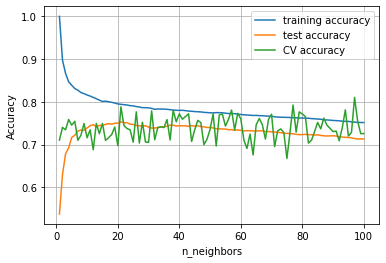

In [104]:
plt.plot(kList, knn_trainScore2, label="training accuracy") 
plt.plot(kList, knn_testScore2, label="test accuracy")
plt.plot(kList, cv_knn_pca, label="CV accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.grid()
plt.legend()
plt.show()

In [105]:
# choose the best parameter with cross-validation
knn_pca2 = KNeighborsRegressor(n_neighbors= 97)
knn_pca2.fit(X_train2, y_train2)

cv_knn_pca2 = cross_validate(knn_pca2, Xpca, yPCA, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2', return_train_score=True)
knn_pca2_train = np.mean(cv_knn_pca2['train_score'])
knn_pca2_test = np.mean(cv_knn_pca2['test_score'])

print('Train Score',"{:.4%}".format(knn_pca2_train))
print('Test Score',"{:.4%}".format(knn_pca2_test))

Train Score 74.7600%
Test Score 73.6903%


#### 5.Decision Tree

In [106]:
#start timer
startTime = perf_counter()

print("-------------------------------")
print("Decision Tree Regression(PCA): ")
print("-------------------------------")

tree_pca = DecisionTreeRegressor(random_state=42)
tree_pca.fit(X_train2, y_train2)

y_pred_tree_train2 = tree_pca.predict(X_train2)
y_pred_tree_test2 = tree_pca.predict(X_test2)
    
fullsmp_tree_pca = tree_pca.score(Xpca, yPCA)
print("Full sample R-squared:", fullsmp_tree_pca)
print(" ")

# set up dictionary for grid search
param_grid_tree2 = {'max_depth':[2,3,4,5,6,8,10,15,20],
                   'max_features':[1,2]}
score_used = 'r2' 

# set up cross-validation shuffles
#shuffle_split_tree2 = ShuffleSplit(test_size=0.20, n_splits=25)

#Using cross validation
#cv_tree_pca = cross_val_score(tree_pca, Xpca, yPCA, cv=10, scoring = 'r2')
#cv_tree_pca = cross_val_score(tree_pca, Xpca, yPCA, cv=ShuffleSplit(n_splits=100, test_size=0.20), scoring = 'r2')
#cv_tree_pca = cross_val_score(tree_pca, X_test2, y_test2, cv=ShuffleSplit(n_splits=100, test_size=0.20), scoring = 'r2')
#print("Test Score(Cross Validation):", cv_tree_pca)

# 5 Kold cross-validation & set up search
grid_search_tree2 = GridSearchCV(tree_pca, param_grid_tree2, cv=5, return_train_score=True, scoring=score_used, n_jobs=1)
#grid_search_tree2 = GridSearchCV(tree_pca, param_grid_tree2, cv=cv_tree_pca, scoring=score_used, return_train_score=True, n_jobs=1)

# implement search
grid_search_tree2.fit(Xpca, yPCA)

# move results into DataFrame
table_tree_pca = pd.DataFrame(grid_search_tree2.cv_results_)
display(table_tree_pca)


#end timer
endTime = perf_counter()
time12 = endTime-startTime
print("Total time:", time12)

-------------------------------
Decision Tree Regression(PCA): 
-------------------------------
Full sample R-squared: 0.9048650674696618
 


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.003385  1.007870e-03         0.002002        0.000014   
1        0.003192  7.464166e-04         0.001995        0.000631   
2        0.003191  3.987792e-04         0.001596        0.000489   
3        0.003591  7.987034e-04         0.002394        0.000489   
4        0.003583  4.825748e-04         0.002194        0.000746   
5        0.003391  7.977367e-04         0.001795        0.000746   
6        0.003798  7.461885e-04         0.001992        0.000634   
7        0.003193  3.999876e-04         0.001997        0.000011   
8        0.002996  8.389353e-06         0.001786        0.000749   
9        0.004189  7.467355e-04         0.002195        0.000398   
10       0.002991  2.611745e-07         0.001596        0.000488   
11       0.002998  1.211260e-05         0.001396        0.000488   
12       0.002798  7.451957e-04         0.001390        0.000483   
13       0.002988  5.479272e-06         0.001196        0.000400   
14       0.002590  4.904439e-04         0.001592        0.000486   
15       0.002999  1.289437e-05         0.001398        0.000492   
16       0.002594  4.890258e-04         0.001397        0.000492   
17       0.002792  7.462641e-04         0.001398        0.000488   

   param_max_depth param_max_features                                params  \
0                2                  1   {'max_depth': 2, 'max_features': 1}   
1                2                  2   {'max_depth': 2, 'max_features': 2}   
2                3                  1   {'max_depth': 3, 'max_features': 1}   
3                3                  2   {'max_depth': 3, 'max_features': 2}   
4                4                  1   {'max_depth': 4, 'max_features': 1}   
5                4                  2   {'max_depth': 4, 'max_features': 2}   
6                5                  1   {'max_depth': 5, 'max_features': 1}   
7                5                  2   {'max_depth': 5, 'max_features': 2}   
8                6                  1   {'max_depth': 6, 'max_features': 1}   
9                6                  2   {'max_depth': 6, 'max_features': 2}   
10               8                  1   {'max_depth': 8, 'max_features': 1}   
11               8                  2   {'max_depth': 8, 'max_features': 2}   
12              10                  1  {'max_depth': 10, 'max_features': 1}   
13              10                  2  {'max_depth': 10, 'max_features': 2}   
14              15                  1  {'max_depth': 15, 'max_features': 1}   
15              15                  2  {'max_depth': 15, 'max_features': 2}   
16              20                  1  {'max_depth': 20, 'max_features': 1}   
17              20                  2  {'max_depth': 20, 'max_features': 2}   

    split0_test_score  split1_test_score  split2_test_score  ...  \
0            0.708946           0.460460           0.699375  ...   
1            0.690114           0.595160           0.732680  ...   
2            0.717821           0.530773           0.732302  ...   
3            0.739936           0.611622           0.792810  ...   
4            0.732305           0.604987           0.783573  ...   
5            0.755031           0.619238           0.802994  ...   
6            0.748582           0.591071           0.783002  ...   
7            0.742449           0.583878           0.784995  ...   
8            0.693959           0.605447           0.736009  ...   
9            0.716458           0.532439           0.777443  ...   
10           0.699411           0.567207           0.732870  ...   
11           0.662244           0.489544           0.702762  ...   
12           0.652054           0.549536           0.701788  ...   
13           0.640209           0.396035           0.642959  ...   
14           0.597152           0.454068           0.606963  ...   
15           0.595905           0.346231           0.596415  ...   
16           0.615958           0.511163           0.

Total time: 0.6910399999997026


In [107]:
table_tree_pca1 = table_tree_pca[['param_max_depth', 'param_max_features', 'mean_train_score', 'mean_test_score','rank_test_score']]
table_tree_pca1.index += 1
table_tree_pca1 = table_tree_pca1.sort_values(["rank_test_score"], ascending=True)
display(table_tree_pca1)

print('---- optimal parameters ----')
print(grid_search_tree2.best_params_)

print('---- best accuracy ----')
print(grid_search_tree2.best_score_)

param_max_depth param_max_features  mean_train_score  mean_test_score  \
6                4                  2          0.807445         0.745720   
4                3                  2          0.775254         0.732857   
5                4                  1          0.788763         0.729335   
8                5                  2          0.827704         0.727020   
7                5                  1          0.808302         0.723986   
10               6                  2          0.854293         0.695615   
9                6                  1          0.834673         0.692492   
2                2                  2          0.722234         0.684257   
3                3                  1          0.725011         0.673863   
11               8                  1          0.889663         0.671617   
1                2                  1          0.681604         0.641722   
13              10                  1          0.935901         0.641404   
12               8                  2          0.908761         0.633907   
17              20                  1          0.999828         0.597132   
14              10                  2          0.949634         0.584031   
15              15                  1          0.993802         0.556432   
16              15                  2          0.994303         0.529900   
18              20                  2          0.999874         0.523593   

    rank_test_score  
6                 1  
4                 2  
5                 3  
8                 4  
7                 5  
10                6  
9                 7  
2                 8  
3                 9  
11               10  
1                11  
13               12  
12               13  
17               14  
14               15  
15               16  
16               17  
18               18

---- optimal parameters ----
{'max_depth': 4, 'max_features': 2}
---- best accuracy ----
0.7457201070965909


In [108]:
mse_tree_pca = mean_squared_error(y_test2, y_pred_tree_test2)
r2_tree_pca = r2_score(y_test2, y_pred_tree_test2)
print('Mean squared error (MSE): %.4f' % mse_tree_pca)
print('Coefficient of determination (R^2): %.4f' % r2_tree_pca)
print(" ")
print('Train Set：')
regressionSummary(y_train2, y_pred_tree_train2)
print(" ")
print('Test Set：')
regressionSummary(y_test2, y_pred_tree_test2)

me_tree_pca = round(np.mean(y_test2 - y_pred_tree_test2), 4)
rmse_tree_pca = round(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_tree_test2)), 4)
mae_tree_pca = round(metrics.mean_absolute_error(y_test2, y_pred_tree_test2), 4)

Mean squared error (MSE): 0.6385
Coefficient of determination (R^2): 0.5025
 
Train Set：

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.0000
            Mean Absolute Error (MAE) : 0.0000
          Mean Percentage Error (MPE) : -0.0000
Mean Absolute Percentage Error (MAPE) : 0.0000
 
Test Set：

Regression statistics

                      Mean Error (ME) : 0.0031
       Root Mean Squared Error (RMSE) : 0.7991
            Mean Absolute Error (MAE) : 0.6047
          Mean Percentage Error (MPE) : -1.5497
Mean Absolute Percentage Error (MAPE) : 12.1305


In [109]:
# choose the best parameter with cross-validation
tree_pca2 = DecisionTreeRegressor(max_depth = 4, max_features = 2, random_state=42)
tree_pca2.fit(X_train2, y_train2)

cv_tree_pca2 = cross_validate(tree_pca2, Xpca, yPCA, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2', return_train_score=True)
tree_pca2_train = np.mean(cv_tree_pca2['train_score'])
tree_pca2_test = np.mean(cv_tree_pca2['test_score'])

print('Train Score',"{:.4%}".format(tree_pca2_train))
print('Test Score',"{:.4%}".format(tree_pca2_test))

Train Score 80.5996%
Test Score 75.3810%


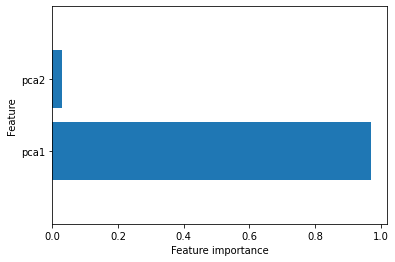

In [110]:
#feature importance
def plot_feature_importances(model):
    n_features = Xpca.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), Xpca.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree_pca2)

#### 6.Random Forest

In [111]:
#start timer
startTime = perf_counter()

print("-------------------------------")
print("Random Forest Regression(PCA): ")
print("-------------------------------")

forest_pca = RandomForestRegressor(random_state=42,verbose=False)
forest_pca.fit(X_train2, y_train2)

y_pred_forest_train2 = forest_pca.predict(X_train2)
y_pred_forest_test2 = forest_pca.predict(X_test2)

fullsmp_forest_pca = forest_pca.score(Xpca, yPCA)
print("Full sample R-squared:", fullsmp_forest_pca)
print(" ")

#forest_pca2 = RandomForestRegressor(random_state=42,verbose=False)

# set up dictionary for grid search
param_grid_forest2 = {'max_depth':[2,3,4,5,6,8,10,15,20], 
                      'max_features':[1,2], 
                      'n_estimators':[80,100,150,200,250,300,350]}
score_used = 'r2' 

# set up cross-validation shuffles
#shuffle_split_forest2 = ShuffleSplit(test_size=0.20, n_splits=25)

#Using cross validation
#cv_forest_pca = cross_val_score(forest_pca, Xpca, yPCA, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
#cv_forest_pca = cross_val_score(forest_pca, X_test2, y_test2, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
#print("Test Score(Cross Validation):", cv_forest_pca)

# 5 Kold cross-validation & set up search
grid_search_forest2 = GridSearchCV(forest_pca, param_grid_forest2, cv=5, scoring=score_used, return_train_score=True, n_jobs=1)
#grid_search_forest2 = GridSearchCV(forest_pca, param_grid_forest2, cv=cv_forest_pca, scoring=score_used, return_train_score=True, n_jobs=1)

# implement search
grid_search_forest2.fit(Xpca, yPCA)

# move results into DataFrame
table_forest_pca = pd.DataFrame(grid_search_forest2.cv_results_)
display(table_forest_pca)

#end timer
endTime = perf_counter()
time13 = endTime-startTime
print("Total time:", time13)

-------------------------------
Random Forest Regression(PCA): 
-------------------------------
Full sample R-squared: 0.9151316577447635
 


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.099146      0.007770         0.008964        0.000893   
1         0.127464      0.017283         0.010967        0.003025   
2         0.166164      0.017637         0.013356        0.002568   
3         0.221998      0.035750         0.018744        0.003299   
4         0.336507      0.018241         0.021143        0.002126   
..             ...           ...              ...             ...   
121       0.311923      0.037340         0.016747        0.001711   
122       0.405697      0.045170         0.021343        0.003374   
123       0.504055      0.077917         0.028722        0.006353   
124       0.539764      0.085470         0.034301        0.007256   
125       0.672003      0.034230         0.035113        0.005533   

    param_max_depth param_max_features param_n_estimators  \
0                 2                  1                 80   
1                 2                  1                100   
2                 2                  1                150   
3                 2                  1                200   
4                 2                  1                250   
..              ...                ...                ...   
121              20                  2                150   
122              20                  2                200   
123              20                  2                250   
124              20                  2                300   
125              20                  2                350   

                                                        params  \
0      {'max_depth': 2, 'max_features': 1, 'n_estimators': 80}   
1     {'max_depth': 2, 'max_features': 1, 'n_estimators': 100}   
2     {'max_depth': 2, 'max_features': 1, 'n_estimators': 150}   
3     {'max_depth': 2, 'max_features': 1, 'n_estimators': 200}   
4     {'max_depth': 2, 'max_features': 1, 'n_estimators': 250}   
..                                                         ...   
121  {'max_depth': 20, 'max_features': 2, 'n_estimators': 150}   
122  {'max_depth': 20, 'max_features': 2, 'n_estimators': 200}   
123  {'max_depth': 20, 'max_features': 2, 'n_estimators': 250}   
124  {'max_depth': 20, 'max_features': 2, 'n_estimators': 300}   
125  {'max_depth': 20, 'max_features': 2, 'n_estimators': 350}   

     split0_test_score  split1_test_score  ...  mean_test_score  \
0             0.661448           0.548694  ...         0.626497   
1             0.661046           0.540576  ...         0.627232   
2             0.676693           0.550762  ...         0.640067   
3             0.671080           0.543166  ...         0.634966   
4             0.681827           0.549239  ...         0.642196   
..                 ...                ...  ...              ...   
121           0.767182           0.574870  ...         0.725462   
122           0.767993           0.578799  ...         0.726671   
123           0.766094           0.577674  ...         0.726215   
124           0.766205           0.578202  ...         0.726451   
125           0.766609           0.580181  ...         0.726522   

     std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0          0.042060              126            0.643958            0.677121   
1          0.045759              125            0.644093            0.675075   
2          0.047260              121            0.660529            0.687548   
3          0.048159              123            0.653224            0.681275   
4          0.049030              120            0.662210            0.687998   
..              ...              ...                 ...                 ...   
121        0.076539              100            0.965342            0.969128   
122        0.075092               92            0.965501            0.969280   
123        0.075456               98            0.965640            0.969192   
124        0.075180               94         

Total time: 249.01869869999973


In [112]:
table_forest_pca1 = table_forest_pca[['param_max_depth', 'param_max_features', 'param_n_estimators', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
table_forest_pca1.index += 1
table_forest_pca1 = table_forest_pca1.sort_values(["rank_test_score"], ascending=True)
display(table_forest_pca1)

print('---- optimal parameters ----')
print(grid_search_forest2.best_params_)

print('---- best accuracy ----')
print(grid_search_forest2.best_score_)

param_max_depth param_max_features param_n_estimators  mean_train_score  \
42               4                  2                350          0.822509   
40               4                  2                250          0.822435   
36               4                  2                 80          0.821868   
41               4                  2                300          0.822481   
39               4                  2                200          0.822438   
..             ...                ...                ...               ...   
6                2                  1                300          0.669533   
4                2                  1                200          0.668578   
7                2                  1                350          0.667936   
2                2                  1                100          0.660059   
1                2                  1                 80          0.657635   

    mean_test_score  rank_test_score  
42         0.765588                1  
40         0.765540                2  
36         0.765523                3  
41         0.765503                4  
39         0.765289                5  
..              ...              ...  
6          0.635602              122  
4          0.634966              123  
7          0.634773              124  
2          0.627232              125  
1          0.626497              126  

[126 rows x 6 columns]

---- optimal parameters ----
{'max_depth': 4, 'max_features': 2, 'n_estimators': 350}
---- best accuracy ----
0.7655875524673232


In [113]:
mse_forest_pca = mean_squared_error(y_test2, y_pred_forest_test2)
r2_forest_pca = r2_score(y_test2, y_pred_forest_test2)
print('Mean squared error (MSE): %.4f' % mse_forest_pca)
print('Coefficient of determination (R^2): %.4f' % r2_forest_pca)
print(" ")
print('Train Set：')
regressionSummary(y_train2, y_pred_forest_train2)
print(" ")
print('Test Set：')
regressionSummary(y_test2, y_pred_forest_test2)

me_forest_pca = round(np.mean(y_test2 - y_pred_forest_test2), 4)
rmse_forest_pca = round(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_forest_test2)), 4)
mae_forest_pca = round(metrics.mean_absolute_error(y_test2, y_pred_forest_test2), 4)

Mean squared error (MSE): 0.3905
Coefficient of determination (R^2): 0.6958
 
Train Set：

Regression statistics

                      Mean Error (ME) : 0.0022
       Root Mean Squared Error (RMSE) : 0.2122
            Mean Absolute Error (MAE) : 0.1628
          Mean Percentage Error (MPE) : -0.3419
Mean Absolute Percentage Error (MAPE) : 3.1944
 
Test Set：

Regression statistics

                      Mean Error (ME) : 0.0156
       Root Mean Squared Error (RMSE) : 0.6249
            Mean Absolute Error (MAE) : 0.4853
          Mean Percentage Error (MPE) : -1.1796
Mean Absolute Percentage Error (MAPE) : 9.7972


In [114]:
# choose the best parameter with cross-validation
forest_pca2 = RandomForestRegressor(max_depth = 4, max_features = 2, n_estimators = 350, random_state=42)
forest_pca2.fit(X_train2, y_train2)

cv_forest_pca2 = cross_validate(forest_pca2, Xpca, yPCA, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2', return_train_score=True)
forest_pca2_train = np.mean(cv_forest_pca2['train_score'])
forest_pca2_test = np.mean(cv_forest_pca2['test_score'])

print('Train Score',"{:.4%}".format(forest_pca2_train))
print('Test Score',"{:.4%}".format(forest_pca2_test))

Train Score 82.1405%
Test Score 77.3918%


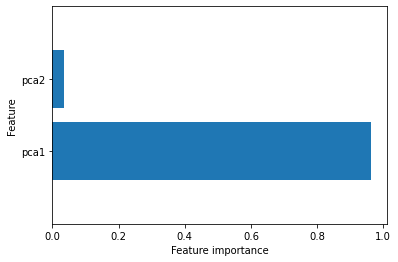

In [115]:
#feature importance
def plot_feature_importances(model):
    n_features = Xpca.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), Xpca.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(forest_pca2)

#### 7.Gradient Boosting

In [116]:
#start timer
startTime = perf_counter()

print("-------------------------------")
print("Gradient Boosting Regression(PCA): ")
print("-------------------------------")

gbc_pca = GradientBoostingRegressor(verbose=False)
gbc_pca.fit(X_train2, y_train2)

y_pred_gbc_train2 = gbc_pca.predict(X_train2)
y_pred_gbc_test2 = gbc_pca.predict(X_test2)

fullsmp_gbc_pca = gbc_pca.score(Xpca, yPCA)
print("Full sample R-squared:", fullsmp_gbc_pca)
print(" ")

#gbc_pca2 = GradientBoostingRegressor(verbose=False)

# set up dictionary for grid search
param_grid_gbc2 = {'max_depth':[2,3,4,5,6,8,10,15,20], 
                   'max_features':[1,2], 
                   'n_estimators':[80,100,150,200,250,300,350],
                   'learning_rate':[0.06, 0.08, 0.1, 0.25, 0.6]}
score_used = 'r2' 

# set up cross-validation shuffles
#shuffle_split_gbc2 = ShuffleSplit(n_splits=100, test_size=0.20)

#Using cross validation
#cv_gbc_pca = cross_val_score(gbc_pca, Xpca, yPCA, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
#cv_gbc_pca = cross_val_score(gbc_pca, X_test2, y_test2, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
#print("Test Score(Cross Validation):", cv_gbc_pca)

# 5 Kold cross-validation & set up search
grid_search_gbc2 = GridSearchCV(gbc_pca, param_grid_gbc2, cv=5, scoring=score_used, return_train_score=True, n_jobs=1)
#grid_search_gbc2 = GridSearchCV(gbc_pca, param_grid_gbc2, cv=cv_gbc_pca, scoring=score_used, return_train_score=True, n_jobs=1)

# implement search
grid_search_gbc2.fit(Xpca, yPCA)

# move results into DataFrame
table_gbc_pca = pd.DataFrame(grid_search_gbc2.cv_results_)
display(table_gbc_pca)

#end timer
endTime = perf_counter()
time14 = endTime-startTime
print("Total time:", time14)

-------------------------------
Gradient Boosting Regression(PCA): 
-------------------------------
Full sample R-squared: 0.8527301676454936
 


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.045079      0.010218         0.003590    1.016831e-03   
1         0.043683      0.003806         0.001995    4.672031e-07   
2         0.059242      0.002148         0.002394    4.884610e-04   
3         0.121275      0.040110         0.003790    1.322637e-03   
4         0.113496      0.014152         0.003193    3.981866e-04   
..             ...           ...              ...             ...   
625       0.231181      0.021616         0.008178    3.534857e-03   
626       0.246421      0.012762         0.009708    5.440516e-03   
627       0.257652      0.038251         0.005981    3.336068e-03   
628       0.295809      0.036354         0.010104    2.924835e-03   
629       0.274066      0.032310         0.005982    1.262106e-03   

    param_learning_rate param_max_depth param_max_features param_n_estimators  \
0                  0.06               2                  1                 80   
1                  0.06               2                  1                100   
2                  0.06               2                  1                150   
3                  0.06               2                  1                200   
4                  0.06               2                  1                250   
..                  ...             ...                ...                ...   
625                 0.6              20                  2                150   
626                 0.6              20                  2                200   
627                 0.6              20                  2                250   
628                 0.6              20                  2                300   
629                 0.6              20                  2                350   

                                                                              params  \
0     {'learning_rate': 0.06, 'max_depth': 2, 'max_features': 1, 'n_estimators': 80}   
1    {'learning_rate': 0.06, 'max_depth': 2, 'max_features': 1, 'n_estimators': 100}   
2    {'learning_rate': 0.06, 'max_depth': 2, 'max_features': 1, 'n_estimators': 150}   
3    {'learning_rate': 0.06, 'max_depth': 2, 'max_features': 1, 'n_estimators': 200}   
4    {'learning_rate': 0.06, 'max_depth': 2, 'max_features': 1, 'n_estimators': 250}   
..                                                                               ...   
625  {'learning_rate': 0.6, 'max_depth': 20, 'max_features': 2, 'n_estimators': 150}   
626  {'learning_rate': 0.6, 'max_depth': 20, 'max_features': 2, 'n_estimators': 200}   
627  {'learning_rate': 0.6, 'max_depth': 20, 'max_features': 2, 'n_estimators': 250}   
628  {'learning_rate': 0.6, 'max_depth': 20, 'max_features': 2, 'n_estimators': 300}   
629  {'learning_rate': 0.6, 'max_depth': 20, 'max_features': 2, 'n_estimators': 350}   

     split0_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0             0.785504  ...         0.752111        0.053925               49   
1             0.787691  ...         0.754650        0.058034               34   
2             0.788893  ...         0.759924        0.062894                7   
3             0.783158  ...         0.754368        0.063119               38   
4             0.781874  ...         0.759347        0.063194               11   
..                 ...  ...              ...             ...              ...   
625           0.599501  ...         0.545929        0.087644              597   
626           0.606534  ...         0.540888        0.087690              604   
627           0.599053  ...         0.532723        0.094879              630   
628           0.606834  ...         0.546828        0.094933              596   
629           0.606000  ...         0.535971        0.089215              629   

     split0_train_score  split1_train_score  split2_train_score  \
0              0.808423            0.830654            0.801911   
1              0.817466            0.84

Total time: 1179.2979464


In [117]:
table_gbc_pca1 = table_gbc_pca[['param_max_depth', 'param_max_features', 'param_n_estimators', 'param_learning_rate', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
table_gbc_pca1.index += 1
table_gbc_pca1 = table_gbc_pca1.sort_values(["rank_test_score"], ascending=True)
display(table_gbc_pca1)

print('---- optimal parameters ----')
print(grid_search_gbc2.best_params_)

print('---- best accuracy ----')
print(grid_search_gbc2.best_score_)

param_max_depth param_max_features param_n_estimators param_learning_rate  \
16                3                  1                100                0.06   
22                3                  2                 80                0.06   
23                3                  2                100                0.06   
267               3                  1                 80                 0.1   
135               2                  2                100                0.08   
..              ...                ...                ...                 ...   
250              20                  2                250                0.08   
378              20                  2                350                 0.1   
624              20                  2                 80                 0.6   
630              20                  2                350                 0.6   
628              20                  2                250                 0.6   

     mean_train_score  mean_test_score  rank_test_score  
16           0.847275         0.761494                1  
22           0.844164         0.760864                2  
23           0.851921         0.760442                3  
267          0.855333         0.760275                4  
135          0.824805         0.760065                5  
..                ...              ...              ...  
250          1.000000         0.537214              626  
378          1.000000         0.537003              627  
624          1.000000         0.536524              628  
630          1.000000         0.535971              629  
628          1.000000         0.532723              630  

[630 rows x 7 columns]

---- optimal parameters ----
{'learning_rate': 0.06, 'max_depth': 3, 'max_features': 1, 'n_estimators': 100}
---- best accuracy ----
0.7614939394812693


In [118]:
mse_gbc_pca = mean_squared_error(y_test2, y_pred_gbc_test2)
r2_gbc_pca = r2_score(y_test2, y_pred_gbc_test2)
print('Mean squared error (MSE): %.4f' % mse_gbc_pca)
print('Coefficient of determination (R^2): %.4f' % r2_gbc_pca)
print(" ")

print('Train Set：')
regressionSummary(y_train2, y_pred_gbc_train2)
print(" ")
print('Test Set：')
regressionSummary(y_test2, y_pred_gbc_test2)

me_gbc_pca = round(np.mean(y_test2 - y_pred_gbc_test2), 4)
rmse_gbc_pca = round(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_gbc_test2)), 4)
mae_gbc_pca = round(metrics.mean_absolute_error(y_test2, y_pred_gbc_test2), 4)

Mean squared error (MSE): 0.3347
Coefficient of determination (R^2): 0.7393
 
Train Set：

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.4053
            Mean Absolute Error (MAE) : 0.3124
          Mean Percentage Error (MPE) : -0.7932
Mean Absolute Percentage Error (MAPE) : 6.1043
 
Test Set：

Regression statistics

                      Mean Error (ME) : 0.0085
       Root Mean Squared Error (RMSE) : 0.5785
            Mean Absolute Error (MAE) : 0.4611
          Mean Percentage Error (MPE) : -1.2187
Mean Absolute Percentage Error (MAPE) : 9.3783


In [119]:
# choose the best parameter with cross-validation
gbc_pca2 = GradientBoostingRegressor(max_depth = 3, max_features = 1, n_estimators = 100, learning_rate = 0.06, random_state=42)
gbc_pca2.fit(X_train2, y_train2)

cv_gbc_pca2 = cross_validate(gbc_pca2, Xpca, yPCA, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2', return_train_score=True)
gbc_pca2_train = np.mean(cv_gbc_pca2['train_score'])
gbc_pca2_test = np.mean(cv_gbc_pca2['test_score'])

print('Train Score',"{:.4%}".format(gbc_pca2_train))
print('Test Score',"{:.4%}".format(gbc_pca2_test))

Train Score 84.6806%
Test Score 77.0484%


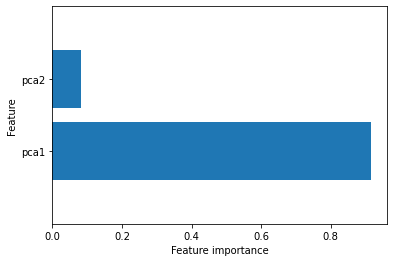

In [120]:
#feature importance
def plot_feature_importances(model):
    n_features = Xpca.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), Xpca.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(gbc_pca2)

In [121]:
dataframe = {'Full sample R-squared': [fullsmp_lr, fullsmp_ridge, fullsmp_lasso, fullsmp_knn, fullsmp_tree, fullsmp_forest, fullsmp_gbc,
                                       fullsmp_lr_pca, fullsmp_ridge_pca, fullsmp_lasso_pca, fullsmp_knn_pca, fullsmp_tree_pca, fullsmp_forest_pca, fullsmp_gbc_pca],
             'Train Score': [lr_trainScore1, table_ridge.iloc[0,1], table_lasso.iloc[0,1], table_knn.iloc[0,0], table_tree1.iloc[0,2], table_forest1.iloc[0,3], table_gbc1.iloc[0,4],
                            lr_trainScore2, table_ridge_pca.iloc[0,1], table_lasso_pca.iloc[0,1], table_knn_pca.iloc[0,0], table_tree_pca1.iloc[0,2], table_forest_pca1.iloc[0,3], table_gbc_pca1.iloc[0,4]],
             
            'Test Score': [lr_testScore1, table_ridge.iloc[0,2], table_lasso.iloc[0,2], table_knn.iloc[0,1], table_tree1.iloc[0,3], table_forest1.iloc[0,4], table_gbc1.iloc[0,5],
                           lr_testScore2, table_ridge_pca.iloc[0,2], table_lasso_pca.iloc[0,2], table_knn_pca.iloc[0,1], table_tree_pca1.iloc[0,3], table_forest_pca1.iloc[0,4], table_gbc_pca1.iloc[0,5]],
             
             'Test Score(CV)': [cv_lr, table_ridge.iloc[0,3], table_lasso.iloc[0,3], table_knn.iloc[0,2], 'N/A', 'N/A', 'N/A',
                                cv_lr_pca, table_ridge_pca.iloc[0,3], table_lasso_pca.iloc[0,3], table_knn_pca.iloc[0,2], 'N/A', 'N/A', 'N/A'],
             'Coefficient of determination(R^2)': [r2_lr, r2_ridge, r2_lasso, r2_knn, r2_tree, r2_forest, r2_gbc,
                                                   r2_lr_pca, r2_ridge_pca, r2_lasso_pca, r2_knn_pca, r2_tree_pca, r2_forest_pca, r2_gbc_pca],
             'Test MSE': [mse_lr, mse_ridge, mse_lasso, mse_knn, mse_tree, mse_forest, mse_gbc,
                          mse_lr_pca, mse_ridge_pca, mse_lasso_pca, mse_knn_pca, mse_tree_pca, mse_forest_pca, mse_gbc_pca],
             'Test ME': [me_lr, me_ridge, me_lasso, me_knn, me_tree, me_forest, me_gbc,
                         me_lr_pca, me_ridge_pca, me_lasso_pca, me_knn_pca, me_tree_pca, me_forest_pca, me_gbc_pca],
             'Test RMSE': [rmse_lr, rmse_ridge, rmse_lasso, rmse_knn, rmse_tree, rmse_forest, rmse_gbc,
                           rmse_lr_pca, rmse_ridge_pca, rmse_lasso_pca, rmse_knn_pca, rmse_tree_pca, rmse_forest_pca, rmse_gbc_pca],
             'Test MAE': [mae_lr, mae_ridge, mae_lasso, mae_knn, mae_tree, mae_forest, mae_gbc,
                          mae_lr_pca, mae_ridge_pca, mae_lasso_pca, mae_knn_pca, mae_tree_pca, mae_forest_pca, mae_gbc_pca],
             'Time': [time1, time2, time3, time4, time5, time6, time7, time8, time9, time10, time11, time12, time13, time14]}

table = pd.DataFrame(dataframe, index = ["Linear Regression", "Ridge Regression", "Lasso Regression", 
                                         "KNeighbors Regression", "Decision Tree Regression",
                                         "Random Forest Regression", "Gradient Boosting Regression",
                                         "Linear Regression(PCA)", "Ridge Regression(PCA)", "Lasso Regression(PCA)", 
                                         "KNeighbors Regression(PCA)", "Decision Tree Regression(PCA)",
                                         "Random Forest Regression(PCA)", "Gradient Boosting Regression(PCA)"])
table = table.rename_axis(['Models'])
table = table.reset_index()
table.index += 1
display(table)
#table.sort_values("Test Score")

Models  Full sample R-squared  Train Score  \
1                   Linear Regression               0.772234     0.778829   
2                    Ridge Regression               0.763160     0.777730   
3                    Lasso Regression               0.763871     0.770641   
4               KNeighbors Regression               0.755246     0.793708   
5            Decision Tree Regression               0.913275     0.785791   
6            Random Forest Regression               0.939870     0.974508   
7        Gradient Boosting Regression               0.894372     1.000000   
8              Linear Regression(PCA)               0.763828     0.772153   
9               Ridge Regression(PCA)               0.763447     0.772061   
10              Lasso Regression(PCA)               0.763333     0.772068   
11         KNeighbors Regression(PCA)               0.744297     0.752715   
12      Decision Tree Regression(PCA)               0.904865     0.807445   
13      Random Forest Regression(PCA)               0.915132     0.822509   
14  Gradient Boosting Regression(PCA)               0.852730     0.847275   

    Test Score Test Score(CV)  Coefficient of determination(R^2)  Test MSE  \
1     0.744303       0.760822                           0.744303  0.328205   
2     0.747247       0.813876                           0.743494  0.329243   
3     0.742471       0.818233                           0.741482  0.331825   
4     0.775150       0.809801                           0.744619  0.327799   
5     0.695100            N/A                           0.546522  0.582070   
6     0.799087            N/A                           0.791463  0.267671   
7     0.799647            N/A                           0.771642  0.293113   
8     0.728584       0.758624                           0.728584  0.348381   
9     0.727862       0.824723                           0.727451  0.349835   
10    0.727073       0.830376                           0.726593  0.350937   
11    0.714322       0.810403                           0.713242  0.368073   
12    0.745720            N/A                           0.502546  0.638516   
13    0.765588            N/A                           0.695798  0.390465   
14    0.761494            N/A                           0.739267  0.334669   

    Test ME  Test RMSE  Test MAE         Time  
1   -0.0173     0.5729    0.4395     0.958174  
2   -0.0162     0.5738    0.4532    82.712537  
3   -0.0218     0.5760    0.4458    78.069637  
4   -0.0539     0.5725    0.4578   136.088674  
5    0.0128     0.7629    0.5819     1.476493  
6    0.0320     0.5174    0.4118   601.353940  
7    0.0394     0.5414    0.4274  2046.696755  
8   -0.0036     0.5902    0.4574     1.727205  
9   -0.0038     0.5915    0.4608    68.727916  
10  -0.0039     0.5924    0.4607    69.453456  
11  -0.0011     0.6067    0.4885    75.162484  
12   0.0031     0.7991    0.6047     0.691040  
13   0.0156     0.6249    0.4853   249.018699  
14   0.0085     0.5785    0.4611  1179.297946

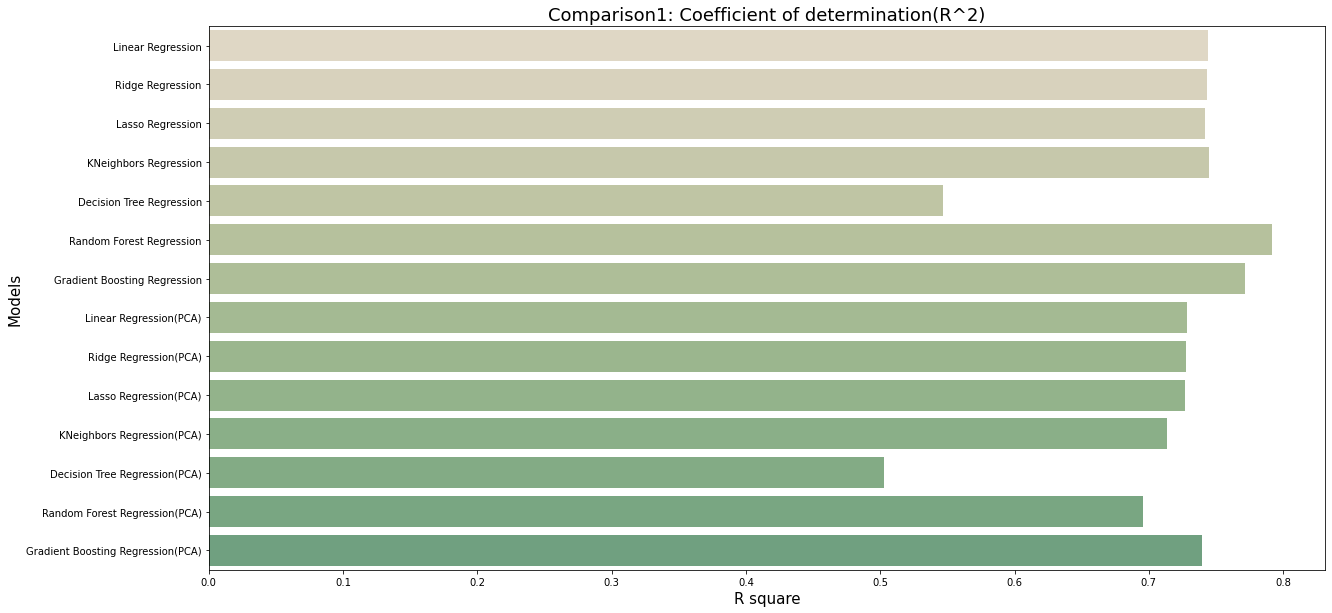

In [122]:
#make a plot
figure = plt.figure(figsize=(20,10))
sns.barplot(x = 'Coefficient of determination(R^2)', y= 'Models', data=table, palette = sns.cubehelix_palette(len('Coefficient of determination(R^2)'), start=.5, rot=-.85))
plt.xlabel("R square", fontsize = 15)
plt.ylabel("Models", fontsize = 15)
plt.title("Comparison1: Coefficient of determination(R^2)", fontsize = 18)
plt.show()

In [123]:
dataframe2 = {'Train Set Mean Score': [lr2_train, ridge2_train, lasso2_train, knn2_train, tree2_train, forest2_train, gbc2_train,
                                      lr_pca2_train, ridge_pca2_train, lasso_pca2_train, knn_pca2_train, tree_pca2_train, forest_pca2_train, gbc_pca2_train],
              
             'Test Set Mean Score': [lr2_test, ridge2_test, lasso2_test, knn2_test, tree2_test, forest2_test, gbc2_test, 
                                     lr_pca2_test, ridge_pca2_test, lasso_pca2_test, knn_pca2_test, tree_pca2_test, forest_pca2_test, gbc_pca2_test] 
            }

table2 = pd.DataFrame(dataframe2, index = ["Linear Regression", "Ridge Regression", "Lasso Regression", 
                                         "KNeighbors Regression", "Decision Tree Regression",
                                         "Random Forest Regression", "Gradient Boosting Regression",
                                         "Linear Regression(PCA)", "Ridge Regression(PCA)", "Lasso Regression(PCA)", 
                                         "KNeighbors Regression(PCA)", "Decision Tree Regression(PCA)",
                                         "Random Forest Regression(PCA)", "Gradient Boosting Regression(PCA)"])
table2 = table2.rename_axis(['Models'])
table2 = table2.reset_index()
table2.index += 1
#table = table.sort_values('Test Set Mean Score', ascending=False)
display(table2)

Models  Train Set Mean Score  \
1                   Linear Regression              0.774361   
2                    Ridge Regression              0.772967   
3                    Lasso Regression              0.765616   
4               KNeighbors Regression              0.792480   
5            Decision Tree Regression              0.784143   
6            Random Forest Regression              0.974697   
7        Gradient Boosting Regression              1.000000   
8              Linear Regression(PCA)              0.764186   
9               Ridge Regression(PCA)              0.764661   
10              Lasso Regression(PCA)              0.763750   
11         KNeighbors Regression(PCA)              0.747600   
12      Decision Tree Regression(PCA)              0.805996   
13      Random Forest Regression(PCA)              0.821405   
14  Gradient Boosting Regression(PCA)              0.846806   

    Test Set Mean Score  
1              0.760054  
2              0.762101  
3              0.755461  
4              0.777354  
5              0.699342  
6              0.812880  
7              0.810562  
8              0.759289  
9              0.756776  
10             0.760931  
11             0.736903  
12             0.753810  
13             0.773918  
14             0.770484

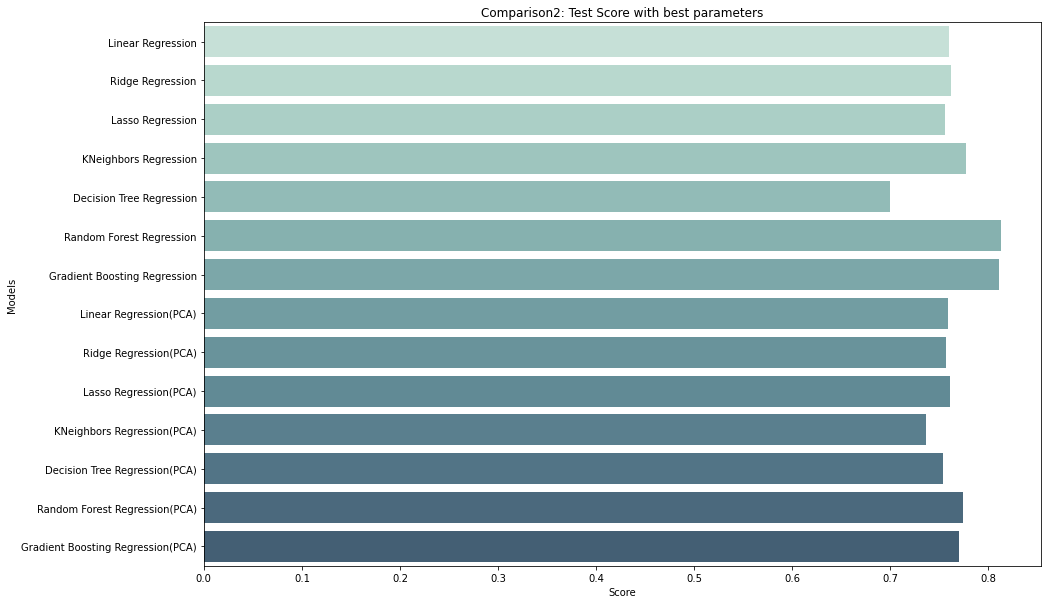

In [124]:
# Visualisation of predictions in CV with 3 fold
plt.subplots(figsize=(15, 10))
sns.barplot(x='Test Set Mean Score', y='Models', data=table2, palette = sns.cubehelix_palette(len('Test Set Mean Score'), rot=-.30))
plt.xlabel("Score")
plt.ylabel("Models")
plt.title('Comparison2: Test Score with best parameters')
plt.show()

###  Unseen Data

In [125]:
df_2020 = pd.read_csv("..\\downloads\\world-happiness-report-2020.csv")
display(df_2020)

Country name  Regional indicator  Ladder score  \
0                     Finland      Western Europe        7.8087   
1                     Denmark      Western Europe        7.6456   
2                 Switzerland      Western Europe        7.5599   
3                     Iceland      Western Europe        7.5045   
4                      Norway      Western Europe        7.4880   
..                        ...                 ...           ...   
148  Central African Republic  Sub-Saharan Africa        3.4759   
149                    Rwanda  Sub-Saharan Africa        3.3123   
150                  Zimbabwe  Sub-Saharan Africa        3.2992   
151               South Sudan  Sub-Saharan Africa        2.8166   
152               Afghanistan          South Asia        2.5669   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                          0.031156      7.869766      7.747634   
1                          0.033492      7.711245      7.579955   
2                          0.035014      7.628528      7.491272   
3                          0.059616      7.621347      7.387653   
4                          0.034837      7.556281      7.419719   
..                              ...           ...           ...   
148                        0.115183      3.701658      3.250141   
149                        0.052425      3.415053      3.209547   
150                        0.058674      3.414202      3.184198   
151                        0.107610      3.027516      2.605684   
152                        0.031311      2.628270      2.505530   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                10.639267        0.954330                71.900825   
1                10.774001        0.955991                72.402504   
2                10.979933        0.942847                74.102448   
3                10.772559        0.974670                73.000000   
4                11.087804        0.952487                73.200783   
..                     ...             ...                      ...   
148               6.625160        0.319460                45.200001   
149               7.600104        0.540835                61.098846   
150               7.865712        0.763093                55.617260   
151               7.425360        0.553707                51.000000   
152               7.462861        0.470367                52.590000   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
0                        0.949172   -0.059482                   0.195445   
1                        0.951444    0.066202                   0.168489   
2                        0.921337    0.105911                   0.303728   
3                        0.948892    0.246944                   0.711710   
4                        0.955750    0.134533                   0.263218   
..                            ...         ...                        ...   
148                      0.640881    0.082410                   0.891807   
149                      0.900589    0.055484                   0.183541   
150                      0.711458   -0.072064                   0.810237   
151                      0.451314    0.016519                   0.763417   
152                      0.396573   -0.096429                   0.933687   

     Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                    1.972317                          1.285190   
1                    1.972317                          1.326949   
2                    1.972317                          1.390774   
3                    1.972317                          1.326502   
4                    1.972317                          1.424207   
..                        ...                               ...   
148                  1.972317                          0.041072   
149                  1.972317                          0.343243   
150                  1.972317         

In [126]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

In [127]:
df_2020.rename(columns={'Overall rank':'Happiness Rank', 
                        'Country name':'Country', 
                        'Regional indicator': 'Region',
                        'Ladder score':'Happiness Score', 
                      'Logged GDP per capita': 'Economy (GDP per Capita)', 
                        'Social support':'Family',
                      'Healthy life expectancy':'Health (Life Expectancy)', 
                      'Freedom to make life choices':'Freedom',
                      'Perceptions of corruption':'Trust (Government Corruption)',
                       'upperwhisker': 'Whisker.high', 
                        'lowerwhisker': 'Whisker.low'}, inplace=True)

In [128]:
df_2020.isna().sum()

Country                                       0
Region                                        0
Happiness Score                               0
Standard error of ladder score                0
Whisker.high                                  0
Whisker.low                                   0
Economy (GDP per Capita)                      0
Family                                        0
Health (Life Expectancy)                      0
Freedom                                       0
Generosity                                    0
Trust (Government Corruption)                 0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [129]:
#column_means = df2020. mean()
#df2020 = df2020. fillna(column_means)

In [130]:
df_2020_a = df_2020.copy()

X_2020 = df_2020_a[['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom',
                    'Trust (Government Corruption)','Generosity']]
y_2020 = df_2020_a['Happiness Score']

X_train3, X_test3, y_train3, y_test3= train_test_split(X_2020, y_2020, test_size=0.2, random_state=42)
print(f"X train shape {X_train3.shape}")
print(f"X test shape {X_test3.shape}")
print(f"y train shape {y_train3.shape}")
print(f"y test shape {y_test3.shape}")

X train shape (122, 6)
X test shape (31, 6)
y train shape (122,)
y test shape (31,)


### Test Unseen Data Using Best Model（Gradient Boosting Regression)

In [132]:
#start timer
startTime = perf_counter()

print("-------------------------------")
print("Gradient Boosting Regression(Best Model): ")
print("-------------------------------")

gbc_pca3 = GradientBoostingRegressor(verbose=False)
gbc_pca3.fit(X_train3, y_train3)

y_pred_gbc_train3 = gbc_pca3.predict(X_train3)
y_pred_gbc_test3 = gbc_pca3.predict(X_test3)

fullsmp_gbc_pca3 = gbc_pca3.score(X_2020, y_2020)
print("Full sample R-squared:", fullsmp_gbc_pca3)
print(" ")

#gbc_pca2 = GradientBoostingRegressor(verbose=False)

# set up dictionary for grid search
param_grid_gbc3 = {'max_depth':[2,3,4,5,6,8,10,15,20], 
                   'max_features':[2,4,6], 
                   'n_estimators':[80,100,150,200,250,300,350],
                   'learning_rate':[0.02, 0.05, 0.06, 0.08, 0.1, 0.25]}
score_used = 'r2' 

# set up cross-validation shuffles
#shuffle_split_gbc3 = ShuffleSplit(n_splits=100, test_size=0.20)

#Using cross validation
#cv_gbc_pca3 = cross_val_score(gbc_pca3, X_2020, y_2020, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
#cv_gbc_pca3 = cross_val_score(gbc_pca3, X_test3, y_test3, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
#print("Test Score(Cross Validation):", cv_gbc_pca3)

# 5 Kold cross-validation & set up search
grid_search_gbc3 = GridSearchCV(gbc_pca3, param_grid_gbc3, cv=5, scoring=score_used, return_train_score=True, n_jobs=1)
#grid_search_gbc3 = GridSearchCV(gbc_pca3, param_grid_gbc3, cv=cv_gbc_pca3, scoring=score_used, return_train_score=True, n_jobs=1)

# implement search
grid_search_gbc3.fit(X_train3, y_train3)

# move results into DataFrame
table_gbc_pca3 = pd.DataFrame(grid_search_gbc3.cv_results_)
display(table_gbc_pca3)

#end timer
endTime = perf_counter()
time15 = endTime-startTime
print("Total time:", time15)

-------------------------------
Gradient Boosting Regression(Best Model): 
-------------------------------
Full sample R-squared: 0.9448932247076027
 


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          0.024720      0.002635         0.002800        0.000400   
1          0.029316      0.002868         0.002200        0.000411   
2          0.040898      0.006442         0.002192        0.000746   
3          0.067028      0.015507         0.002587        0.000788   
4          0.069601      0.006991         0.002601        0.000491   
...             ...           ...              ...             ...   
1129       0.179720      0.015699         0.005187        0.001164   
1130       0.142219      0.015774         0.002593        0.000798   
1131       0.155391      0.002402         0.003392        0.000490   
1132       0.371606      0.018931         0.006582        0.001739   
1133       0.422464      0.019736         0.006988        0.001253   

     param_learning_rate param_max_depth param_max_features  \
0                   0.02               2                  2   
1                   0.02               2                  2   
2                   0.02               2                  2   
3                   0.02               2                  2   
4                   0.02               2                  2   
...                  ...             ...                ...   
1129                0.25              20                  6   
1130                0.25              20                  6   
1131                0.25              20                  6   
1132                0.25              20                  6   
1133                0.25              20                  6   

     param_n_estimators  \
0                    80   
1                   100   
2                   150   
3                   200   
4                   250   
...                 ...   
1129                150   
1130                200   
1131                250   
1132                300   
1133                350   

                                                                                params  \
0       {'learning_rate': 0.02, 'max_depth': 2, 'max_features': 2, 'n_estimators': 80}   
1      {'learning_rate': 0.02, 'max_depth': 2, 'max_features': 2, 'n_estimators': 100}   
2      {'learning_rate': 0.02, 'max_depth': 2, 'max_features': 2, 'n_estimators': 150}   
3      {'learning_rate': 0.02, 'max_depth': 2, 'max_features': 2, 'n_estimators': 200}   
4      {'learning_rate': 0.02, 'max_depth': 2, 'max_features': 2, 'n_estimators': 250}   
...                                                                                ...   
1129  {'learning_rate': 0.25, 'max_depth': 20, 'max_features': 6, 'n_estimators': 150}   
1130  {'learning_rate': 0.25, 'max_depth': 20, 'max_features': 6, 'n_estimators': 200}   
1131  {'learning_rate': 0.25, 'max_depth': 20, 'max_features': 6, 'n_estimators': 250}   
1132  {'learning_rate': 0.25, 'max_depth': 20, 'max_features': 6, 'n_estimators': 300}   
1133  {'learning_rate': 0.25, 'max_depth': 20, 'max_features': 6, 'n_estimators': 350}   

      split0_test_score  ...  mean_test_score  std_test_score  \
0              0.838082  ...         0.715093        0.079273   
1              0.866275  ...         0.743511        0.083129   
2              0.877735  ...         0.768704        0.071105   
3              0.874446  ...         0.774755        0.067117   
4              0.880941  ...         0.780006        0.069701   
...                 ...  ...              ...             ...   
1129           0.761772  ...         0.629133        0.101735   
1130           0.742609  ...         0.603424        0.113298   
1131           0.732284  ...         0.601718        0.106738   
1132           0.709656  ...         0.599787        0.103012   
1133           0.811587  ...         0.640160        0.126344   

      rank_test_score  split0_train_score  split1_train_score  \
0                 864            0.776690            0.816219   
1                 525            0.820548            0.857685   
2                 163     

Total time: 1233.9601916000001


In [133]:
table_gbc_pca3b = table_gbc_pca3[['param_max_depth', 'param_max_features', 'param_n_estimators', 'param_learning_rate', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
table_gbc_pca3b.index += 1
table_gbc_pca3b = table_gbc_pca3b.sort_values(["rank_test_score"], ascending=True)
display(table_gbc_pca3b)

print('---- optimal parameters ----')
print(grid_search_gbc3.best_params_)

print('---- best accuracy ----')
print(grid_search_gbc3.best_score_)

param_max_depth param_max_features param_n_estimators  \
569                2                  2                100   
611                4                  2                100   
843                6                  2                150   
401                3                  2                100   
26                 3                  2                250   
...              ...                ...                ...   
1111              15                  6                250   
1109              15                  6                150   
1131              20                  6                200   
1132              20                  6                250   
1133              20                  6                300   

     param_learning_rate  mean_train_score  mean_test_score  rank_test_score  
569                 0.08          0.949124         0.789944                1  
611                 0.08          0.997962         0.786015                2  
843                  0.1          1.000000         0.785934                3  
401                 0.06          0.976248         0.785725                4  
26                  0.02          0.970176         0.784569                5  
...                  ...               ...              ...              ...  
1111                0.25          1.000000         0.606247             1130  
1109                0.25          1.000000         0.604130             1131  
1131                0.25          1.000000         0.603424             1132  
1132                0.25          1.000000         0.601718             1133  
1133                0.25          1.000000         0.599787             1134  

[1134 rows x 7 columns]

---- optimal parameters ----
{'learning_rate': 0.08, 'max_depth': 2, 'max_features': 2, 'n_estimators': 100}
---- best accuracy ----
0.7899444918536005


In [134]:
mse_gbc_pca3 = mean_squared_error(y_test3, y_pred_gbc_test3)
r2_gbc_pca3 = r2_score(y_test3, y_pred_gbc_test3)
print('Mean squared error (MSE): %.4f' % mse_gbc_pca3)
print('Coefficient of determination (R^2): %.4f' % r2_gbc_pca3)
print(" ")

print('Train Set：')
regressionSummary(y_train3, y_pred_gbc_train3)
print(" ")
print('Test Set：')
regressionSummary(y_test3, y_pred_gbc_test3)

me_gbc_pca3 = round(np.mean(y_test3 - y_pred_gbc_test3), 4)
rmse_gbc_pca3 = round(np.sqrt(metrics.mean_squared_error(y_test3, y_pred_gbc_test3)), 4)
mae_gbc_pca3 = round(metrics.mean_absolute_error(y_test3, y_pred_gbc_test3), 4)

Mean squared error (MSE): 0.2764
Coefficient of determination (R^2): 0.6557
 
Train Set：

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.1212
            Mean Absolute Error (MAE) : 0.0927
          Mean Percentage Error (MPE) : -0.2122
Mean Absolute Percentage Error (MAPE) : 1.7953
 
Test Set：

Regression statistics

                      Mean Error (ME) : 0.1697
       Root Mean Squared Error (RMSE) : 0.5258
            Mean Absolute Error (MAE) : 0.4380
          Mean Percentage Error (MPE) : 2.8598
Mean Absolute Percentage Error (MAPE) : 7.8820


In [135]:
# choose the best parameter with cross-validation
gbc_pca3best = GradientBoostingRegressor(max_depth = 2, max_features = 2, n_estimators = 100, learning_rate = 0.08, random_state=42)
gbc_pca3best.fit(X_2020, y_2020)

cv_gbc_pca3best = cross_validate(gbc_pca3best, X_2020, y_2020, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2', return_train_score=True)
gbc_pca3best_train = np.mean(cv_gbc_pca3best['train_score'])
gbc_pca3best_test = np.mean(cv_gbc_pca3best['test_score'])

print('Train Score',"{:.4%}".format(gbc_pca3best_train))
print('Test Score',"{:.4%}".format(gbc_pca3best_test))

Train Score 93.0341%
Test Score 74.4058%


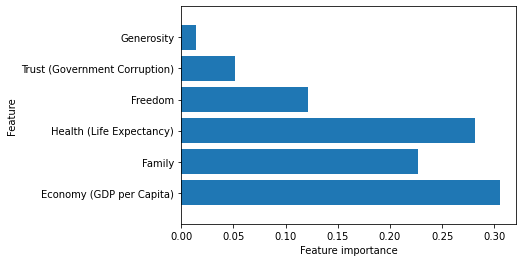

In [136]:
#feature importance
def plot_feature_importances(model):
    n_features = X_2020.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_2020.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(gbc_pca3best)

https://www.kaggle.com/leonardokobiraki/world-happiness-report-analysis

https://www.kaggle.com/abdullahcakmak/happiness-data-analysis-by-countries

https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021

https://www.kaggle.com/barisscal/eda-visualization-with-plotly-for-beginners